
---



---


**Trabalho de conclusão do curso Big Data e IA**

**Título:** Otimização de Modelos com técnicas de reamostragem na detecção de Fraudes em Transações Financeiras

**Autor:** Renata Cerqueira da Costa

**Orientadora:** Patrícia Rufino


---



---

**Descrição & Link do Dataset:**

Nosso conjunto de dados possui um total de mais de 280 mil transações efetuadas em dois dias no mês setembro de 2023 por portadores de cartões de crédito europeus. Disponíveis no repositório do Kaggle.

**Link:** https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?select=creditcard.csv





---



---

**Objetivo:**
Criar um modelo que aprenda com os padrões intrísecos dos dados e identiifique se uma transação futura é fraudulenta ou legítima.

---



---

In [4]:
#Conectando o Colab ao Drive para acessar os arquivos necessarios
#from google.colab import drive
#drive.mount('/content/gdrive')
import pandas as pd

caminho_csv = "/content/sample_data/creditcard.csv"
credit = pd.read_csv(caminho_csv)
credit = pd.DataFrame(credit)
credit.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

---


---


**Importando as Biliotecas necessárias para o projeto**

---


---

In [5]:
# Importando as bibliotecas que serão utilizadas:

# Ignorar avisos
import warnings
warnings.filterwarnings("ignore")

# manipulação e visualização

import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import missingno as ms # para tratamento de missings
from matplotlib import cm


# tratamento nos dados
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import StandardScaler # para padronização

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# métricas de avaliação
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix, auc, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

---


---

**Amostra com todas as variáveis do dataframe - apenas primeiros registros:**

---


---

In [ ]:
credit.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [ ]:
type(credit)

pandas.core.frame.DataFrame

---


---

**Listando os tipos de variáveis do dataframe:**

---


---

In [ ]:
#O conjunto de dados tem 30 variáveis "float", 1 variável "Class" que é "integer" e que será nosso target.
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

---


---

**Observando o tamanho do dataframe:**

---


---

In [ ]:
#No registro tem 31 colunas e 284.807 registros
credit.shape

(284807, 31)

---


---

**Algumas informações importantes sobre as variáveis:**

---


---

*   Tempo  : tempo decorrido em segundos a contar da primeira transação efetuada
*   V1-V28 : variáveis numéricas - float - que estão anonimizadas por uma transformação PCA.
*   Amount : valor da transação.
*   Class :  variável target que indica se a transação é fraudulenta ou não, sendo 0 para transações legítimas e 1 para transações com fraude.

*   o dataset não possui registros nulos e seu tamanho é de 284.807 registros e 31 colunas.



**Nota: a técnica de PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações.**

---


---

---

---
**Verificando a presença de registros nulos no dataframe:**

---

---

In [ ]:
#Não há registros nulos
credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

---

**Descrevendo as variáveis:**

---

In [ ]:
credit.describe().round(2)

Time         V1         V2         V3         V4         V5  \
count  284807.00  284807.00  284807.00  284807.00  284807.00  284807.00   
mean    94813.86       0.00       0.00      -0.00       0.00       0.00   
std     47488.15       1.96       1.65       1.52       1.42       1.38   
min         0.00     -56.41     -72.72     -48.33      -5.68    -113.74   
25%     54201.50      -0.92      -0.60      -0.89      -0.85      -0.69   
50%     84692.00       0.02       0.07       0.18      -0.02      -0.05   
75%    139320.50       1.32       0.80       1.03       0.74       0.61   
max    172792.00       2.45      22.06       9.38      16.88      34.80   

              V6         V7         V8         V9  ...        V21        V22  \
count  284807.00  284807.00  284807.00  284807.00  ...  284807.00  284807.00   
mean        0.00      -0.00       0.00      -0.00  ...       0.00      -0.00   
std         1.33       1.24       1.19       1.10  ...       0.73       0.73   
min       -26.16     -43.56     -73.22     -13.43  ...     -34.83     -10.93   
25%        -0.77      -0.55      -0.21      -0.64  ...      -0.23      -0.54   
50%        -0.27       0.04       0.02      -0.05  ...      -0.03       0.01   
75%         0.40       0.57       0.33       0.60  ...       0.19       0.53   
max        73.30     120.59      20.01      15.59  ...      27.20      10.50   

             V23        V24        V25        V26        V27        V28  \
count  284807.00  284807.00  284807.00  284807.00  284807.00  284807.00   
mean        0.00       0.00       0.00       0.00      -0.00      -0.00   
std         0.62       0.61       0.52       0.48       0.40       0.33   
min       -44.81      -2.84     -10.30      -2.60     -22.57     -15.43   
25%        -0.16      -0.35      -0.32      -0.33      -0.07      -0.05   
50%        -0.01       0.04       0.02      -0.05       0.00       0.01   
75%         0.15       0.44       0.35       0.24       0.09       0.08   
max        22.53       4.58       7.52       3.52      31.61      33.85   

          Amount      Class  
count  284807.00  284807.00  
mean       88.35       0.00  
std       250.12       0.04  
min         0.00       0.00  
25%         5.60       0.00  
50%        22.00       0.00  
75%        77.16       0.00  
max     25691.16       1.00  

[8 rows x 31 columns]

In [ ]:
credit.sort_values(by='Time', ascending=True)

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284805      0  
284804      0  
284806      0  

[284807 rows x 31 columns]

In [ ]:
grouped_stats = credit.groupby('Class')['Amount'].describe().round(2)
# Exibir os resultados
print(grouped_stats)

          count    mean     std  min   25%    50%     75%       max
Class                                                              
0      284315.0   88.29  250.11  0.0  5.65  22.00   77.05  25691.16
1         492.0  122.21  256.68  0.0  1.00   9.25  105.89   2125.87


---


**Verificando as Estatísticas pela CLASSE**

---

In [ ]:
# Exibir os resultados
record_counts = credit.groupby('Class').size()
print(record_counts)

Class
0    284315
1       492
dtype: int64


---


**Padronizando as variáveis Time e Amount que estão com escalas diferentes**


*Decidimos padronizar todas as outras variáveis*

---

In [6]:
# Instanciar o StandardScaler
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

variables = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
             'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
             'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
# Padronizar as variáveis as variáveis
scaler = StandardScaler()
credit_padronizados = credit.copy()
credit_padronizados[variables] = scaler.fit_transform(credit[variables])


# Verificar as primeiras linhas do DataFrame padronizado
print(credit_padronizados.head())


       Time        V1        V2        V3        V4        V5        V6  \
0 -1.996583 -0.694242 -0.044075  1.672773  0.973366 -0.245117  0.347068   
1 -1.996583  0.608496  0.161176  0.109797  0.316523  0.043483 -0.061820   
2 -1.996562 -0.693500 -0.811578  1.169468  0.268231 -0.364572  1.351454   
3 -1.996562 -0.493325 -0.112169  1.182516 -0.609727 -0.007469  0.936150   
4 -1.996541 -0.591330  0.531541  1.021412  0.284655 -0.295015  0.071999   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.193679  0.082637  0.331128  ... -0.024923  0.382854 -0.176911  0.110507   
1 -0.063700  0.071253 -0.232494  ... -0.307377 -0.880077  0.162201 -0.561131   
2  0.639776  0.207373 -1.378675  ...  0.337632  1.063358  1.456320 -1.138092   
3  0.192071  0.316018 -1.262503  ... -0.147443  0.007267 -0.304777 -1.941027   
4  0.479302 -0.226510  0.744326  ... -0.012839  1.100011 -0.220123  0.233250   

        V25       V26       V27       V28    Amount  Class  
0  0.24

In [ ]:
saida = credit_padronizados.describe().round(2)
print(saida)

            Time         V1         V2         V3         V4         V5  \
count  284807.00  284807.00  284807.00  284807.00  284807.00  284807.00   
mean       -0.00      -0.00      -0.00      -0.00      -0.00       0.00   
std         1.00       1.00       1.00       1.00       1.00       1.00   
min        -2.00     -28.80     -44.04     -31.87      -4.01     -82.41   
25%        -0.86      -0.47      -0.36      -0.59      -0.60      -0.50   
50%        -0.21       0.01       0.04       0.12      -0.01      -0.04   
75%         0.94       0.67       0.49       0.68       0.53       0.44   
max         1.64       1.25      13.36       6.19      11.92      25.21   

              V6         V7         V8         V9  ...        V21        V22  \
count  284807.00  284807.00  284807.00  284807.00  ...  284807.00  284807.00   
mean        0.00       0.00      -0.00       0.00  ...      -0.00       0.00   
std         1.00       1.00       1.00       1.00  ...       1.00       1.00   
min 

In [ ]:
saida.to_csv("credit_padronizados.csv", index=False)

---

---


**Nesta etapa vamos verificar se existem registros duplicados no conjunto de dados:**


---

---

In [ ]:
# Verificar se há registros duplicados
duplicados = credit_padronizados[credit_padronizados.duplicated()]
# Exibir registros duplicados
print(duplicados)

            Time        V1        V2        V3        V4        V5        V6  \
33     -1.996036 -0.270544  0.529212  0.888538  0.102733  0.300098  0.075227   
35     -1.996036 -0.273339  0.523990  0.891063  0.104230  0.314205  0.065289   
113    -1.995025  0.530134  0.077203  0.121652  0.783937  0.320015  0.709528   
114    -1.995025  0.530134  0.077203  0.121652  0.783937  0.320015  0.709528   
115    -1.995025  0.530134  0.077203  0.121652  0.783937  0.320015  0.709528   
...          ...       ...       ...       ...       ...       ...       ...   
282987  1.610387  0.976442 -0.275685 -1.154593  0.320881  1.513595  3.122507   
283483  1.617525 -0.747632  0.828507  0.538164 -0.424674 -0.499270 -0.365658   
283485  1.617525 -0.744363  0.834614  0.535211 -0.426424 -0.515766 -0.354037   
284191  1.630286 -1.362100  1.913943 -2.213342  0.711822 -0.273427 -0.082363   
284193  1.630286 -1.374203  1.891332 -2.202408  0.718301 -0.212350 -0.125390   

              V7        V8        V9  .

In [ ]:
# Contar registros duplicados
num_duplicados = credit_padronizados.duplicated().sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 1081


In [7]:
#Código paa remover registros duplicados mantendo a última ocorrência
credit_sem_duplicatas = credit_padronizados.drop_duplicates(keep='last')
record_counts = credit_sem_duplicatas.groupby('Class').size()
print(record_counts)

Class
0    283253
1       473
dtype: int64


---

---


**Nesta etapa vamos verificar os dados que estão fora do intervalo IQR no conjunto de dados:**


---

---

In [ ]:
#Vamos verificar nesta etapa o outliers, verificando pela medida interquartil

# Lista de variáveis para análise
variables = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
             'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
             'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

# Função para identificar outliers usando o método IQR
def identificar_outliers_por_iqr(df, col):
    outliers = [] # Use a list to store outlier DataFrames
    for c in col:
        Q1 = df[c].quantile(0.25)
        Q3 = df[c].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        # Append the DataFrame of outliers for the current column to the list
        outliers.append(df[(df[c] < limite_inferior) | (df[c] > limite_superior)])
    # Concatenate all outlier DataFrames into a single DataFrame
    return pd.concat(outliers).drop_duplicates()

# Identificar outliers
outliers_iqr = identificar_outliers_por_iqr(credit_sem_duplicatas, variables)

# Contar os outliers pela variável alvo Class
outliers_por_class = outliers_iqr['Class'].value_counts()
print(outliers_por_class)


Class
0    137315
1       458
Name: count, dtype: int64


---

---


**Vamos manter o conjunto de dados com os outliers, já que temos restrições de tamanho na nossa amostra com transações fraudulentas.**


---

---

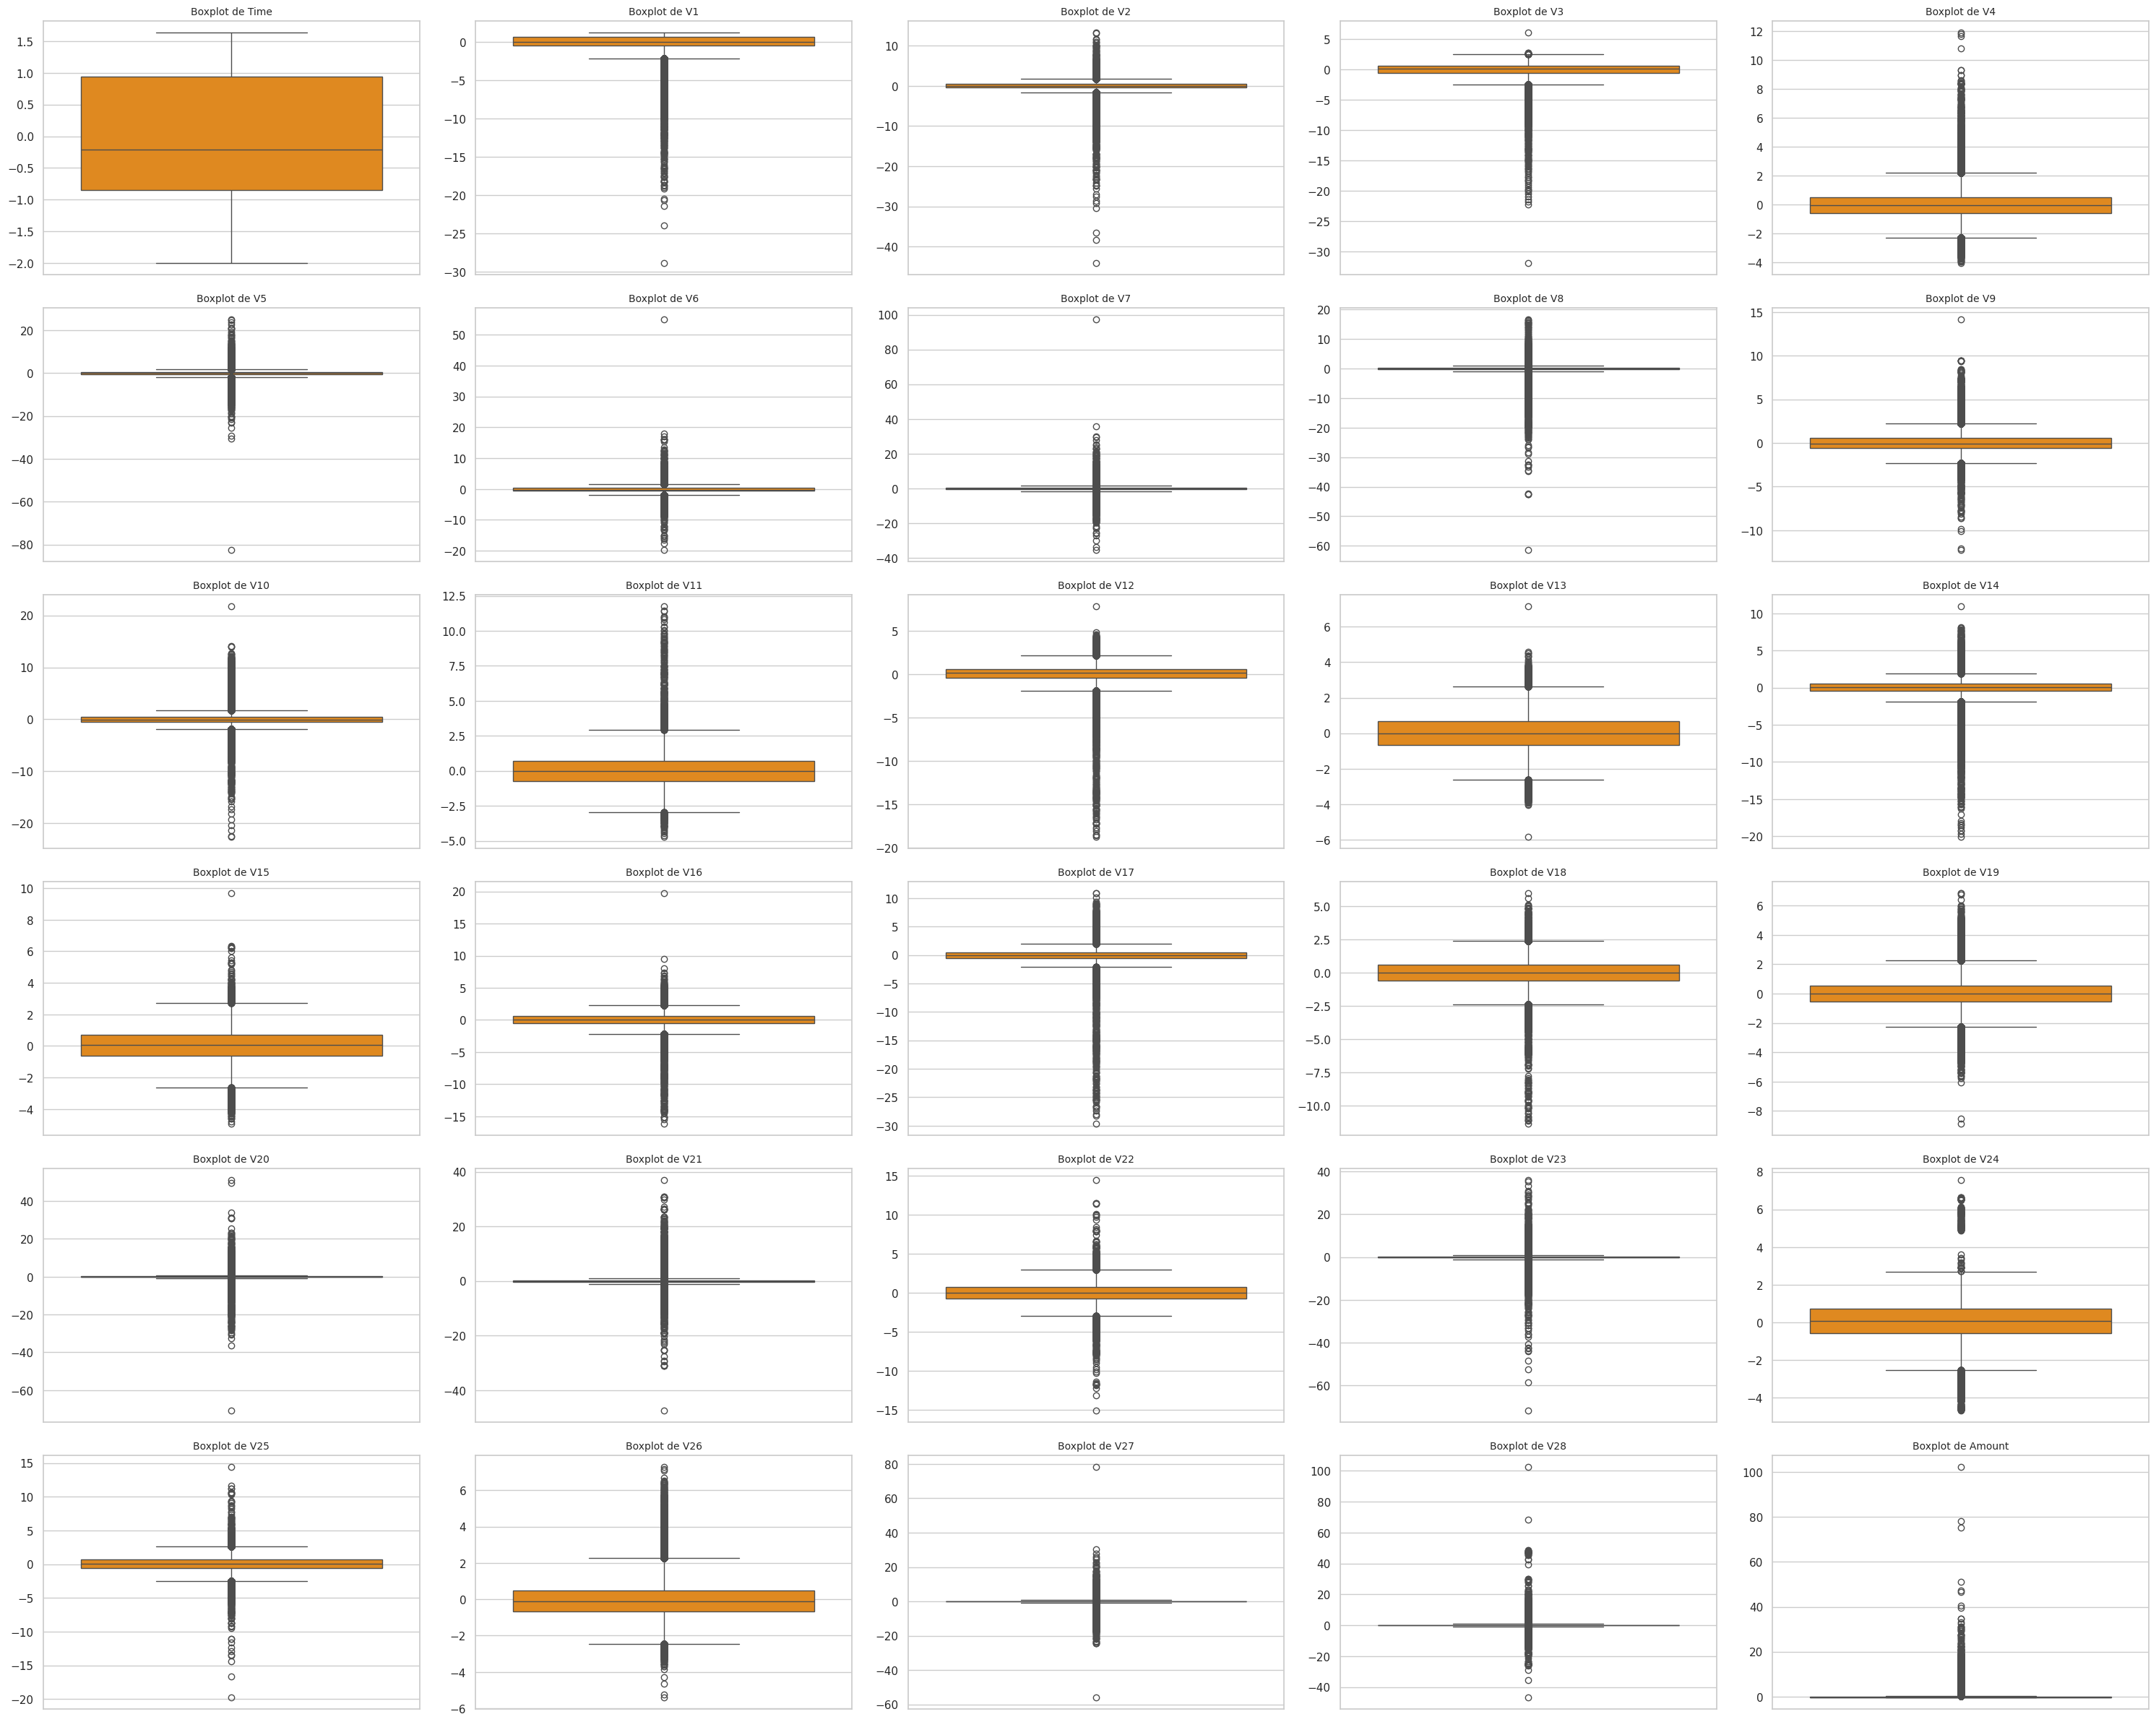

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Defina o estilo dos gráficos
sns.set(style="whitegrid")

# Lista de variáveis para os boxplots
variables = ['Time','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
             'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
             'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

# Número de subplots
n_vars = len(variables)

# Criação de subplots
fig, axes = plt.subplots(6, 5, figsize=(30, 24))
axes = axes.flatten()

for i, var in enumerate(variables):
    # Boxplot para a variável do conjunto de dados
    sns.boxplot(y=credit_sem_duplicatas[var], ax=axes[i], color='darkorange')
    axes[i].set_title(f"Boxplot de {var}", fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Ajuste o espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()



---

---

**Notamos que a distribuição das transações não é simétrica.**
cuidado pois algumas variaveis tem distribuição normal!


---

---

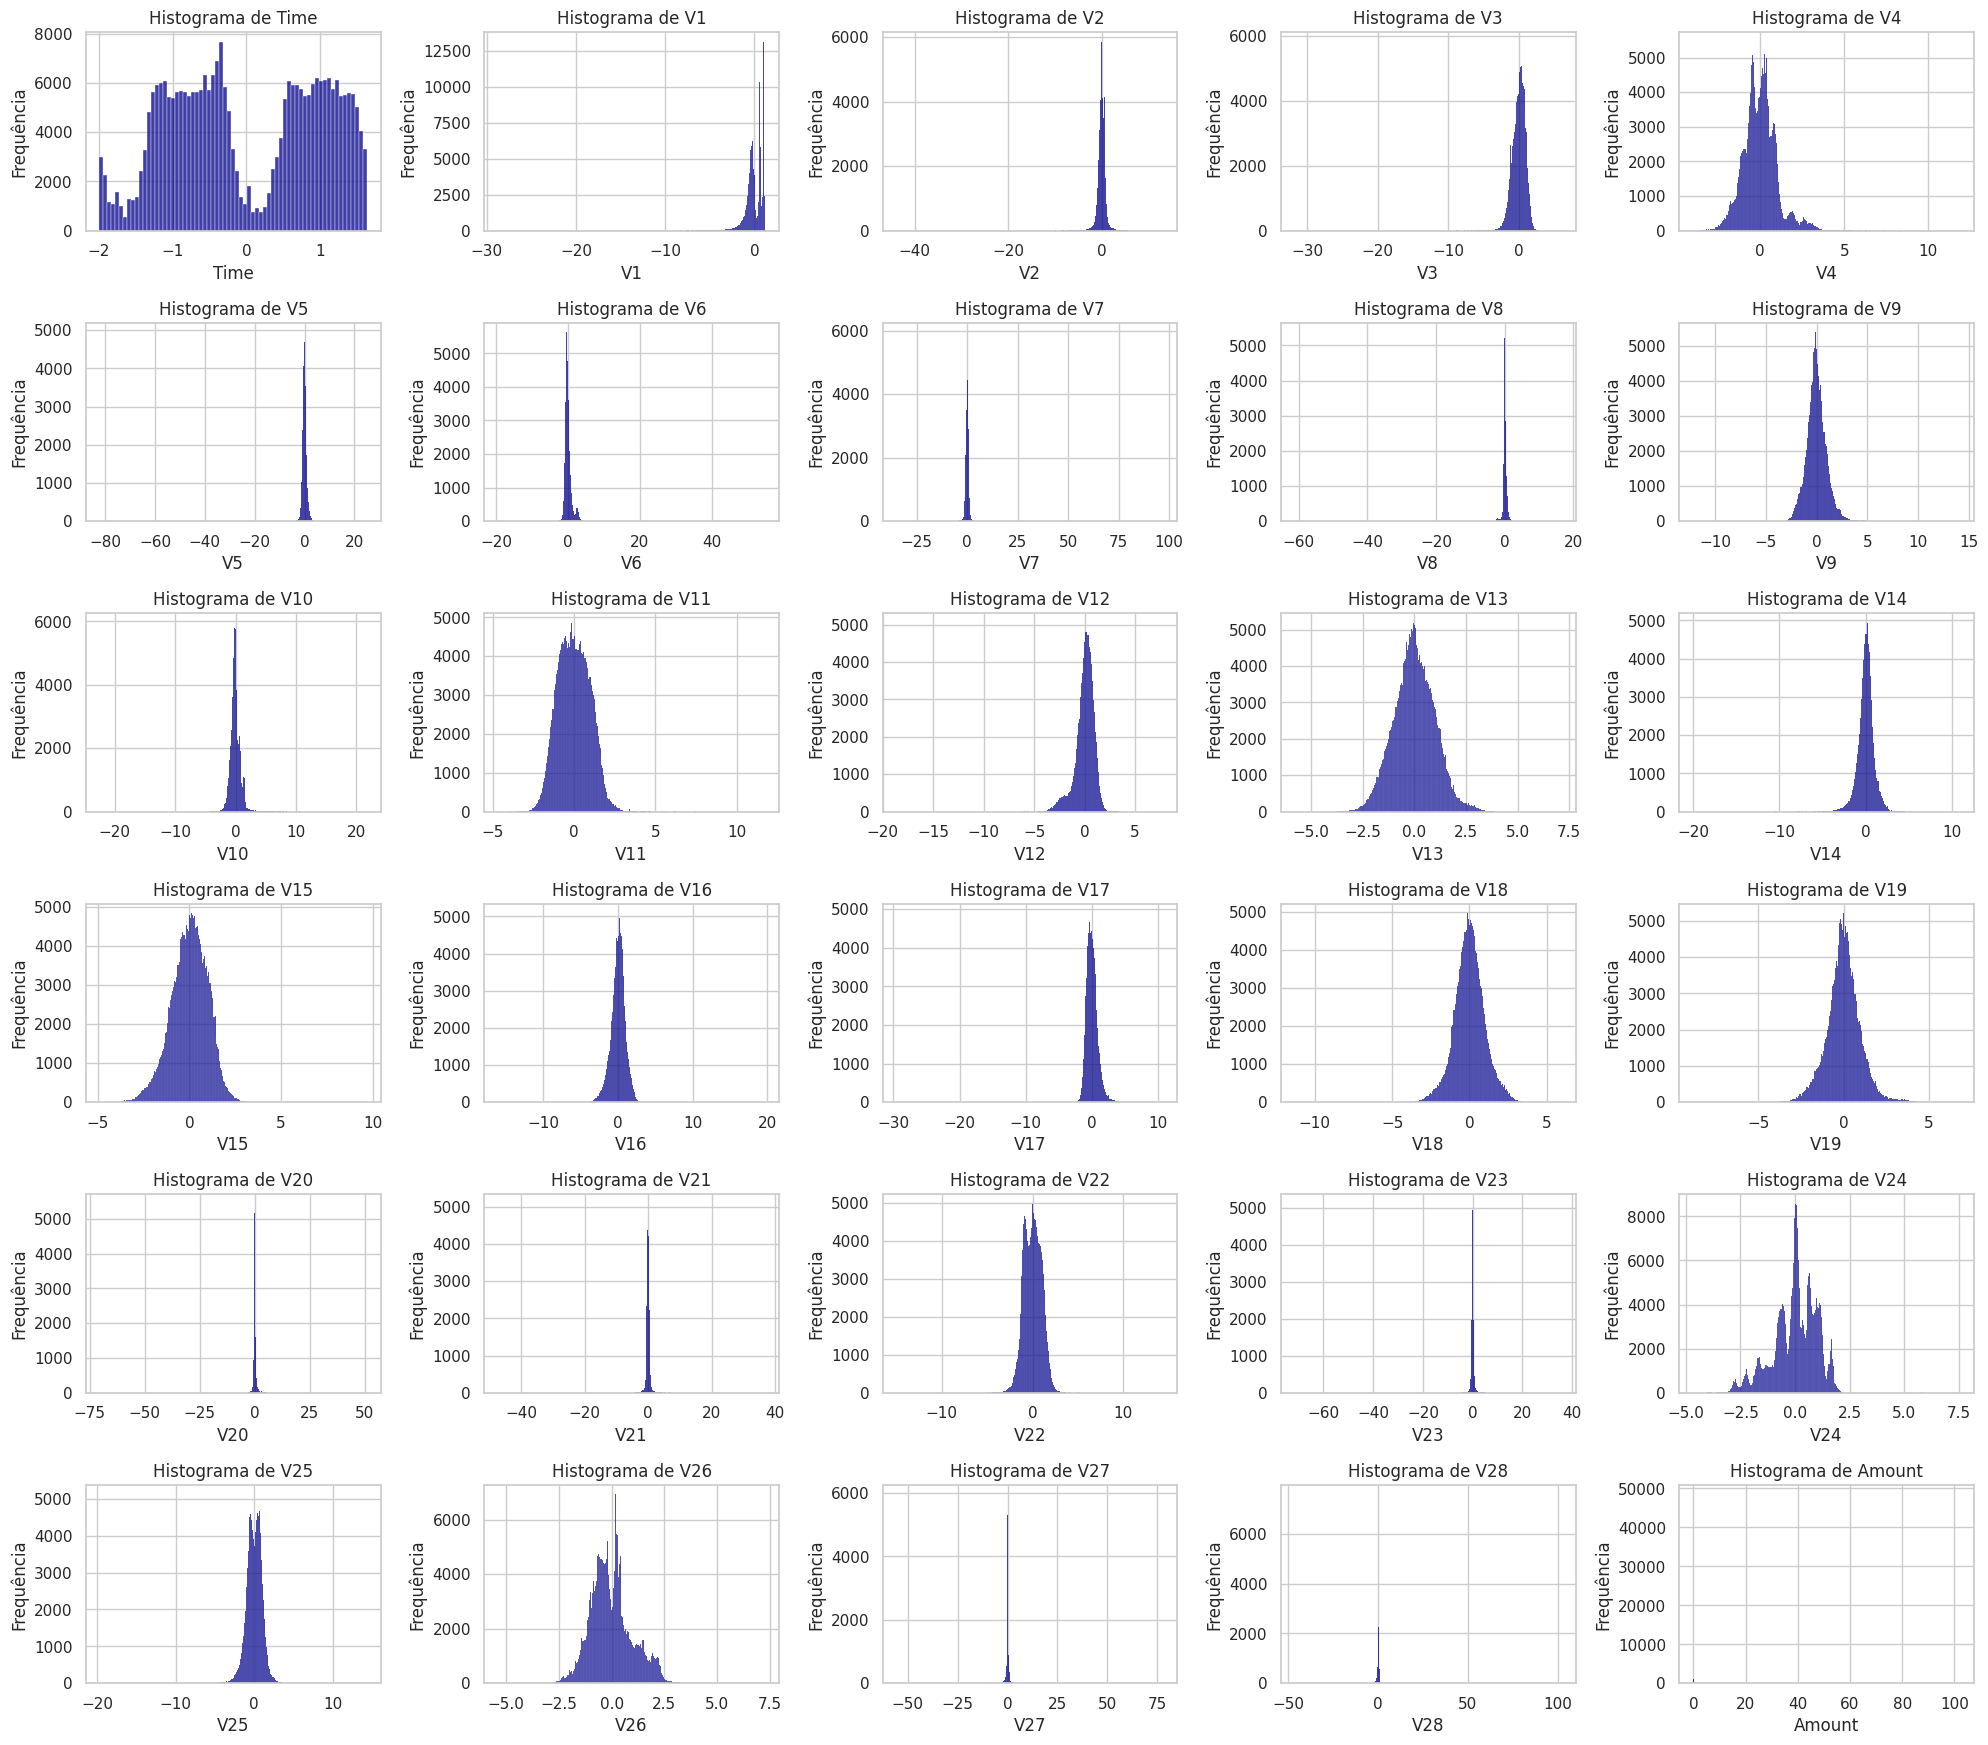

In [ ]:
import seaborn as sns

#Histograma dos dados
variables = ['Time','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
             'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
             'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

# Número de variáveis
n_vars = len(variables)

# Número de colunas e linhas para subplots
n_cols = 5
n_rows = (n_vars // n_cols) + 1

# Criar subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
axes = axes.flatten()

# Plotar histogramas para cada variável
for i, var in enumerate(variables):
    sns.histplot(credit_sem_duplicatas[var], ax=axes[i], color='darkblue')
    axes[i].set_title(f'Histograma de {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequência')

# Remover subplots extras
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

# Ajustar layout
plt.tight_layout()
plt.show()

In [ ]:
# Aplicar o teste de Shapiro-Wilk para cada variável
sw_test_results = {}

for var in variables:
    stat, p_value = stats.shapiro(credit_sem_duplicatas[var])
    sw_test_results[var] = {'Estatística': stat, 'p-valor': p_value}

    # Verificar se a variável segue uma distribuição normal
    if p_value > 0.05:
        print(f"Variável: {var} - Distribuição Normal (p-valor: {p_value:.5f})")
    else:
        print(f"Variável: {var} - Não é Normal (p-valor: {p_value:.5f})")

Variável: Time - Não é Normal (p-valor: 0.00000)
Variável: V1 - Não é Normal (p-valor: 0.00000)
Variável: V2 - Não é Normal (p-valor: 0.00000)
Variável: V3 - Não é Normal (p-valor: 0.00000)
Variável: V4 - Não é Normal (p-valor: 0.00000)
Variável: V5 - Não é Normal (p-valor: 0.00000)
Variável: V6 - Não é Normal (p-valor: 0.00000)
Variável: V7 - Não é Normal (p-valor: 0.00000)
Variável: V8 - Não é Normal (p-valor: 0.00000)
Variável: V9 - Não é Normal (p-valor: 0.00000)
Variável: V10 - Não é Normal (p-valor: 0.00000)
Variável: V11 - Não é Normal (p-valor: 0.00000)
Variável: V12 - Não é Normal (p-valor: 0.00000)
Variável: V13 - Não é Normal (p-valor: 0.00000)
Variável: V14 - Não é Normal (p-valor: 0.00000)
Variável: V15 - Não é Normal (p-valor: 0.00000)
Variável: V16 - Não é Normal (p-valor: 0.00000)
Variável: V17 - Não é Normal (p-valor: 0.00000)
Variável: V18 - Não é Normal (p-valor: 0.00000)
Variável: V19 - Não é Normal (p-valor: 0.00000)
Variável: V20 - Não é Normal (p-valor: 0.00000)


---

---

**Verificando a CORRELAÇÃO entre as variáveis através de um gráfico:**

---

---

<Axes: title={'center': 'Matriz de correlação'}>

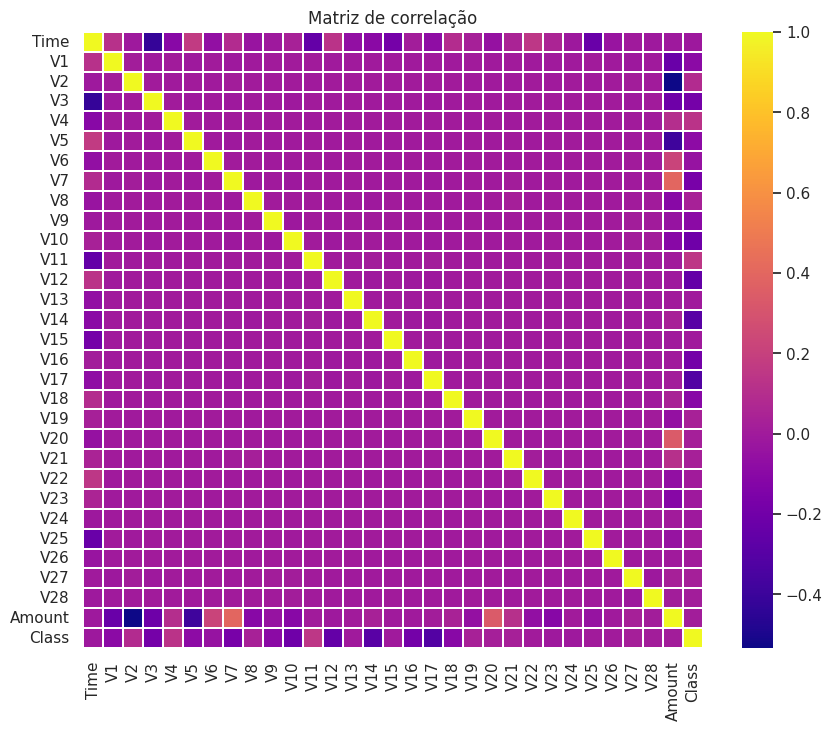

In [ ]:
# Verificando a correlação entre as variáveis numéricas do data frame
corrmat = credit_sem_duplicatas.corr()
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title("Matriz de correlação", size=12)
sns.heatmap(corrmat, annot=False, cmap="plasma", linewidth=.05, ax=ax, xticklabels=True, yticklabels=True)

---

---

**Verificando a CORRELAÇÃO entre as variáveis através de uma tabela:**

---

---

In [ ]:
# Calcular a matriz de correlação
corrmat = credit_sem_duplicatas.corr()

# Mostrar a matriz de correlação como uma tabela
print("Matriz de Correlação:\n")
print(corrmat.to_string(float_format=lambda x: f'{x:.4f}'))
corrmat.to_csv('matriz_correlacao.csv')

Matriz de Correlação:

          Time      V1      V2      V3      V4      V5      V6      V7      V8      V9     V10     V11     V12     V13     V14     V15     V16     V17     V18     V19     V20     V21     V22     V23     V24     V25     V26     V27     V28  Amount   Class
Time    1.0000  0.1179 -0.0106 -0.4221 -0.1058  0.1732 -0.0633  0.0853 -0.0382 -0.0079  0.0311 -0.2485  0.1255 -0.0660 -0.1003 -0.1844  0.0113 -0.0738  0.0903  0.0295 -0.0510  0.0459  0.1437  0.0515 -0.0160 -0.2333 -0.0418 -0.0052 -0.0093 -0.0106 -0.0124
V1      0.1179  1.0000  0.0069 -0.0081  0.0023 -0.0070  0.0004 -0.0092 -0.0012  0.0018  0.0008  0.0010 -0.0015 -0.0006 -0.0027 -0.0006 -0.0033 -0.0035 -0.0035  0.0009 -0.0014  0.0028 -0.0014 -0.0013 -0.0007 -0.0002 -0.0007 -0.0157 -0.0049 -0.2301 -0.0945
V2     -0.0106  0.0069  1.0000  0.0053 -0.0015  0.0052 -0.0006  0.0074  0.0029 -0.0003  0.0006 -0.0006  0.0023  0.0007  0.0027  0.0015  0.0040  0.0032  0.0025 -0.0004 -0.0013 -0.0049  0.0012 -0.0039  0.0007 -0.00

---

---

**Importando bibliotecas necessárias para o treinamento e teste:**

---

---

In [5]:
# machine learning

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

# métricas de avaliação
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix, auc, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

# Reamostragem dos dados
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler

---

---

**No passo abaixo, iremos dividir a amostra em treinamento e teste, antes de aplicar os métodos para balancear os dados:**

---

---

In [8]:
# Dividir o DataFrame 'Credit' em conjuntos de treinamento e teste (70% treinamento, 30% teste)

X = credit_sem_duplicatas.drop(['Class','Time'], axis=1)
y = credit_sem_duplicatas['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, )

# Exibir as informações sobre os tamanhos dos conjuntos de treinamento e teste
print(f"Tamanho do conjunto de treinamento (X): {len(X_train)} amostras")
print(f"Tamanho do conjunto de teste (X): {len(X_test)} amostras")
print(f"Tamanho do conjunto de treinamento (Y): {len(y_train)} amostras")
print(f"Tamanho do conjunto de teste (Y): {len(y_test)} amostras")

Tamanho do conjunto de treinamento (X): 198608 amostras
Tamanho do conjunto de teste (X): 85118 amostras
Tamanho do conjunto de treinamento (Y): 198608 amostras
Tamanho do conjunto de teste (Y): 85118 amostras


---

---

**Ajustando os dados através de modelo Floresta Aleatória com parâmetros default:**

---

---

Acurácia: 0.9996
Acurácia Balanceada: 0.8768
Precisão: 0.9528
Revocação: 0.7537
F1 Score: 0.8417
ROC AUC: 0.9346
PR AUC: 0.8228

Matriz de Confusão:
 [[84979     5]
 [   33   101]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.95      0.75      0.84       134

    accuracy                           1.00     85118
   macro avg       0.98      0.88      0.92     85118
weighted avg       1.00      1.00      1.00     85118



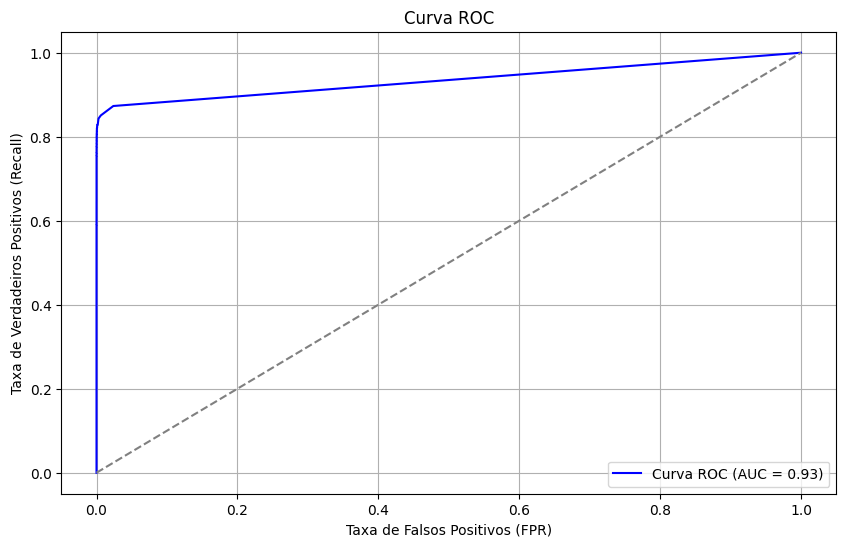

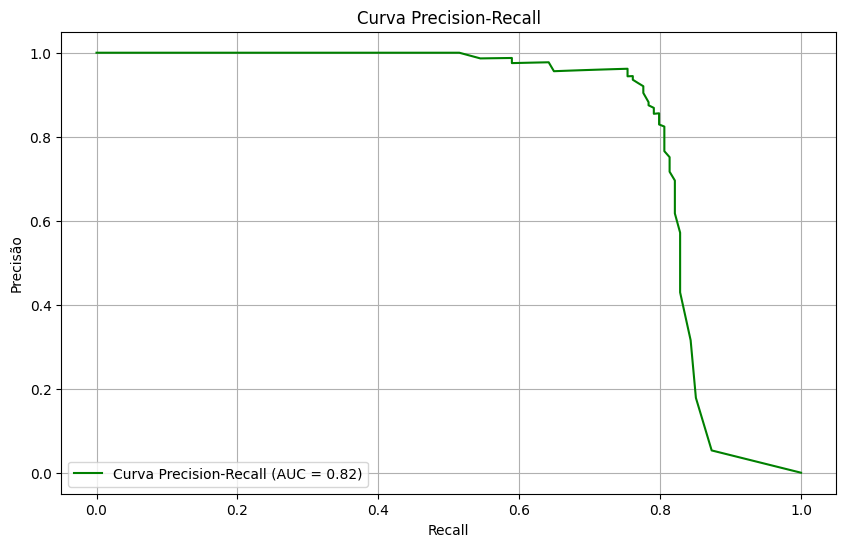

In [ ]:
# Ajustar o modelo de Random Forest Default
model_rf = RandomForestClassifier(random_state=23) #controla a aleatoriedade dos conjutos de dados e das features
model_rf.fit(X_train, y_train)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

---


---

**Ajustando os dados através de modelo Regresão Logística com parâmetros default:**

---


---


In [ ]:
#algumas informações:
#penalidade {'l1', 'l2', 'elasticnet', Nenhum} None: nenhuma penalidade é adicionada;
#tol float, padrão=1e-4 Tolerância para critérios de parada.
#C float, padrão=1.0 Inverso da força de regularização; deve ser um float positivo. Como em máquinas de vetores de suporte, valores menores especificam regularização mais forte.
#fit_intercept bool, padrão=True Especifica se uma constante (também conhecida como viés ou interceptação) deve ser adicionada à função de decisão.
#class_weight dict ou 'balanceado', padrão=Nenhum
#random_state int, instância RandomState, padrão=Nenhum Usado quando solver== 'sag', 'saga' ou 'liblinear' para embaralhar os dados.

Acurácia: 0.9992
Acurácia Balanceada: 0.7760
Precisão: 0.8605
Revocação: 0.5522
F1 Score: 0.6727
ROC AUC: 0.9694
PR AUC: 0.7098

Matriz de Confusão:
 [[84972    12]
 [   60    74]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.86      0.55      0.67       134

    accuracy                           1.00     85118
   macro avg       0.93      0.78      0.84     85118
weighted avg       1.00      1.00      1.00     85118



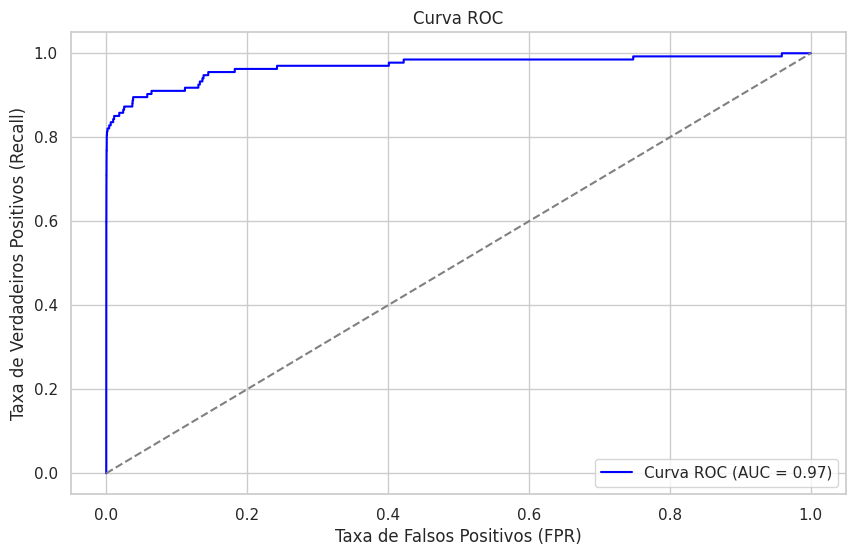

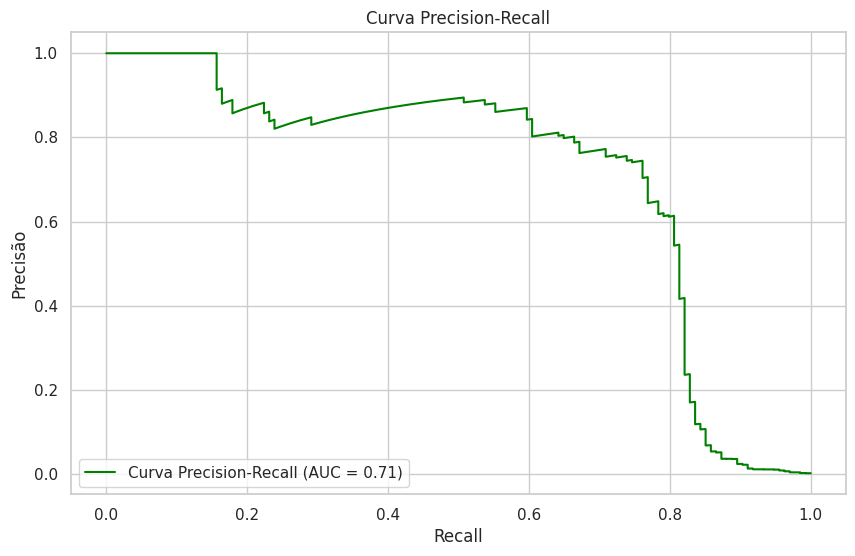

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, recall_score, f1_score, roc_auc_score, classification_report,
                             confusion_matrix, balanced_accuracy_score, roc_curve, auc, precision_recall_curve,
                             precision_score)
import matplotlib.pyplot as plt

# Ajustar o modelo de Regressão Logística Default
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Preditos
y_pred = model_lr.predict(X_test)
y_prob = model_lr.predict_proba(X_test)[:, 1]

# Treinamento do modelo
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Predições e probabilidades
y_pred = model_lr.predict(X_test)
y_prob = model_lr.predict_proba(X_test)[:, 1]  # Probabilidades para a classe positiva

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

---

---

**Ajustando os dados através de modelo Floresta Aleatória e SMOTE com parâmetros default :**

---

---

Acurácia: 0.9995
Acurácia Balanceada: 0.8992
Precisão: 0.8992
Revocação: 0.7985
F1 Score: 0.8458
ROC AUC: 0.9664
PR AUC: 0.8242

Matriz de Confusão:
 [[84972    12]
 [   27   107]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.90      0.80      0.85       134

    accuracy                           1.00     85118
   macro avg       0.95      0.90      0.92     85118
weighted avg       1.00      1.00      1.00     85118



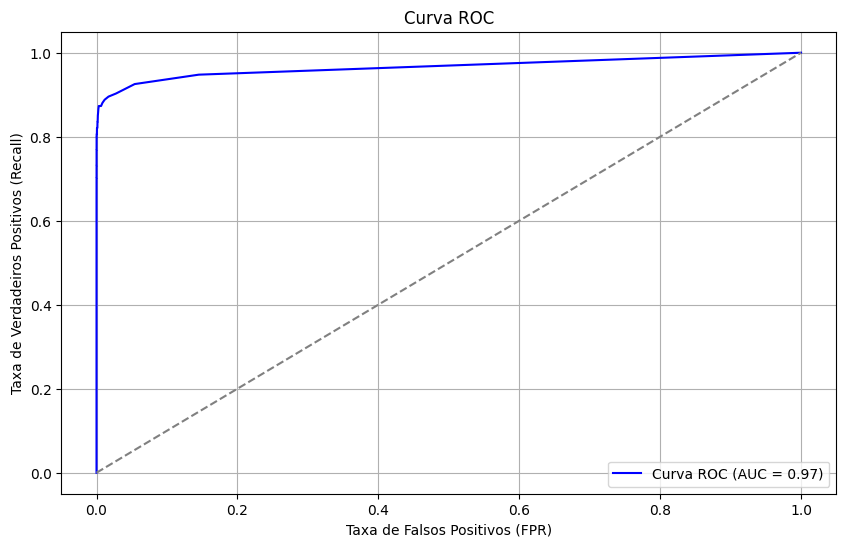

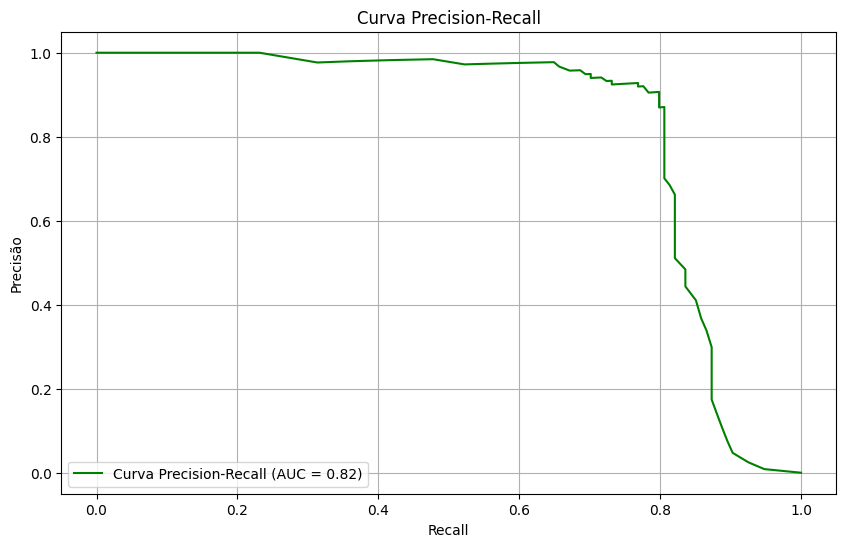

In [9]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23)

# Aplicar o SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados sem bootstrap
model_rf = RandomForestClassifier(random_state=23)
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

-----------

-----

**Técnica de Balanceamento SMOTE  (sampling_strategy=0.5 e k_neighbors=5) com Floresta Aleatória:**

-----------

-----

Acurácia: 0.9995
Acurácia Balanceada: 0.8992
Precisão: 0.8843
Revocação: 0.7985
F1 Score: 0.8392
ROC AUC: 0.9764
PR AUC: 0.8237

Matriz de Confusão:
 [[84970    14]
 [   27   107]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.88      0.80      0.84       134

    accuracy                           1.00     85118
   macro avg       0.94      0.90      0.92     85118
weighted avg       1.00      1.00      1.00     85118



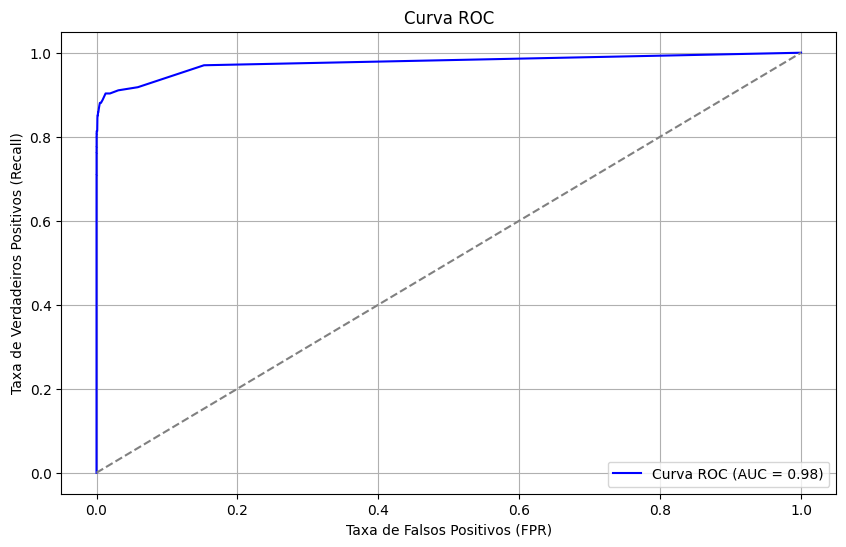

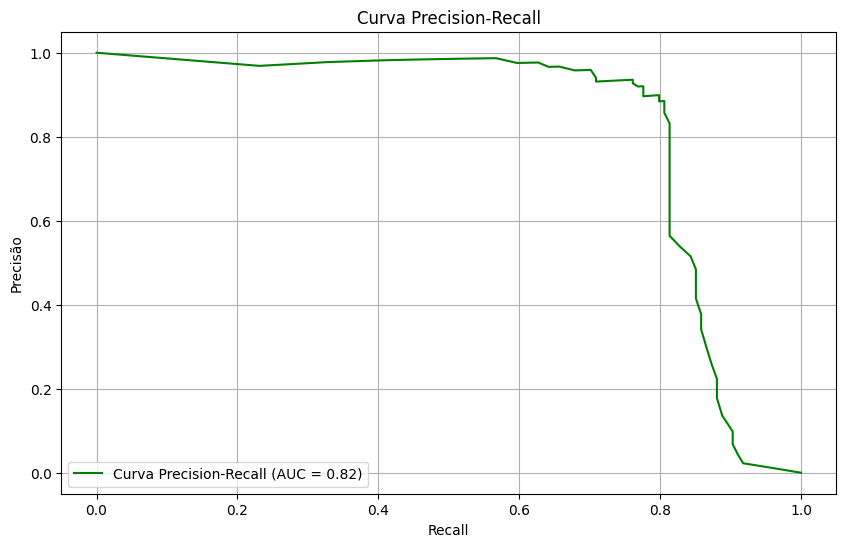

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23, k_neighbors=5, sampling_strategy=0.5)

# Aplicar o SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados sem bootstrap
model_rf = RandomForestClassifier(random_state=23)
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

-----------

-----

**Técnica de Balanceamento SMOTE  (sampling_strategy=0,5 e k_neighbors=10) com Floresta Aleatória:**

-----------

-----

Acurácia: 0.9995
Acurácia Balanceada: 0.9254
Precisão: 0.8333
Revocação: 0.8511
F1 Score: 0.8421
ROC AUC: 0.9869
PR AUC: 0.9077

Matriz de Confusão:
 [[28317     8]
 [    7    40]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28325
           1       0.83      0.85      0.84        47

    accuracy                           1.00     28372
   macro avg       0.92      0.93      0.92     28372
weighted avg       1.00      1.00      1.00     28372



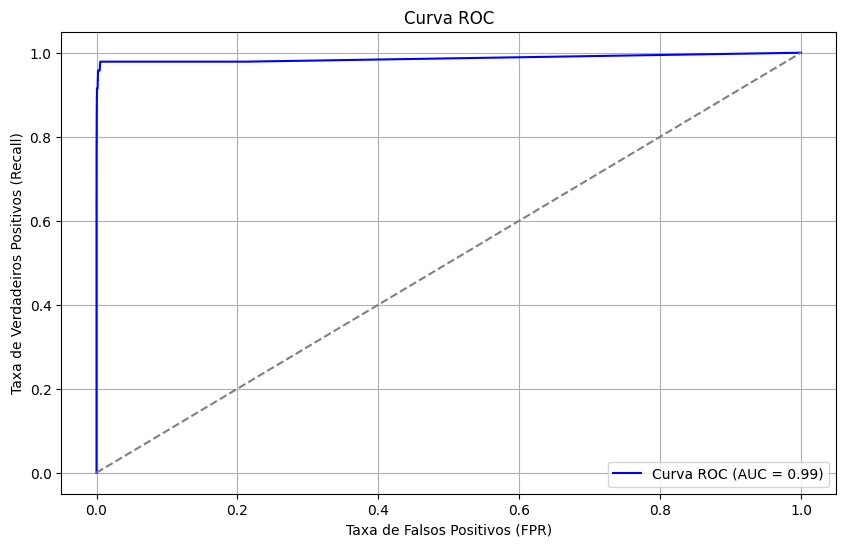

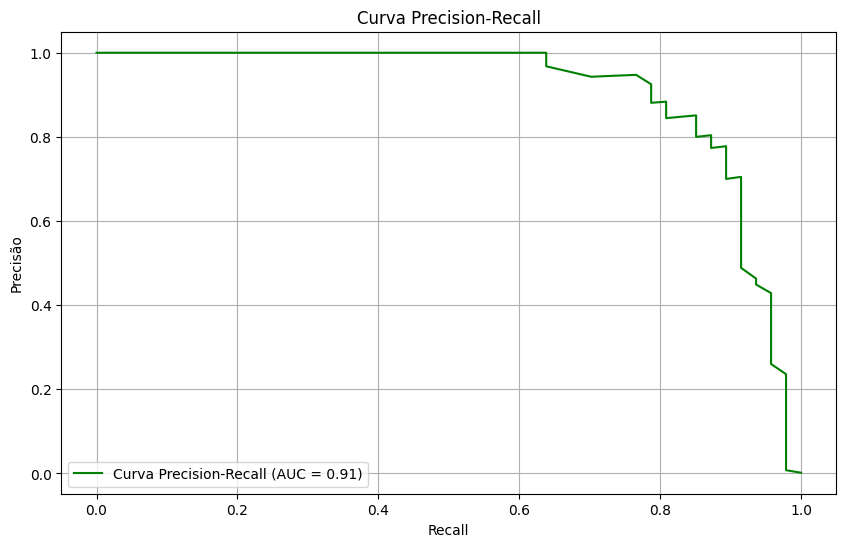

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23, sampling_strategy=0.5, k_neighbors=10, n_jobs=-1)

# Aplicar o SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados sem bootstrap
model_rf = RandomForestClassifier(random_state=23)
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


-----------

-----

**Técnica de Balanceamento SMOTE com Regressão Logística:**

-----------

-----

Acurácia: 0.9726
Acurácia Balanceada: 0.9544
Precisão: 0.0537
Revocação: 0.9362
F1 Score: 0.1016
ROC AUC: 0.9807
PR AUC: 0.7750

Matriz de Confusão:
 [[27550   775]
 [    3    44]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     28325
           1       0.05      0.94      0.10        47

    accuracy                           0.97     28372
   macro avg       0.53      0.95      0.54     28372
weighted avg       1.00      0.97      0.98     28372



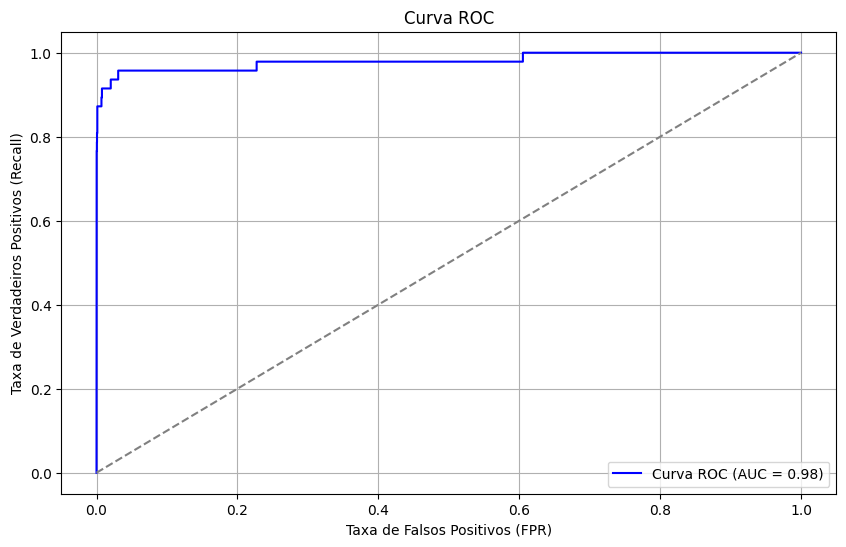

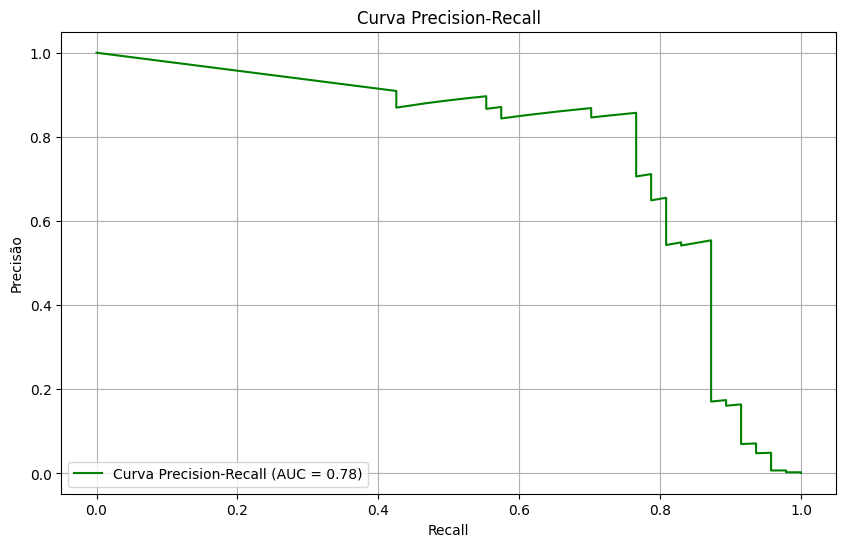

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, recall_score, f1_score, roc_auc_score, classification_report,
                             confusion_matrix, balanced_accuracy_score, roc_curve, auc, precision_recall_curve,
                             precision_score)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23)

# Aplicar o SMOTE apenas nos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Regressão Logística usando os dados balanceados pelo SMOTE
model_lr = LogisticRegression()
model_lr.fit(X_resampled, y_resampled)

# Predições e probabilidades no conjunto de teste original
y_pred = model_lr.predict(X_test)
y_prob = model_lr.predict_proba(X_test)[:, 1]  # Probabilidades para a classe positiva

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


-----------

-----

**Técnica de Balanceamento SMOTE  (sampling_strategy = 0.5) com Regressão Logística:**

-----------

-----

Acurácia: 0.9873
Acurácia Balanceada: 0.9618
Precisão: 0.1100
Revocação: 0.9362
F1 Score: 0.1969
ROC AUC: 0.9851
PR AUC: 0.7840

Matriz de Confusão:
 [[27969   356]
 [    3    44]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     28325
           1       0.11      0.94      0.20        47

    accuracy                           0.99     28372
   macro avg       0.55      0.96      0.60     28372
weighted avg       1.00      0.99      0.99     28372



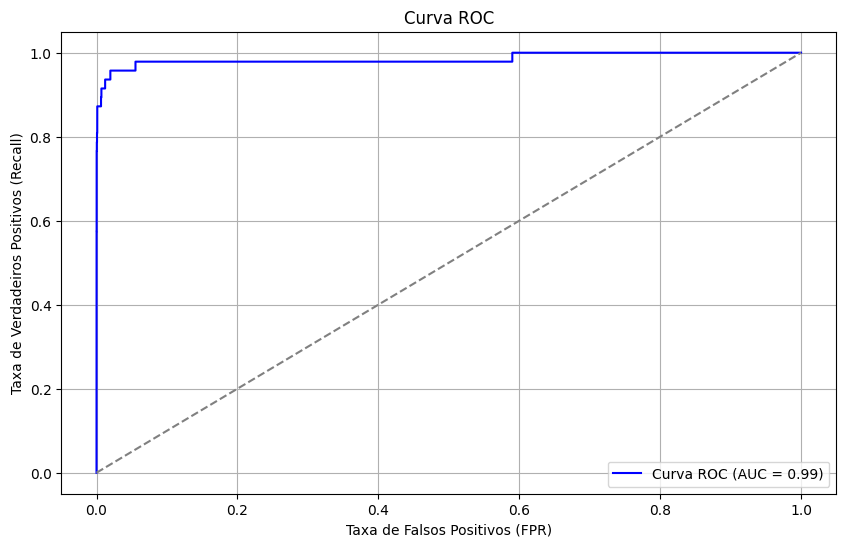

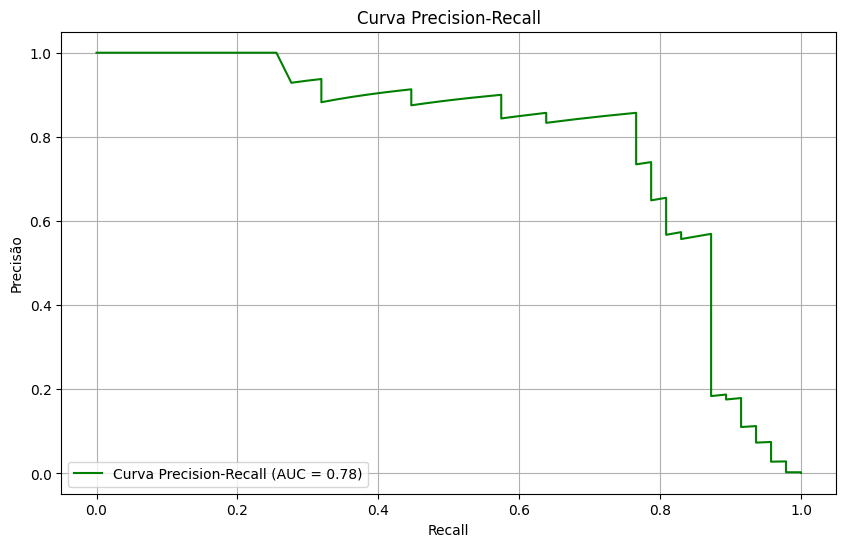

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, recall_score, f1_score, roc_auc_score, classification_report,
                             confusion_matrix, balanced_accuracy_score, roc_curve, auc, precision_recall_curve,
                             precision_score)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23, sampling_strategy = 0.5)

# Aplicar o SMOTE apenas nos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Regressão Logística usando os dados balanceados pelo SMOTE
model_lr = LogisticRegression()
model_lr.fit(X_resampled, y_resampled)

# Predições e probabilidades no conjunto de teste original
y_pred = model_lr.predict(X_test)
y_prob = model_lr.predict_proba(X_test)[:, 1]  # Probabilidades para a classe positiva

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

-----------

-----

**Técnica de Balanceamento SMOTE  (sampling_strategy = 0.5 e k_neighbors = 10) com Regressão Logística:**

-----------

-----

Acurácia: 0.9872
Acurácia Balanceada: 0.9511
Precisão: 0.1067
Revocação: 0.9149
F1 Score: 0.1911
ROC AUC: 0.9858
PR AUC: 0.7869

Matriz de Confusão:
 [[27965   360]
 [    4    43]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     28325
           1       0.11      0.91      0.19        47

    accuracy                           0.99     28372
   macro avg       0.55      0.95      0.59     28372
weighted avg       1.00      0.99      0.99     28372



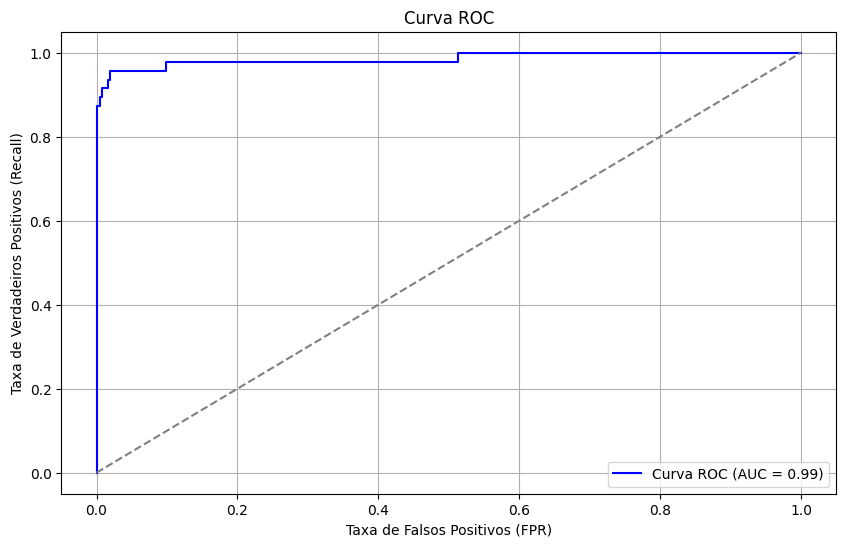

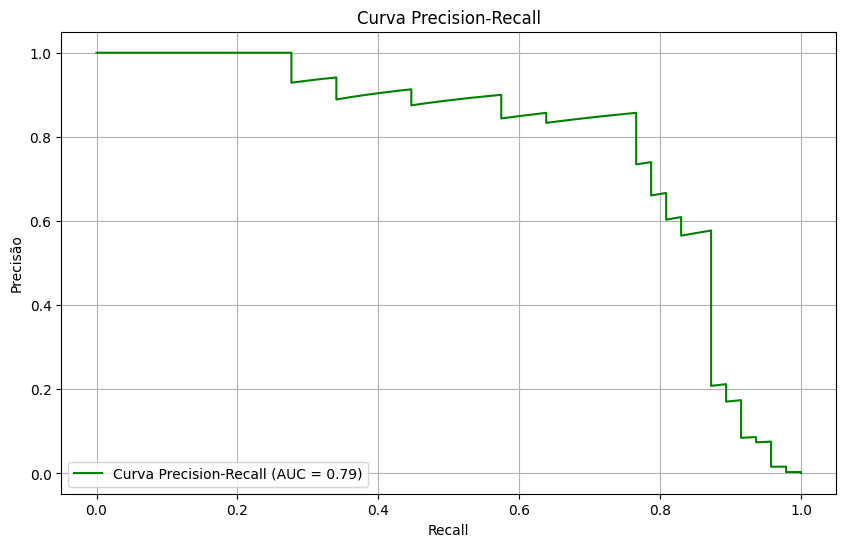

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, recall_score, f1_score, roc_auc_score, classification_report,
                             confusion_matrix, balanced_accuracy_score, roc_curve, auc, precision_recall_curve,
                             precision_score)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23, sampling_strategy = 0.5, k_neighbors=10)

# Aplicar o SMOTE apenas nos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Regressão Logística usando os dados balanceados pelo SMOTE
model_lr = LogisticRegression()
model_lr.fit(X_resampled, y_resampled)

# Predições e probabilidades no conjunto de teste original
y_pred = model_lr.predict(X_test)
y_prob = model_lr.predict_proba(X_test)[:, 1]  # Probabilidades para a classe positiva

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

-----------

-----

**Técnica de Balanceamento ADASYN com Floresta Aleatória:**

-----------

-----

Acurácia: 0.9995
Acurácia Balanceada: 0.8917
Precisão: 0.8974
Revocação: 0.7836
F1 Score: 0.8367
ROC AUC: 0.9560
PR AUC: 0.8100

Matriz de Confusão:
 [[84972    12]
 [   29   105]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.90      0.78      0.84       134

    accuracy                           1.00     85118
   macro avg       0.95      0.89      0.92     85118
weighted avg       1.00      1.00      1.00     85118



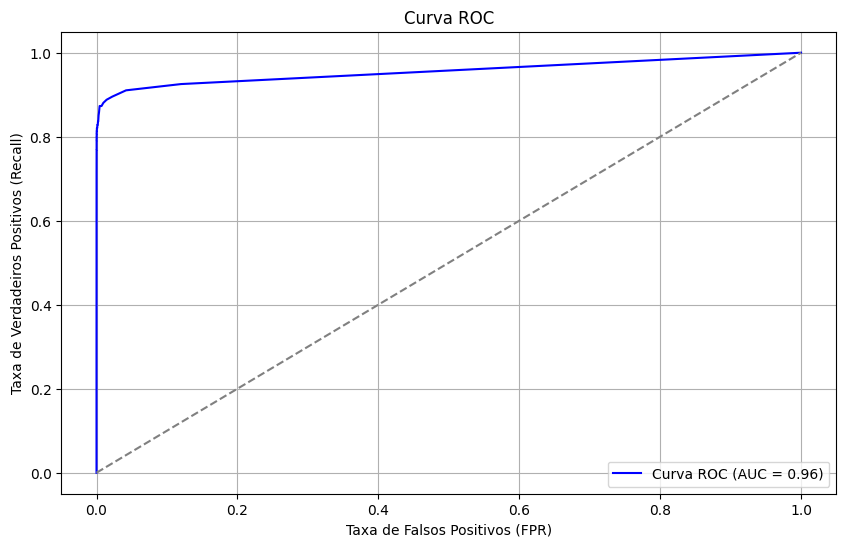

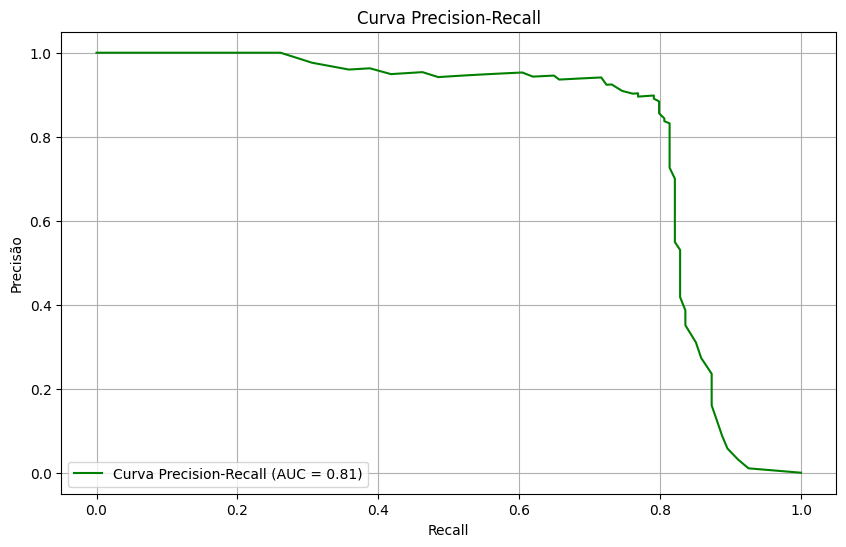

In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23)

# Aplicar o ADASYN aos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados
model_rf = RandomForestClassifier(random_state=23)
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

-----------

-----

**Técnica de Balanceamento ADASYN (sampling_strategy = 0.5 e n_neighbors = 5) com Floresta Aleatória:**

-----------

-----

Acurácia: 0.9994
Acurácia Balanceada: 0.9147
Precisão: 0.8125
Revocação: 0.8298
F1 Score: 0.8211
ROC AUC: 0.9875
PR AUC: 0.8785

Matriz de Confusão:
 [[28316     9]
 [    8    39]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28325
           1       0.81      0.83      0.82        47

    accuracy                           1.00     28372
   macro avg       0.91      0.91      0.91     28372
weighted avg       1.00      1.00      1.00     28372



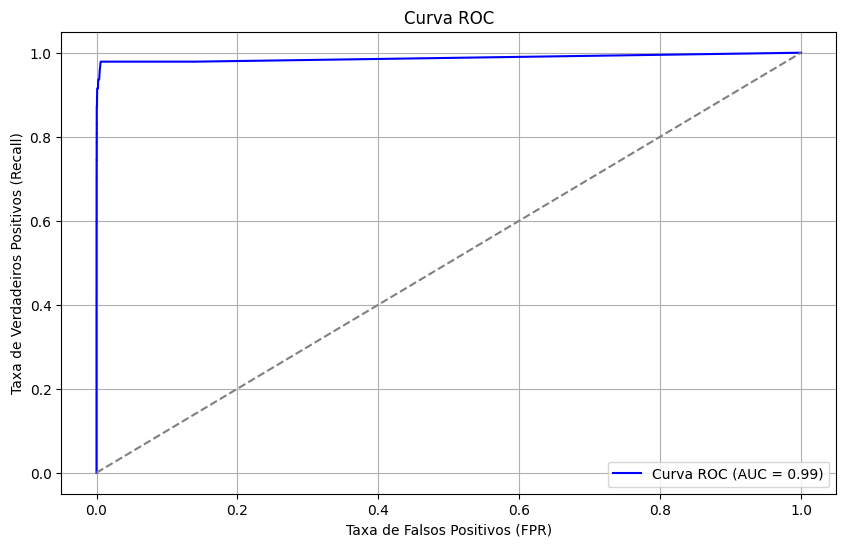

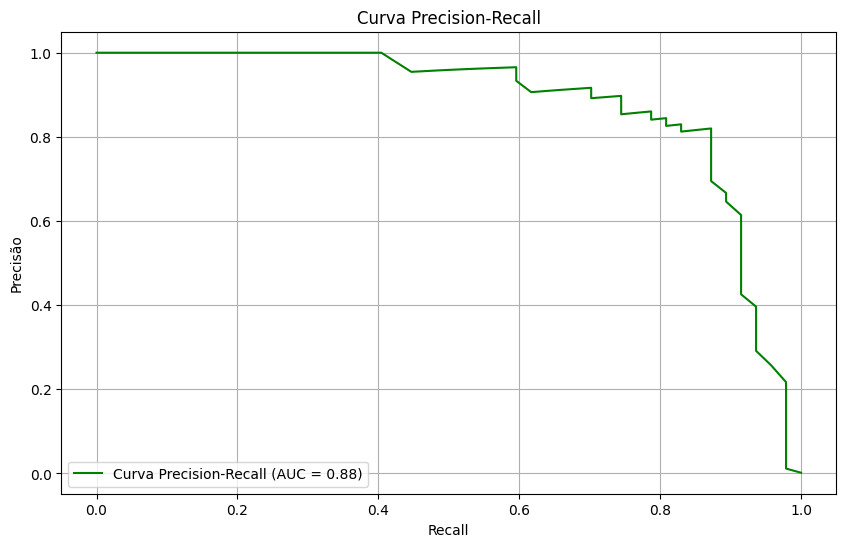

In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23, sampling_strategy = 0.5)

# Aplicar o ADASYN aos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados
model_rf = RandomForestClassifier(random_state=23)
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

-----------

-----

**Técnica de Balanceamento ADASYN (sampling_strategy = 0.5 e n_neighbors = 10) com Floresta Aleatória:**

-----------

-----

Acurácia: 0.9994
Acurácia Balanceada: 0.9254
Precisão: 0.8000
Revocação: 0.8511
F1 Score: 0.8247
ROC AUC: 0.9866
PR AUC: 0.8766

Matriz de Confusão:
 [[28315    10]
 [    7    40]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28325
           1       0.80      0.85      0.82        47

    accuracy                           1.00     28372
   macro avg       0.90      0.93      0.91     28372
weighted avg       1.00      1.00      1.00     28372



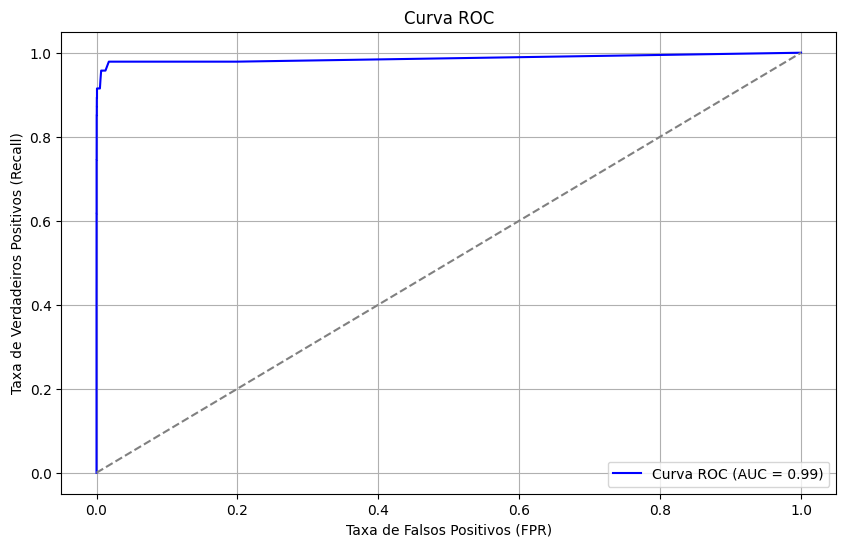

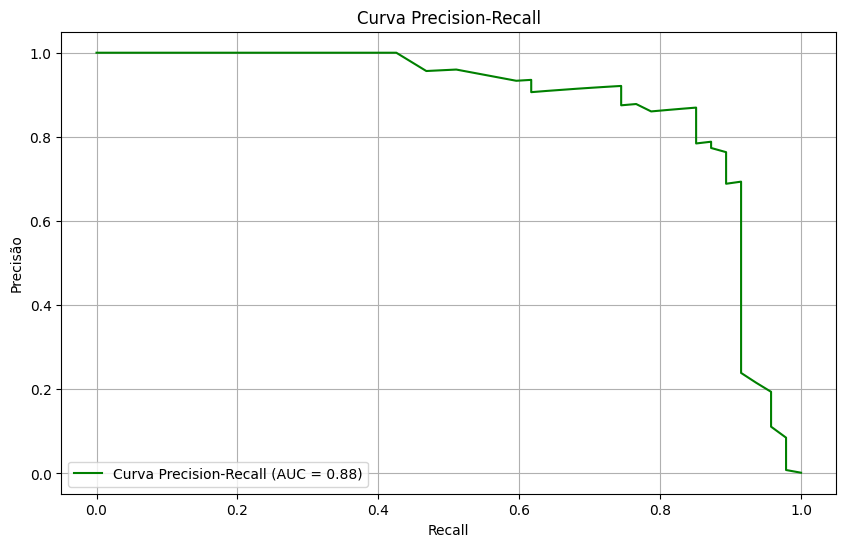

In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23, sampling_strategy = 0.5, n_neighbors=10)

# Aplicar o ADASYN aos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados
model_rf = RandomForestClassifier(random_state=23)
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

-----------

-----

**Técnica de Balanceamento ADASYN com Regressão Logística:**

-----------

-----

Acurácia: 0.9042
Acurácia Balanceada: 0.9202
Precisão: 0.0159
Revocação: 0.9362
F1 Score: 0.0314
ROC AUC: 0.9663
PR AUC: 0.7648

Matriz de Confusão:
 [[25610  2715]
 [    3    44]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95     28325
           1       0.02      0.94      0.03        47

    accuracy                           0.90     28372
   macro avg       0.51      0.92      0.49     28372
weighted avg       1.00      0.90      0.95     28372



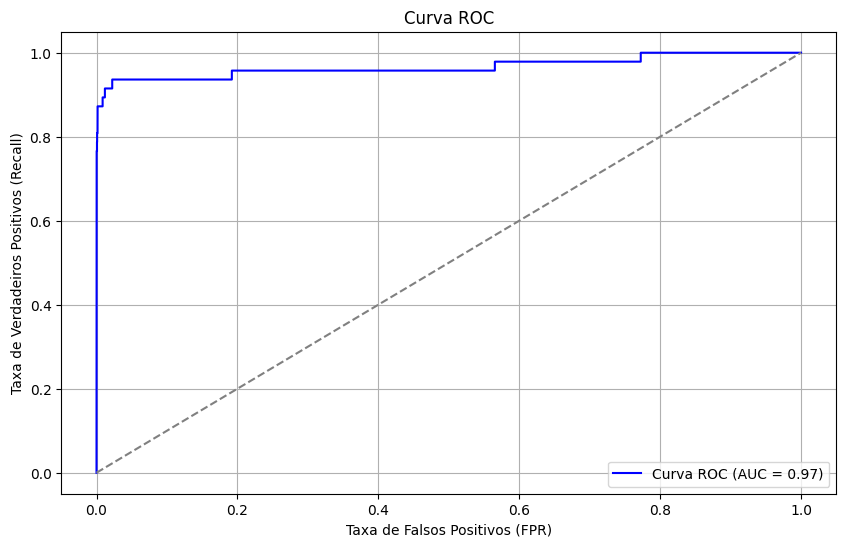

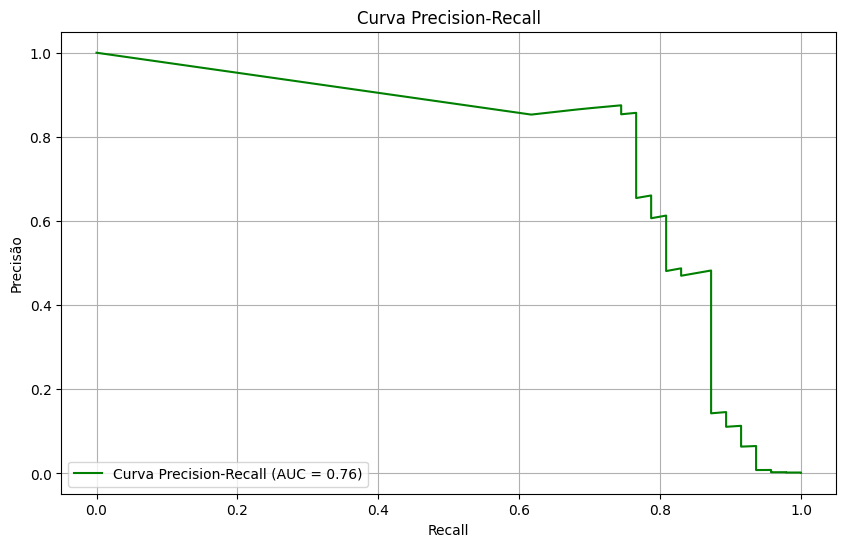

In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, recall_score, f1_score, roc_auc_score, classification_report,
                             confusion_matrix, balanced_accuracy_score, roc_curve, auc, precision_recall_curve,
                             precision_score)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23)

# Aplicar o ADASYN apenas nos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Regressão Logística usando os dados balanceados pelo ADASYN
model_lr = LogisticRegression()
model_lr.fit(X_resampled, y_resampled)

# Predições e probabilidades no conjunto de teste original
y_pred = model_lr.predict(X_test)
y_prob = model_lr.predict_proba(X_test)[:, 1]  # Probabilidades para a classe positiva

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()



-----------

-----

**Técnica de Balanceamento ADASYN (sampling_strategy = 0.5 e n_neighbors=5 )com Regressão Logística:**

-----------

-----

Acurácia: 0.9484
Acurácia Balanceada: 0.9423
Precisão: 0.0292
Revocação: 0.9362
F1 Score: 0.0567
ROC AUC: 0.9679
PR AUC: 0.7687

Matriz de Confusão:
 [[26864  1461]
 [    3    44]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     28325
           1       0.03      0.94      0.06        47

    accuracy                           0.95     28372
   macro avg       0.51      0.94      0.52     28372
weighted avg       1.00      0.95      0.97     28372



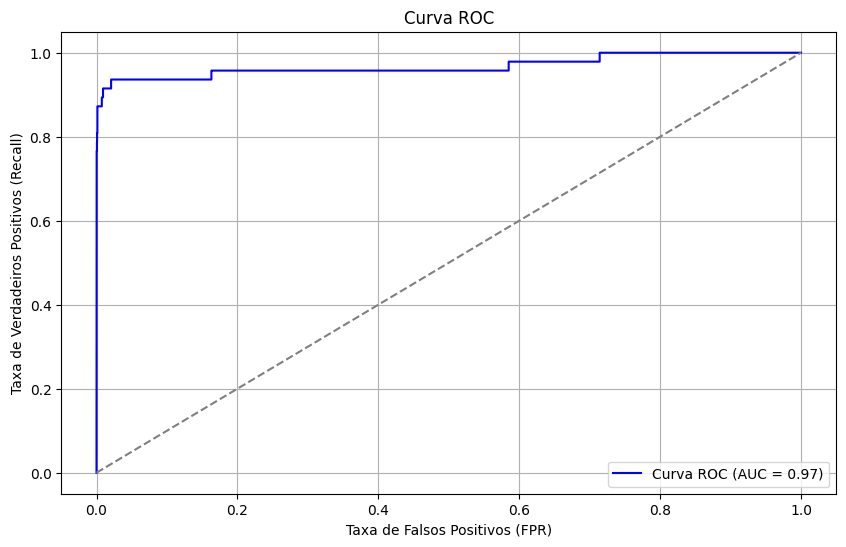

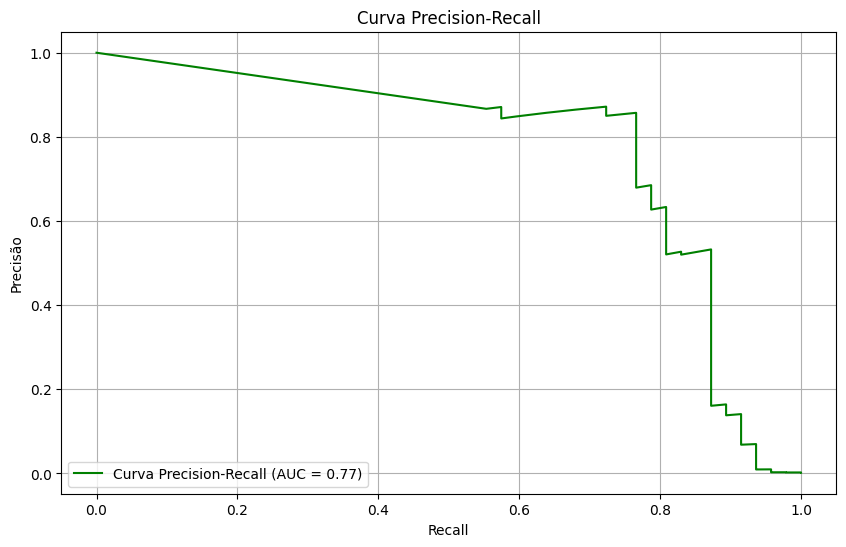

In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, recall_score, f1_score, roc_auc_score, classification_report,
                             confusion_matrix, balanced_accuracy_score, roc_curve, auc, precision_recall_curve,
                             precision_score)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23, sampling_strategy = 0.5)

# Aplicar o ADASYN apenas nos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Regressão Logística usando os dados balanceados pelo ADASYN
model_lr = LogisticRegression()
model_lr.fit(X_resampled, y_resampled)

# Predições e probabilidades no conjunto de teste original
y_pred = model_lr.predict(X_test)
y_prob = model_lr.predict_proba(X_test)[:, 1]  # Probabilidades para a classe positiva

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

-----------

-----

**Técnica de Balanceamento ADASYN (sampling_strategy = 0.5 e n_neighbors=10) com Regressão Logística:**

-----------

-----

Acurácia: 0.9540
Acurácia Balanceada: 0.9451
Precisão: 0.0327
Revocação: 0.9362
F1 Score: 0.0632
ROC AUC: 0.9660
PR AUC: 0.7762

Matriz de Confusão:
 [[27023  1302]
 [    3    44]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98     28325
           1       0.03      0.94      0.06        47

    accuracy                           0.95     28372
   macro avg       0.52      0.95      0.52     28372
weighted avg       1.00      0.95      0.97     28372



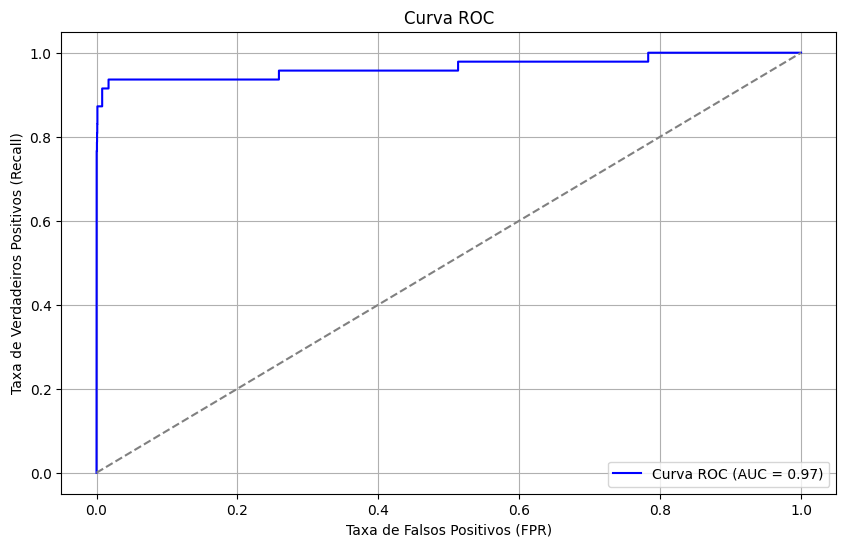

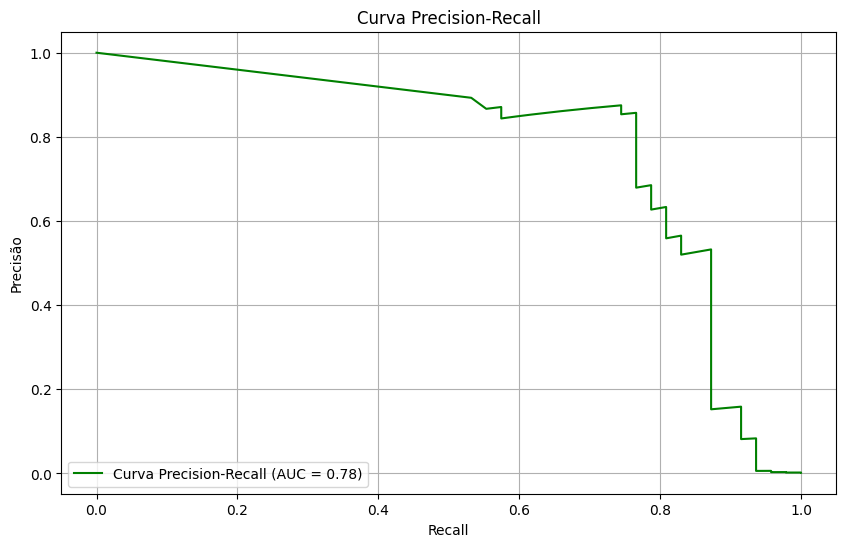

In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, recall_score, f1_score, roc_auc_score, classification_report,
                             confusion_matrix, balanced_accuracy_score, roc_curve, auc, precision_recall_curve,
                             precision_score)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23, sampling_strategy = 0.5, n_neighbors=10)

# Aplicar o ADASYN apenas nos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Regressão Logística usando os dados balanceados pelo ADASYN
model_lr = LogisticRegression()
model_lr.fit(X_resampled, y_resampled)

# Predições e probabilidades no conjunto de teste original
y_pred = model_lr.predict(X_test)
y_prob = model_lr.predict_proba(X_test)[:, 1]  # Probabilidades para a classe positiva

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

-----------

-----

**Gráfico Comparativo dos modelos de Floresta Aleatória:**

-----------

-----

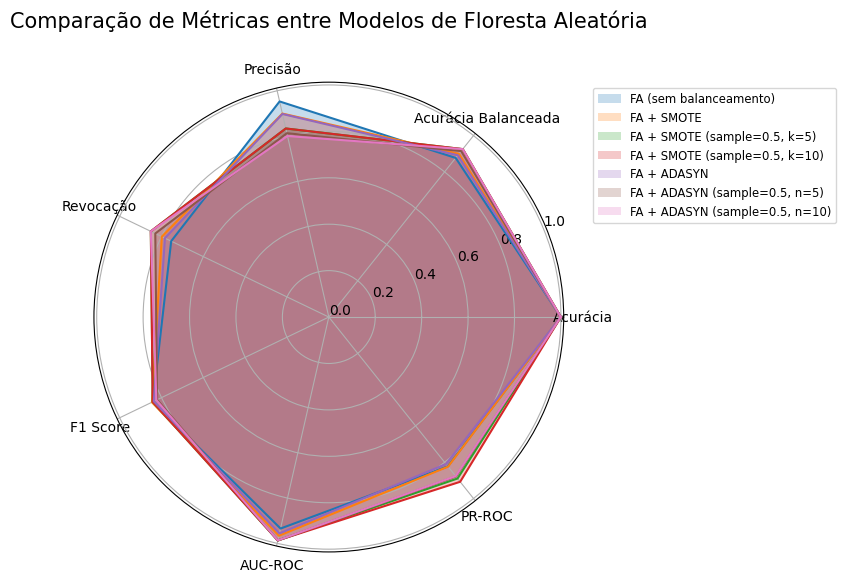

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Dados das métricas atualizadas para cada modelo
labels = ['Acurácia', 'Acurácia Balanceada', 'Precisão', 'Revocação', 'F1 Score', 'AUC-ROC', 'PR-ROC']

# Nomes dos modelos atualizados
model_names = ['FA (sem balanceamento)',
               'FA + SMOTE',
               'FA + SMOTE (sample=0.5, k=5)',
               'FA + SMOTE (sample=0.5, k=10)',
               'FA + ADASYN',
               'FA + ADASYN (sample=0.5, n=5)',
               'FA + ADASYN (sample=0.5, n=10)']

# Métricas atualizadas para cada modelo
metrics = [
    [0.9996, 0.8768, 0.9528, 0.7537, 0.8417, 0.9346, 0.8228],  # Floresta Aleatória (sem balanceamento)
    [0.9995, 0.8992, 0.8992, 0.7985, 0.8458, 0.9664, 0.8242],  # Floresta Aleatória + SMOTE (sampling_strategy='auto', k_neighbors=5)
    [0.9995, 0.9254, 0.8333, 0.8511, 0.8421, 0.9871, 0.8896],  # Floresta Aleatória + SMOTE (sampling_strategy = 0.5, k_neighbors=5)
    [0.9995, 0.9254, 0.8333, 0.8511, 0.8421, 0.9869, 0.9077],  # Floresta Aleatória + SMOTE (sampling_strategy = 0.5, k_neighbors=10)
    [0.9995, 0.8917, 0.8974, 0.7836, 0.8367, 0.9560, 0.8100],  # Floresta Aleatória + ADASYN
    [0.9994, 0.9147, 0.8125, 0.8298, 0.8211, 0.9875, 0.8785],  # Floresta Aleatória + ADASYN (sampling_strategy = 0.5, n_neighbors=5)
    [0.9994, 0.9254, 0.8000, 0.8511, 0.8247, 0.9866, 0.8766],  # Floresta Aleatória + ADASYN (sampling_strategy = 0.5, n_neighbors=10)
]

# Número de variáveis (métricas)
num_vars = len(labels)

# Ângulo para cada métrica no gráfico de radar
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Fechar o gráfico em um círculo
angles += angles[:1]

# Repetir a primeira métrica para fechar o círculo no gráfico
metrics = [m + [m[0]] for m in metrics]

# Iniciar o gráfico
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Adicionar linhas e rótulos para cada modelo
for i, m in enumerate(metrics):
    ax.fill(angles, m, label=model_names[i], alpha=0.25)
    ax.plot(angles, m)

# Configuração dos rótulos de cada eixo
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'], color="black", size=10)

# Adicionar a legenda e título
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize='small')  # Mover a legenda para fora do gráfico
plt.title('Comparação de Métricas entre Modelos de Floresta Aleatória', size=15, color='black', y=1.1)

# Ajustar espaçamento para a legenda não sobrepor o gráfico
plt.tight_layout(rect=[0, 0,1, 1])

# Exibir o gráfico
plt.show()


-----------

-----

**Gráfico Comparativo dos modelos de Regressão Logística:**

-----------

-----

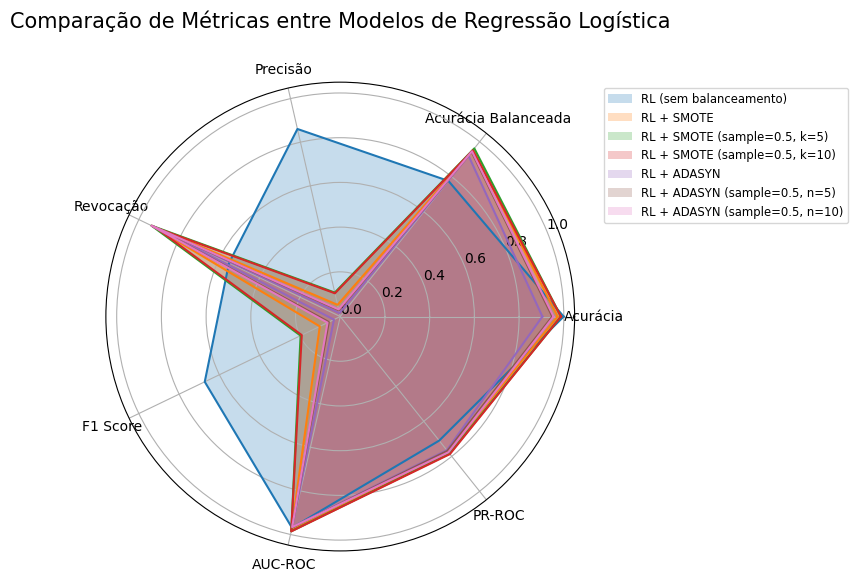

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Dados das métricas para cada modelo
labels = ['Acurácia', 'Acurácia Balanceada', 'Precisão', 'Revocação', 'F1 Score', 'AUC-ROC', 'PR-ROC']
model_names = ['RL (sem balanceamento)', 'RL + SMOTE',
               'RL + SMOTE (sample=0.5, k=5)', 'RL + SMOTE (sample=0.5, k=10)',
               'RL + ADASYN', 'RL + ADASYN (sample=0.5, n=5)', 'RL + ADASYN (sample=0.5, n=10)']

# Métricas para cada modelo (colocando os dados fornecidos)
metrics = [
    [0.9992, 0.7760, 0.8605, 0.5522, 0.6727, 0.9694, 0.7098],  # Regressão Logística (sem balanceamento)
    [0.9726, 0.9544, 0.0537, 0.9362, 0.1016, 0.9807, 0.7750],  # Regressão Logística + SMOTE
    [0.9873, 0.9618, 0.1100, 0.9362, 0.1969, 0.9851, 0.7840],  # SMOTE (0.5, k=5)
    [0.9872, 0.9511, 0.1067, 0.9149, 0.1911, 0.9858, 0.7869],  # SMOTE (0.5, k=10)
    [0.9042, 0.9202, 0.0159, 0.9362, 0.0314, 0.9663, 0.7648],  # ADASYN
    [0.9484, 0.9423, 0.0292, 0.9362, 0.0567, 0.9679, 0.7687],  # ADASYN (0.5, n=5)
    [0.9540, 0.9451, 0.0327, 0.9362, 0.0632, 0.9660, 0.7762],  # ADASYN (0.5, n=10)
]

# Número de variáveis (métricas)
num_vars = len(labels)

# Ângulo para cada métrica no gráfico de radar
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Fechar o gráfico em um círculo
angles += angles[:1]

# Repetir a primeira métrica para fechar o círculo no gráfico
metrics = [m + [m[0]] for m in metrics]

# Iniciar o gráfico
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Adicionar linhas e rótulos para cada modelo
for i, m in enumerate(metrics):
    ax.fill(angles, m, label=model_names[i], alpha=0.25)
    ax.plot(angles, m)

# Configuração dos rótulos de cada eixo
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'], color="black", size=10)

# Adicionar a legenda e título
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize='small')  # Mover a legenda para fora do gráfico
plt.title('Comparação de Métricas entre Modelos de Regressão Logística', size=15, color='black', y=1.1)

# Ajustar espaçamento para a legenda não sobrepor o gráfico
plt.tight_layout(rect=[0, 0,1, 1])

# Exibir o gráfico
plt.show()



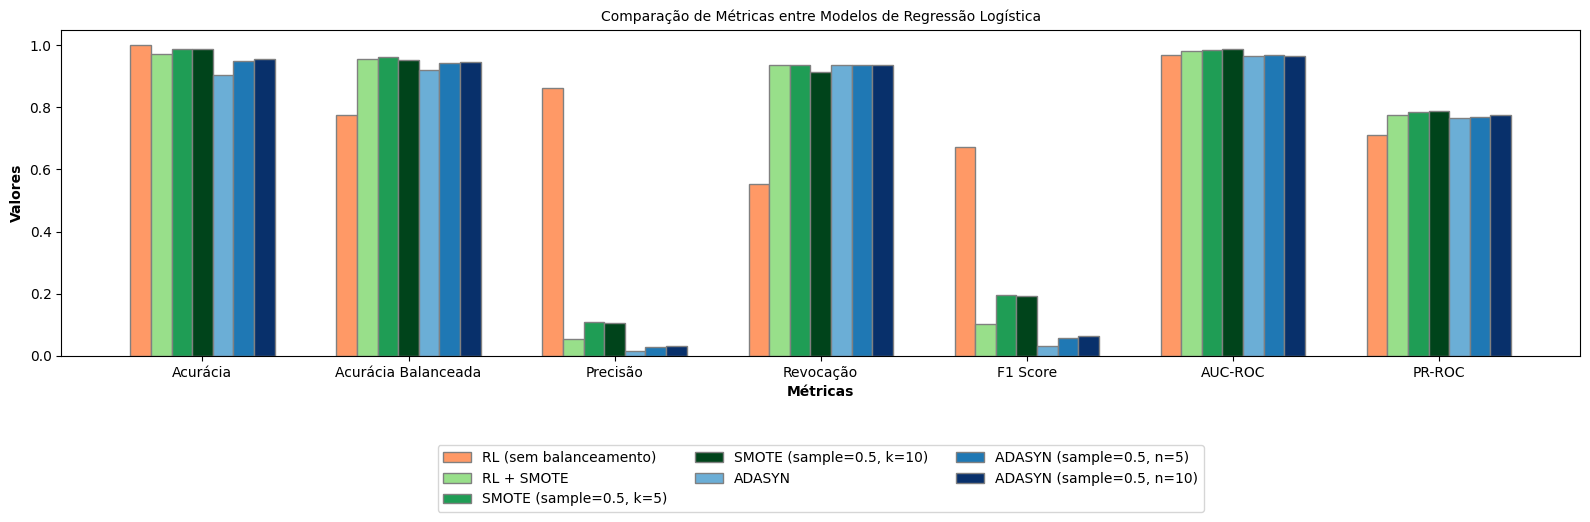

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Definir uma paleta de cores pastéis
#colors = ['#4c72b0', '#BAE1FF', '#FFDFBA', '#ff7f0e', '#FF6347', '#937860', '#da8bc3']
#colors = ['#2ca02c', '#98df8a', '#1f9d55', '#74c476', '#31a354', '#006d2c', '#00441b']
#colors = ['#ffcc99', '#ff9966', '#ff6600', '#ff4500', '#e64a19', '#d84315', '#bf360c']

colors = ['#ff9966', '#98df8a', '#1f9d55', '#00441b', '#6baed6', '#1f78b4', '#08306b']



# Dados das métricas para cada modelo
labels = ['Acurácia', 'Acurácia Balanceada', 'Precisão', 'Revocação', 'F1 Score', 'AUC-ROC', 'PR-ROC']
model_names = ['RL (sem balanceamento)', 'RL + SMOTE', 'SMOTE (sample=0.5, k=5)',
               'SMOTE (sample=0.5, k=10)', 'ADASYN', 'ADASYN (sample=0.5, n=5)', 'ADASYN (sample=0.5, n=10)']

# Métricas para cada modelo
metrics = [
    [0.9992, 0.7760, 0.8605, 0.5522, 0.6727, 0.9694, 0.7098],  # RL sem balanceamento
    [0.9726, 0.9544, 0.0537, 0.9362, 0.1016, 0.9807, 0.7750],  # RL + SMOTE
    [0.9873, 0.9618, 0.1100, 0.9362, 0.1969, 0.9851, 0.7840],  # SMOTE (0.5, k=5)
    [0.9872, 0.9511, 0.1067, 0.9149, 0.1911, 0.9858, 0.7869],  # SMOTE (0.5, k=10)
    [0.9042, 0.9202, 0.0159, 0.9362, 0.0314, 0.9663, 0.7648],  # ADASYN
    [0.9484, 0.9423, 0.0292, 0.9362, 0.0567, 0.9679, 0.7687],  # ADASYN (0.5, n=5)
    [0.9540, 0.9451, 0.0327, 0.9362, 0.0632, 0.9660, 0.7762],  # ADASYN (0.5, n=10)
]

# Convertendo para um array numpy para facilitar o plotting
metrics = np.array(metrics)

# Configurando a largura das barras
barWidth = 0.1

# Configurando a posição das barras no eixo x
r1 = np.arange(len(labels))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]

# Criando o gráfico de barras
plt.figure(figsize=(16, 6))

plt.bar(r1, metrics[0], color=colors[0], width=barWidth, edgecolor='grey', label=model_names[0])
plt.bar(r2, metrics[1], color=colors[1], width=barWidth, edgecolor='grey', label=model_names[1])
plt.bar(r3, metrics[2], color=colors[2], width=barWidth, edgecolor='grey', label=model_names[2])
plt.bar(r4, metrics[3], color=colors[3], width=barWidth, edgecolor='grey', label=model_names[3])
plt.bar(r5, metrics[4], color=colors[4], width=barWidth, edgecolor='grey', label=model_names[4])
plt.bar(r6, metrics[5], color=colors[5], width=barWidth, edgecolor='grey', label=model_names[5])
plt.bar(r7, metrics[6], color=colors[6], width=barWidth, edgecolor='grey', label=model_names[6])

# Adicionando os rótulos e título
plt.xlabel('Métricas', fontweight='bold')
plt.xticks([r + 3*barWidth for r in range(len(labels))], labels)

plt.ylabel('Valores', fontweight='bold')
plt.title('Comparação de Métricas entre Modelos de Regressão Logística', size=10)

# Exibir a legenda
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=3, fontsize='medium')


# Mostrar o gráfico
plt.tight_layout()
plt.show()




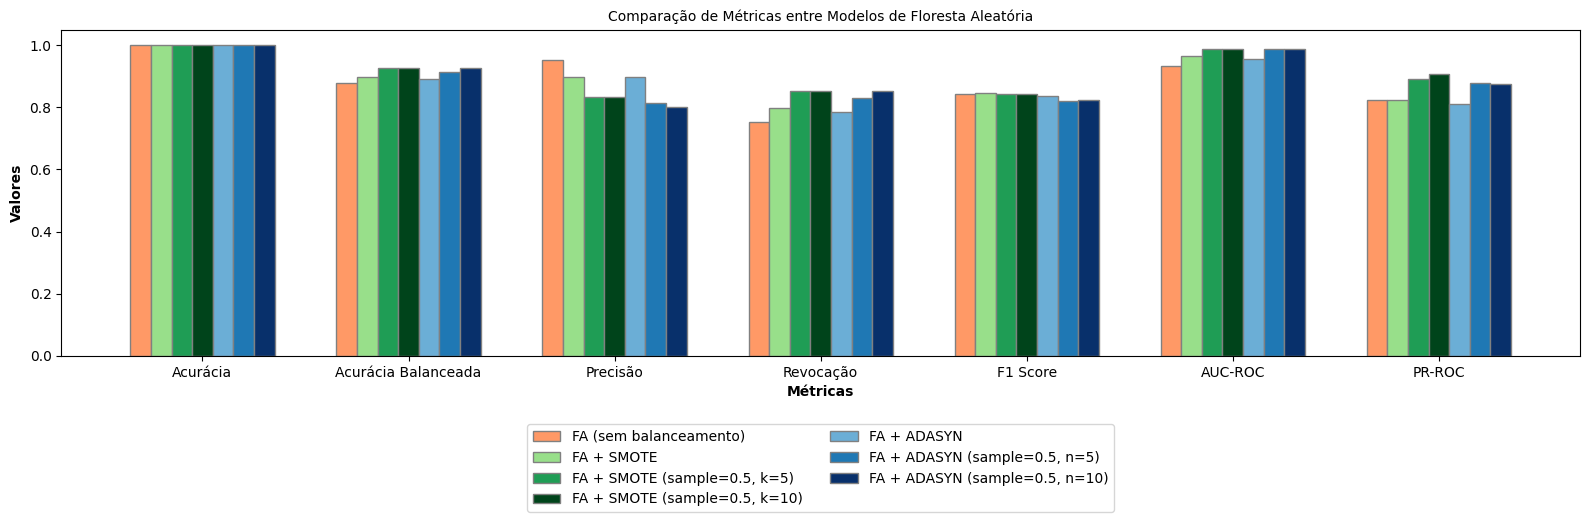

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Definir uma paleta de cores pastéis
colors = ['#ff9966', '#98df8a', '#1f9d55', '#00441b', '#6baed6', '#1f78b4', '#08306b']

# Dados das métricas para cada modelo
labels = ['Acurácia', 'Acurácia Balanceada', 'Precisão', 'Revocação', 'F1 Score', 'AUC-ROC', 'PR-ROC']

# Nomes dos modelos ajustados para Floresta Aleatória
model_names = ['FA (sem balanceamento)',
               'FA + SMOTE',
               'FA + SMOTE (sample=0.5, k=5)',
               'FA + SMOTE (sample=0.5, k=10)',
               'FA + ADASYN',
               'FA + ADASYN (sample=0.5, n=5)',
               'FA + ADASYN (sample=0.5, n=10)']

# Métricas para cada modelo (ajustado com os valores fornecidos anteriormente)
metrics = [
    [0.9996, 0.8768, 0.9528, 0.7537, 0.8417, 0.9346, 0.8228],  # Floresta Aleatória (sem balanceamento)
    [0.9995, 0.8992, 0.8992, 0.7985, 0.8458, 0.9664, 0.8242],  # Floresta Aleatória + SMOTE (auto, k=5)
    [0.9995, 0.9254, 0.8333, 0.8511, 0.8421, 0.9871, 0.8896],  # SMOTE (0.5, k=5)
    [0.9995, 0.9254, 0.8333, 0.8511, 0.8421, 0.9869, 0.9077],  # SMOTE (0.5, k=10)
    [0.9995, 0.8917, 0.8974, 0.7836, 0.8367, 0.9560, 0.8100],  # ADASYN
    [0.9994, 0.9147, 0.8125, 0.8298, 0.8211, 0.9875, 0.8785],  # ADASYN (0.5, n=5)
    [0.9994, 0.9254, 0.8000, 0.8511, 0.8247, 0.9866, 0.8766],  # ADASYN (0.5, n=10)
]

# Convertendo para um array numpy para facilitar o plotting
metrics = np.array(metrics)

# Configurando a largura das barras
barWidth = 0.1

# Configurando a posição das barras no eixo x
r1 = np.arange(len(labels))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]

# Criando o gráfico de barras
plt.figure(figsize=(16, 6))

plt.bar(r1, metrics[0], color=colors[0], width=barWidth, edgecolor='grey', label=model_names[0])
plt.bar(r2, metrics[1], color=colors[1], width=barWidth, edgecolor='grey', label=model_names[1])
plt.bar(r3, metrics[2], color=colors[2], width=barWidth, edgecolor='grey', label=model_names[2])
plt.bar(r4, metrics[3], color=colors[3], width=barWidth, edgecolor='grey', label=model_names[3])
plt.bar(r5, metrics[4], color=colors[4], width=barWidth, edgecolor='grey', label=model_names[4])
plt.bar(r6, metrics[5], color=colors[5], width=barWidth, edgecolor='grey', label=model_names[5])
plt.bar(r7, metrics[6], color=colors[6], width=barWidth, edgecolor='grey', label=model_names[6])

# Adicionando os rótulos e título
plt.xlabel('Métricas', fontweight='bold')
plt.xticks([r + 3*barWidth for r in range(len(labels))], labels)

plt.ylabel('Valores', fontweight='bold')
plt.title('Comparação de Métricas entre Modelos de Floresta Aleatória', size=10)

# Exibir a legenda abaixo do gráfico
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=2, fontsize='medium')

# Mostrar o gráfico
plt.tight_layout()
plt.show()


----------------------

----------------------

**Técnica de Balanceamento SMOTE + Floresta Aleatória Ajuste no Hiperparâmetro - Grid1**

----------------------

----------------------


Acurácia: 0.9995
Acurácia Balanceada: 0.9466
Precisão: 0.8235
Revocação: 0.8936
F1 Score: 0.8571
ROC AUC: 0.9872
PR AUC: 0.9118

Matriz de Confusão:
 [[28316     9]
 [    5    42]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28325
           1       0.82      0.89      0.86        47

    accuracy                           1.00     28372
   macro avg       0.91      0.95      0.93     28372
weighted avg       1.00      1.00      1.00     28372



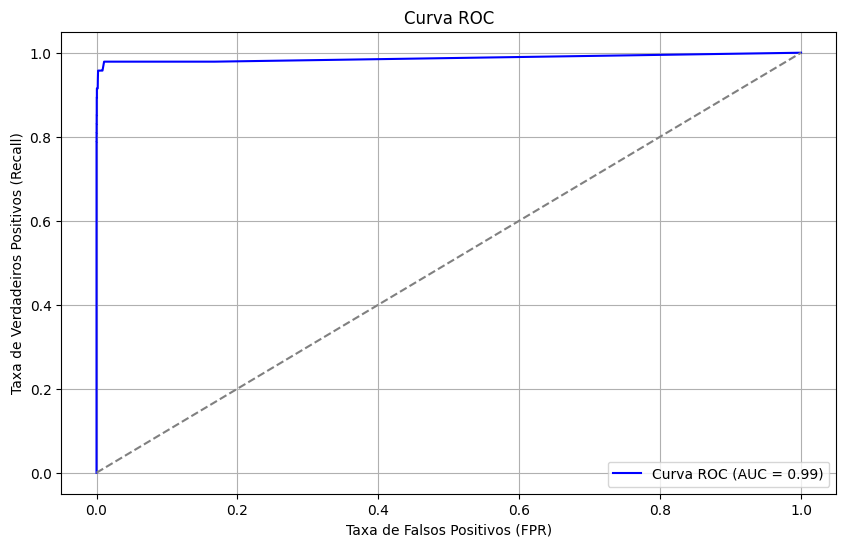

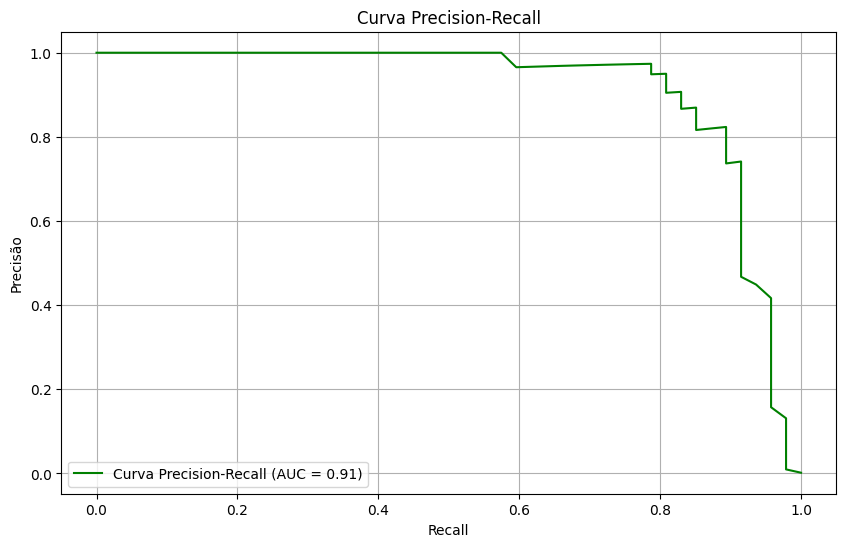

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23, sampling_strategy = 0.5, k_neighbors=10)

# Aplicar o SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados sem bootstrap
model_rf = RandomForestClassifier(random_state=23, max_depth=None, min_samples_split=2, min_samples_leaf=1, criterion='entropy', max_features='sqrt')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


----------------------

----------------------

**Técnica de Balanceamento SMOTE + Floresta Aleatória Ajuste no Hiperparâmetro - Grid2**

----------------------

----------------------

Acurácia: 0.9994
Acurácia Balanceada: 0.9466
Precisão: 0.7925
Revocação: 0.8936
F1 Score: 0.8400
ROC AUC: 0.9864
PR AUC: 0.9075

Matriz de Confusão:
 [[28314    11]
 [    5    42]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28325
           1       0.79      0.89      0.84        47

    accuracy                           1.00     28372
   macro avg       0.90      0.95      0.92     28372
weighted avg       1.00      1.00      1.00     28372



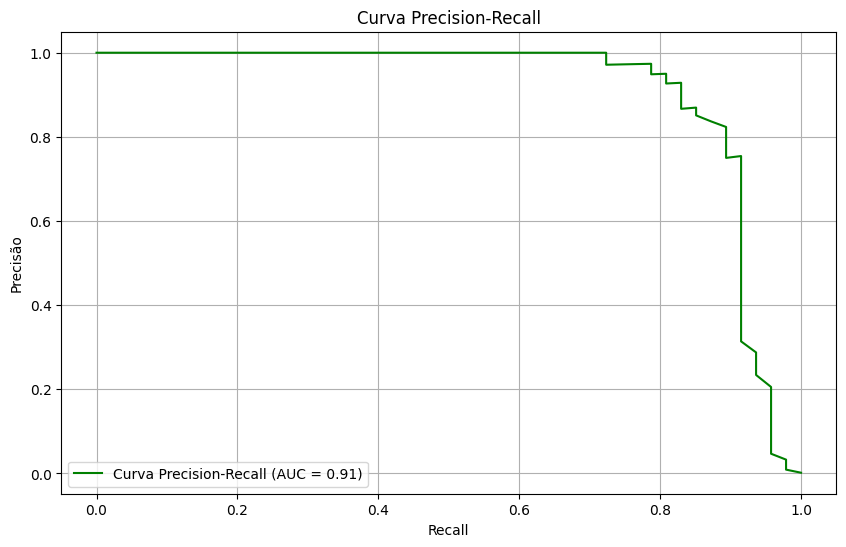

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23, sampling_strategy = 0.5, k_neighbors=10)

# Aplicar o SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados sem bootstrap
model_rf = RandomForestClassifier(random_state=23, max_depth=None, min_samples_split=2, min_samples_leaf=1, criterion='entropy', max_features='log2')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento SMOTE + Floresta Aleatória Ajuste no Hiperparâmetro - Grid3**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.8992
Precisão: 0.8917
Revocação: 0.7985
F1 Score: 0.8425
ROC AUC: 0.9620
PR AUC: 0.8399

Matriz de Confusão:
 [[84971    13]
 [   27   107]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.89      0.80      0.84       134

    accuracy                           1.00     85118
   macro avg       0.95      0.90      0.92     85118
weighted avg       1.00      1.00      1.00     85118



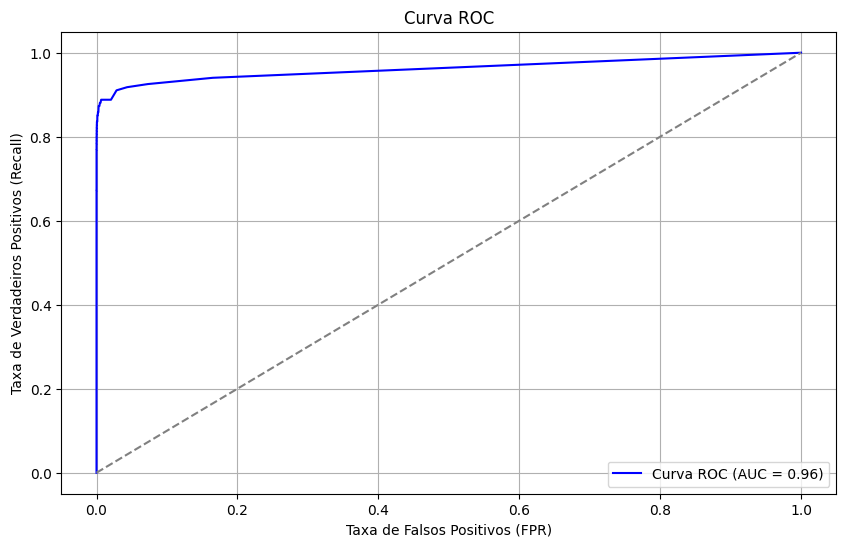

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23, sampling_strategy = 0.5, k_neighbors=10)

# Aplicar o SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados sem bootstrap
model_rf = RandomForestClassifier(random_state=23, max_depth=None, min_samples_split=2, min_samples_leaf=1, criterion='log_loss', max_features='sqrt')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


----------------------

----------------------

**Técnica de Balanceamento SMOTE + Floresta Aleatória Ajuste no Hiperparâmetro - Grid4**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.8992
Precisão: 0.8629
Revocação: 0.7985
F1 Score: 0.8295
ROC AUC: 0.9696
PR AUC: 0.8394

Matriz de Confusão:
 [[84967    17]
 [   27   107]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.86      0.80      0.83       134

    accuracy                           1.00     85118
   macro avg       0.93      0.90      0.91     85118
weighted avg       1.00      1.00      1.00     85118



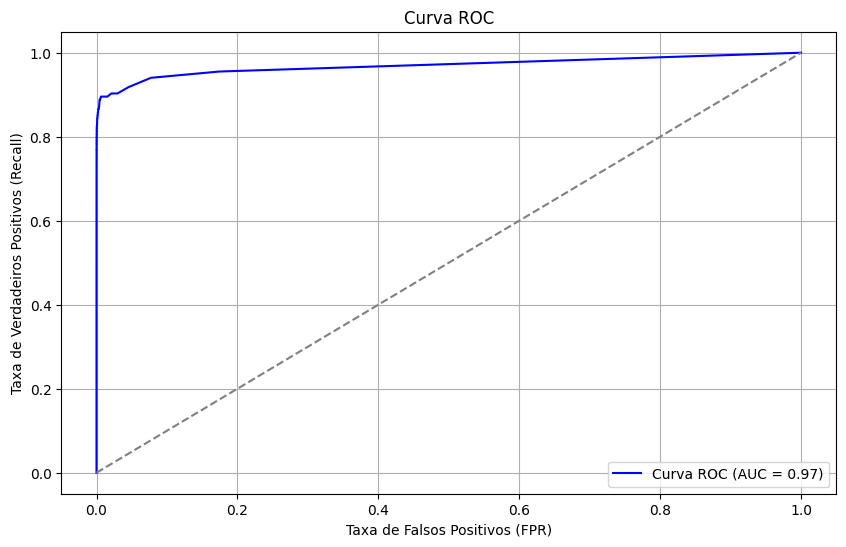

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23, sampling_strategy = 0.5, k_neighbors=10)

# Aplicar o SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados sem bootstrap
model_rf = RandomForestClassifier(random_state=23, max_depth=None, min_samples_split=2, min_samples_leaf=1, criterion='log_loss', max_features='log2')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


----------------------

----------------------

**Técnica de Balanceamento SMOTE + Floresta Aleatória Ajuste no Hiperparâmetro - Grid5**

----------------------

----------------------

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23, sampling_strategy = 0.5, k_neighbors=10)

# Aplicar o SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados sem bootstrap
model_rf = RandomForestClassifier(random_state=23, max_depth=30, min_samples_split=2, min_samples_leaf=1, criterion='entropy', max_features='sqrt')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


Acurácia: 0.9995
Acurácia Balanceada: 0.8992
Precisão: 0.8992
Revocação: 0.7985
F1 Score: 0.8458
ROC AUC: 0.9618
PR AUC: 0.8410

Matriz de Confusão:
 [[84972    12]
 [   27   107]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.90      0.80      0.85       134

    accuracy                           1.00     85118
   macro avg       0.95      0.90      0.92     85118
weighted avg       1.00      1.00      1.00     85118



----------------------

----------------------

**Técnica de Balanceamento SMOTE + Floresta Aleatória Ajuste no Hiperparâmetro - Grid6**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.8992
Precisão: 0.8699
Revocação: 0.7985
F1 Score: 0.8327
ROC AUC: 0.9726
PR AUC: 0.8381

Matriz de Confusão:
 [[84968    16]
 [   27   107]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.87      0.80      0.83       134

    accuracy                           1.00     85118
   macro avg       0.93      0.90      0.92     85118
weighted avg       1.00      1.00      1.00     85118



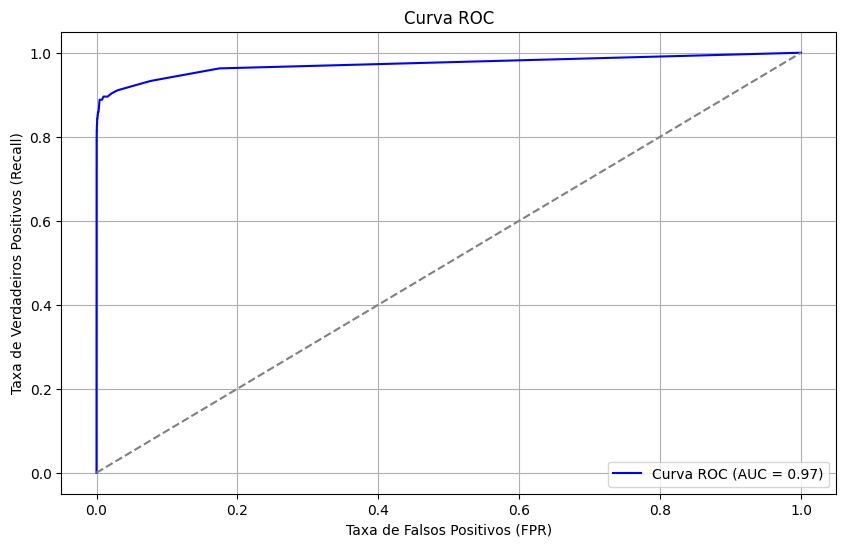

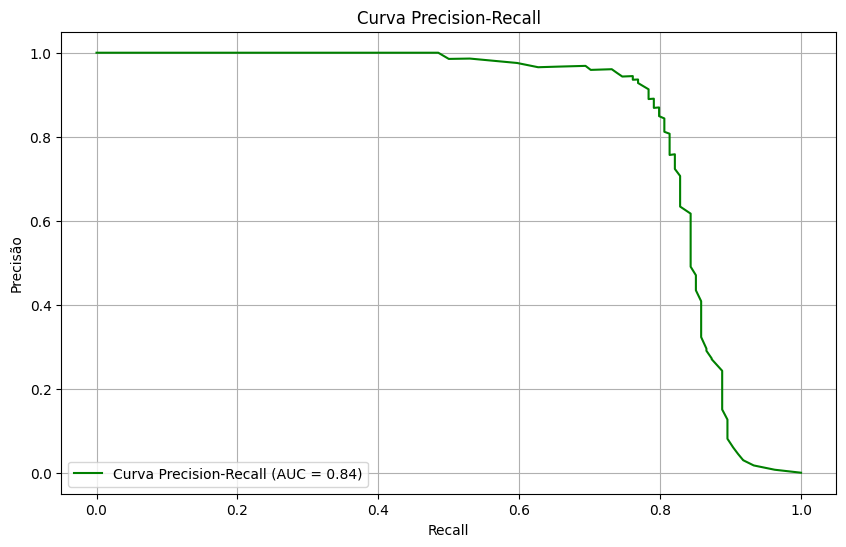

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23, sampling_strategy = 0.5, k_neighbors=10)

# Aplicar o SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados sem bootstrap
model_rf = RandomForestClassifier(random_state=23, max_depth=30, min_samples_split=2, min_samples_leaf=1, criterion='entropy', max_features='log2')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


----------------------

----------------------

**Técnica de Balanceamento SMOTE + Floresta Aleatória Ajuste no Hiperparâmetro - Grid7**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.8992
Precisão: 0.8992
Revocação: 0.7985
F1 Score: 0.8458
ROC AUC: 0.9618
PR AUC: 0.8410

Matriz de Confusão:
 [[84972    12]
 [   27   107]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.90      0.80      0.85       134

    accuracy                           1.00     85118
   macro avg       0.95      0.90      0.92     85118
weighted avg       1.00      1.00      1.00     85118



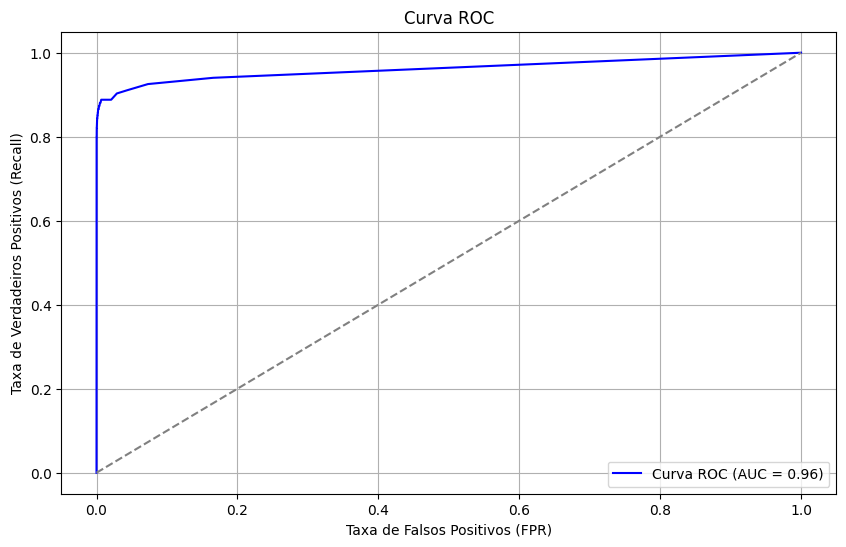

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23, sampling_strategy = 0.5, k_neighbors=10)

# Aplicar o SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados sem bootstrap
model_rf = RandomForestClassifier(random_state=23, max_depth=30, min_samples_split=2, min_samples_leaf=1, criterion='log_loss', max_features='sqrt')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento SMOTE + Floresta Aleatória Ajuste no Hiperparâmetro - Grid8**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.8992
Precisão: 0.8699
Revocação: 0.7985
F1 Score: 0.8327
ROC AUC: 0.9726
PR AUC: 0.8381

Matriz de Confusão:
 [[84968    16]
 [   27   107]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.87      0.80      0.83       134

    accuracy                           1.00     85118
   macro avg       0.93      0.90      0.92     85118
weighted avg       1.00      1.00      1.00     85118



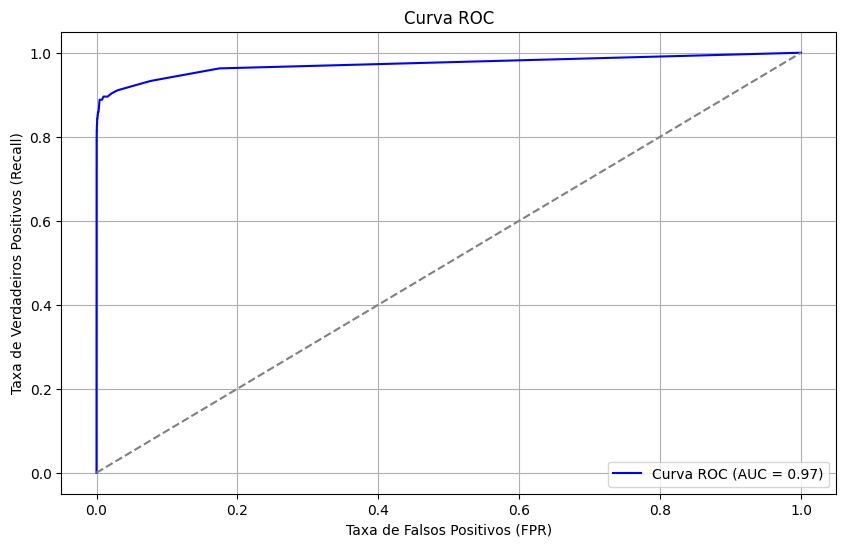

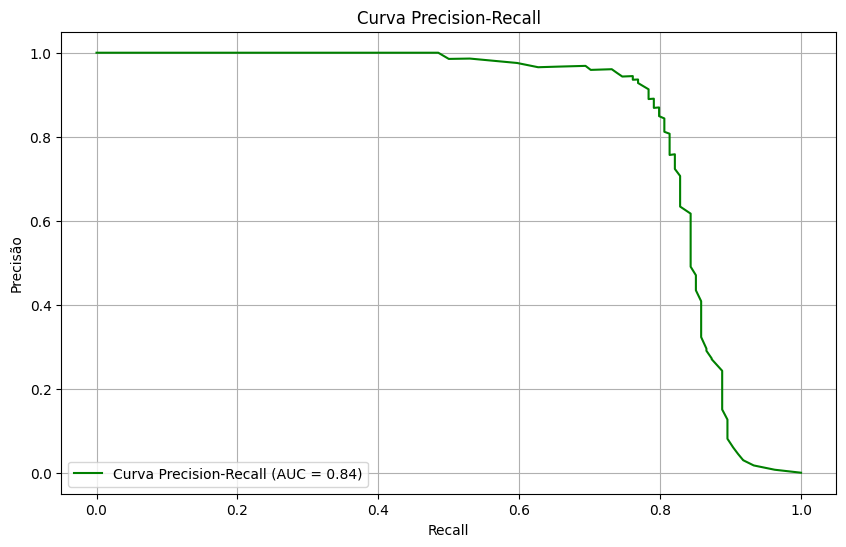

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23, sampling_strategy = 0.5, k_neighbors=10)

# Aplicar o SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados sem bootstrap
model_rf = RandomForestClassifier(random_state=23, max_depth=30, min_samples_split=2, min_samples_leaf=1, criterion='log_loss', max_features='log2')
model_rf.fit(X_resampled, y_resampled)


# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento SMOTE + Floresta Aleatória Ajuste no Hiperparâmetro - Grid9**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.8992
Precisão: 0.8629
Revocação: 0.7985
F1 Score: 0.8295
ROC AUC: 0.9699
PR AUC: 0.8225

Matriz de Confusão:
 [[84967    17]
 [   27   107]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.86      0.80      0.83       134

    accuracy                           1.00     85118
   macro avg       0.93      0.90      0.91     85118
weighted avg       1.00      1.00      1.00     85118



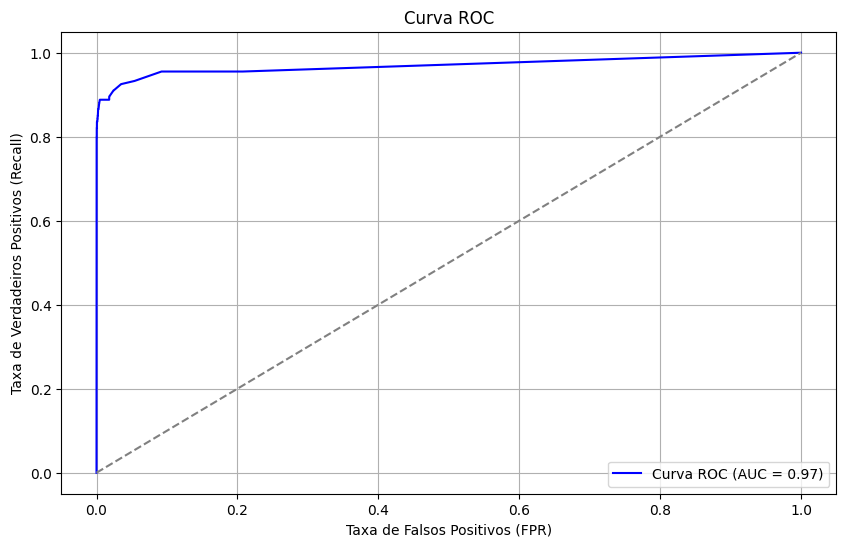

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23, sampling_strategy = 0.5, k_neighbors=10)

# Aplicar o SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados sem bootstrap
model_rf = RandomForestClassifier(random_state=23, max_depth=30, min_samples_split=2, min_samples_leaf=1, criterion='gini', max_features='sqrt')
model_rf.fit(X_resampled, y_resampled)


# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento SMOTE + Floresta Aleatória Ajuste no Hiperparâmetro - Grid10**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.8954
Precisão: 0.8833
Revocação: 0.7910
F1 Score: 0.8346
ROC AUC: 0.9828
PR AUC: 0.8321

Matriz de Confusão:
 [[84970    14]
 [   28   106]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.88      0.79      0.83       134

    accuracy                           1.00     85118
   macro avg       0.94      0.90      0.92     85118
weighted avg       1.00      1.00      1.00     85118



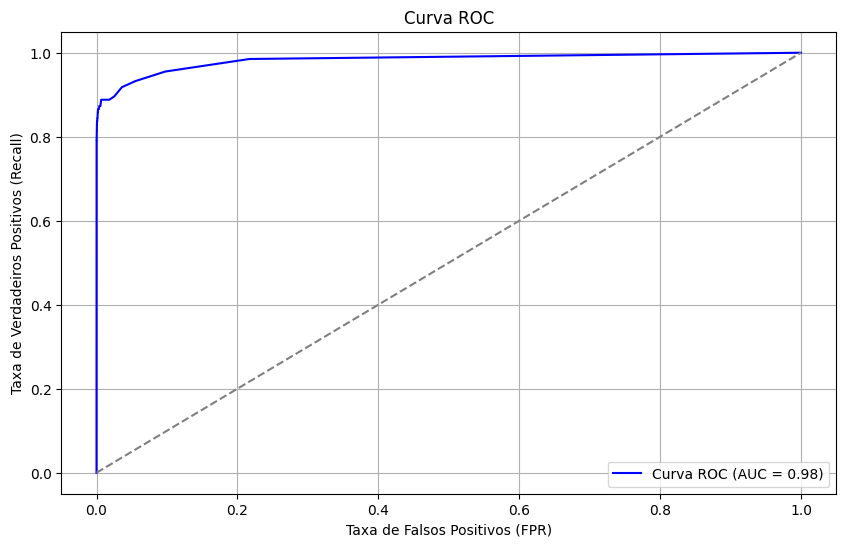

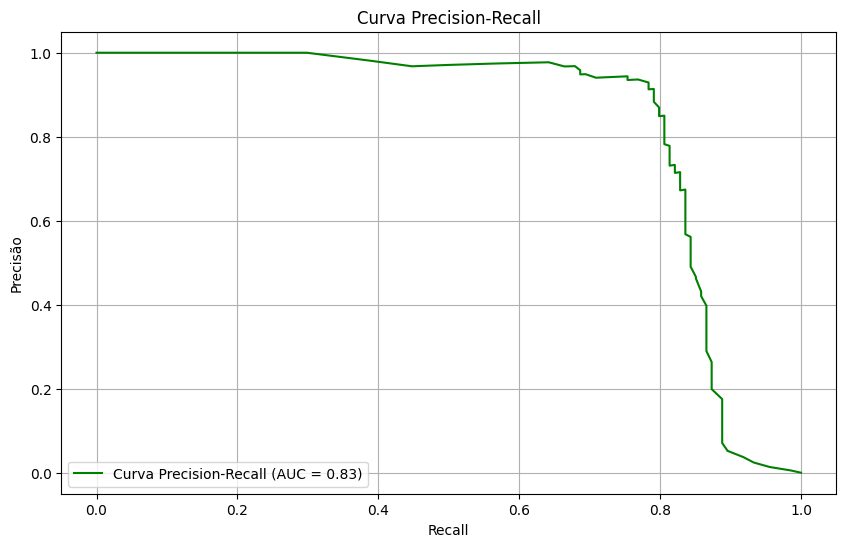

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23, sampling_strategy = 0.5, k_neighbors=10)

# Aplicar o SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados sem bootstrap
model_rf = RandomForestClassifier(random_state=23, max_depth=30, min_samples_split=2, min_samples_leaf=1, criterion='gini', max_features='log2')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento SMOTE + Floresta Aleatória Ajuste no Hiperparâmetro - Grid11**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.8954
Precisão: 0.8689
Revocação: 0.7910
F1 Score: 0.8281
ROC AUC: 0.9784
PR AUC: 0.8386

Matriz de Confusão:
 [[84968    16]
 [   28   106]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.87      0.79      0.83       134

    accuracy                           1.00     85118
   macro avg       0.93      0.90      0.91     85118
weighted avg       1.00      1.00      1.00     85118



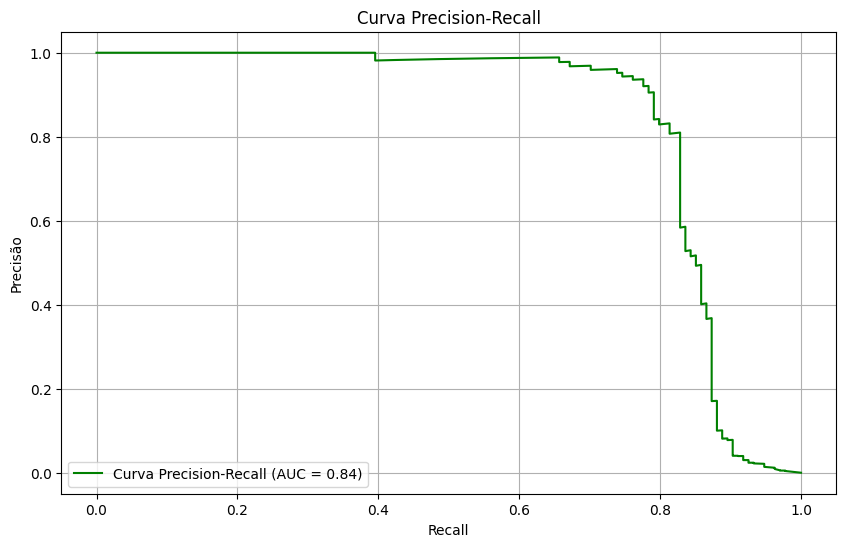

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23, sampling_strategy = 0.5, k_neighbors=10)

# Aplicar o SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados sem bootstrap
model_rf = RandomForestClassifier(random_state=23, n_estimators=200, max_depth=50, min_samples_split=5, min_samples_leaf=2, criterion='entropy',
                                  max_features='sqrt')
model_rf.fit(X_resampled, y_resampled)


# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento SMOTE + Floresta Aleatória Ajuste no Hiperparâmetro - Grid12**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.8992
Precisão: 0.8770
Revocação: 0.7985
F1 Score: 0.8359
ROC AUC: 0.9835
PR AUC: 0.8388

Matriz de Confusão:
 [[84969    15]
 [   27   107]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.88      0.80      0.84       134

    accuracy                           1.00     85118
   macro avg       0.94      0.90      0.92     85118
weighted avg       1.00      1.00      1.00     85118



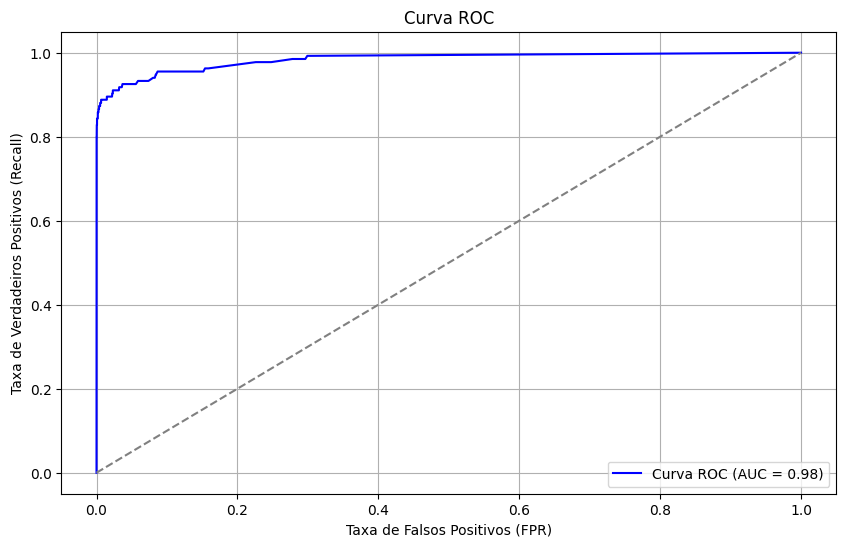

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23, sampling_strategy = 0.5, k_neighbors=10)

# Aplicar o SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados sem bootstrap
model_rf = RandomForestClassifier(random_state=23, n_estimators=200, max_depth=50, min_samples_split=5, min_samples_leaf=2, criterion='entropy',
                                  max_features='log2')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento SMOTE + Floresta Aleatória Ajuste no Hiperparâmetro - Grid13**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.8954
Precisão: 0.8689
Revocação: 0.7910
F1 Score: 0.8281
ROC AUC: 0.9784
PR AUC: 0.8386

Matriz de Confusão:
 [[84968    16]
 [   28   106]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.87      0.79      0.83       134

    accuracy                           1.00     85118
   macro avg       0.93      0.90      0.91     85118
weighted avg       1.00      1.00      1.00     85118



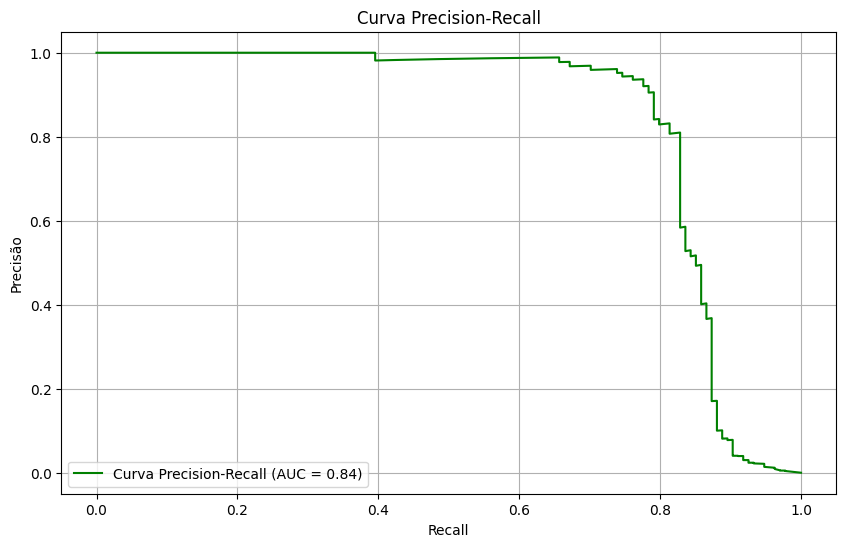

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23, sampling_strategy = 0.5, k_neighbors=10)

# Aplicar o SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados sem bootstrap
model_rf = RandomForestClassifier(random_state=23, n_estimators=200, max_depth=50, min_samples_split=5, min_samples_leaf=2, criterion='log_loss',
                                  max_features='sqrt')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento SMOTE + Floresta Aleatória Ajuste no Hiperparâmetro - Grid14**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.8992
Precisão: 0.8770
Revocação: 0.7985
F1 Score: 0.8359
ROC AUC: 0.9835
PR AUC: 0.8388

Matriz de Confusão:
 [[84969    15]
 [   27   107]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.88      0.80      0.84       134

    accuracy                           1.00     85118
   macro avg       0.94      0.90      0.92     85118
weighted avg       1.00      1.00      1.00     85118



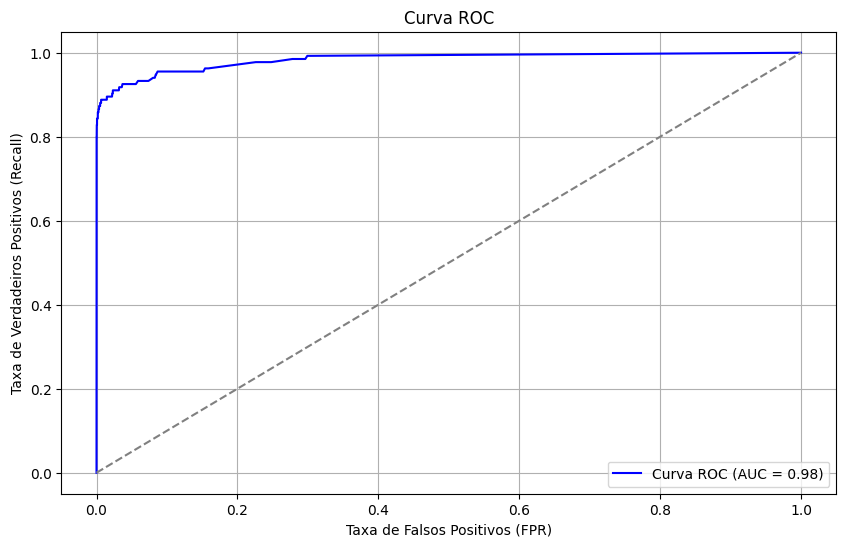

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23, sampling_strategy = 0.5, k_neighbors=10)

# Aplicar o SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados sem bootstrap
model_rf = RandomForestClassifier(random_state=23, n_estimators=200, max_depth=50, min_samples_split=5, min_samples_leaf=2, criterion='log_loss',
                                  max_features='log2')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento SMOTE + Floresta Aleatória Ajuste no Hiperparâmetro - Grid15**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.8992
Precisão: 0.8629
Revocação: 0.7985
F1 Score: 0.8295
ROC AUC: 0.9845
PR AUC: 0.8336

Matriz de Confusão:
 [[84967    17]
 [   27   107]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.86      0.80      0.83       134

    accuracy                           1.00     85118
   macro avg       0.93      0.90      0.91     85118
weighted avg       1.00      1.00      1.00     85118



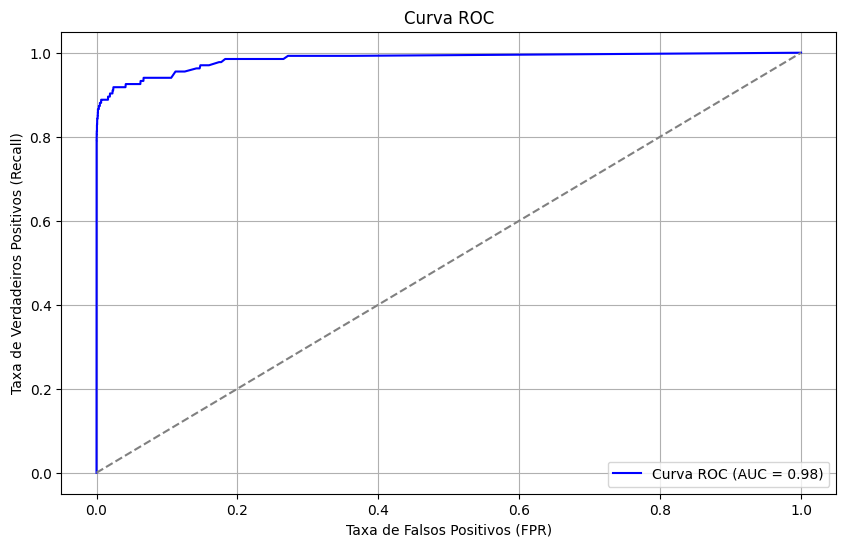

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23, sampling_strategy = 0.5, k_neighbors=10)

# Aplicar o SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados sem bootstrap
model_rf = RandomForestClassifier(random_state=23, n_estimators=200, max_depth=50, min_samples_split=5, min_samples_leaf=2, criterion='gini',
                                  max_features='sqrt')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento SMOTE + Floresta Aleatória Ajuste no Hiperparâmetro - Grid16**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.8992
Precisão: 0.8629
Revocação: 0.7985
F1 Score: 0.8295
ROC AUC: 0.9838
PR AUC: 0.8319

Matriz de Confusão:
 [[84967    17]
 [   27   107]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.86      0.80      0.83       134

    accuracy                           1.00     85118
   macro avg       0.93      0.90      0.91     85118
weighted avg       1.00      1.00      1.00     85118



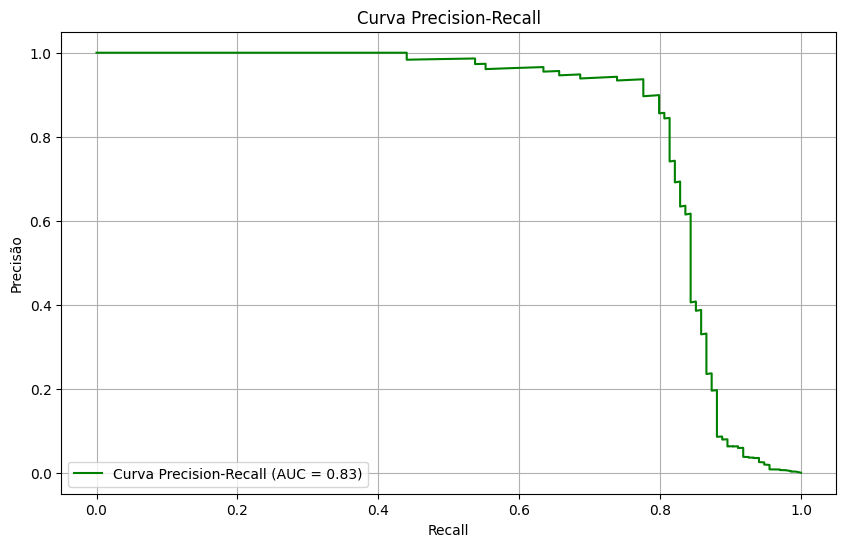

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o SMOTE
smote = SMOTE(random_state=23, sampling_strategy = 0.5, k_neighbors=10)

# Aplicar o SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados sem bootstrap
model_rf = RandomForestClassifier(random_state=23, n_estimators=200, max_depth=50, min_samples_split=5, min_samples_leaf=2, criterion='gini',
                                  max_features='log2')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento SMOTE + Floresta Aleatória Ajuste no Hiperparâmetro - Grid17**

----------------------

----------------------

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt
import numpy as np

# Definir o SMOTE
smote = SMOTE(random_state=23, sampling_strategy=0.5, k_neighbors=10)

# Aplicar o SMOTE aos dados de treino
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest com class_weight='balanced' para lidar com desbalanceamento
model_rf = RandomForestClassifier(
    n_estimators=500, max_depth=100, min_samples_split=5, min_samples_leaf=2,
    criterion='entropy', max_features='sqrt', class_weight='balanced', bootstrap=True,

)

# Validação cruzada estratificada para maior robustez
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)

# Executar a validação cruzada com a métrica de balanced_accuracy
cv_scores = cross_val_score(model_rf, X_resampled, y_resampled, cv=skf, scoring='balanced_accuracy')
print(f"Balanced Accuracy CV Score (5 folds): {np.mean(cv_scores):.4f}")

# Treinar o modelo final
model_rf.fit(X_resampled, y_resampled)

# Predição no conjunto de teste
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão normalizada
conf_matrix = confusion_matrix(y_test, y_pred, normalize='true')

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão Normalizada:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


Balanced Accuracy CV Score (5 folds): 0.9997
Acurácia: 0.9995
Acurácia Balanceada: 0.8992
Precisão: 0.8629
Revocação: 0.7985
F1 Score: 0.8295
ROC AUC: 0.9804
PR AUC: 0.8349

Matriz de Confusão Normalizada:
 [[9.99799962e-01 2.00037654e-04]
 [2.01492537e-01 7.98507463e-01]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.86      0.80      0.83       134

    accuracy                           1.00     85118
   macro avg       0.93      0.90      0.91     85118
weighted avg       1.00      1.00      1.00     85118



----------------------

----------------------

**Gráficos do SMOTE com ajustes do Hiperparâmetros do modelo Floresta Aleatória**

----------------------

----------------------

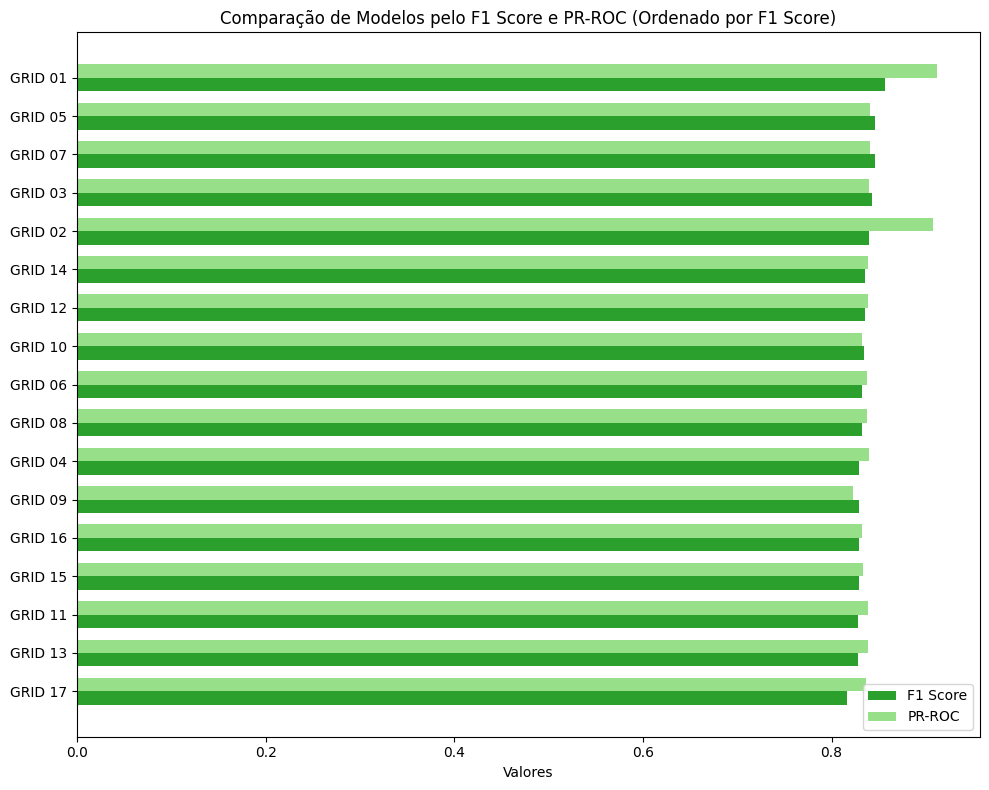

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Dados para F1 Score e PR-ROC
modelos = [
    "GRID 01", "GRID 02", "GRID 03", "GRID 04", "GRID 05", "GRID 06", "GRID 07", "GRID 08",
    "GRID 09", "GRID 10", "GRID 11", "GRID 12", "GRID 13", "GRID 14", "GRID 15", "GRID 16", "GRID 17"
]

f1_scores = [
    0.8571, 0.8400, 0.8425, 0.8295, 0.8458, 0.8327, 0.8458, 0.8327,
    0.8295, 0.8346, 0.8281, 0.8359, 0.8281, 0.8359, 0.8295, 0.8295, 0.8168
]

pr_roc = [
    0.9118, 0.9075, 0.8399, 0.8394, 0.8410, 0.8381, 0.8410, 0.8381,
    0.8225, 0.8321, 0.8386, 0.8388, 0.8386, 0.8388, 0.8336, 0.8319, 0.8361
]

# Ordenar pelos valores de F1 Score
sorted_indices = np.argsort(f1_scores)

modelos_sorted = [modelos[i] for i in sorted_indices]
f1_scores_sorted = [f1_scores[i] for i in sorted_indices]
pr_roc_sorted = [pr_roc[i] for i in sorted_indices]

# Largura da barra
bar_width = 0.35
index = np.arange(len(modelos_sorted))

# Criar gráfico de barras horizontais
fig, ax = plt.subplots(figsize=(10, 8))
bar1 = ax.barh(index, f1_scores_sorted, bar_width, label='F1 Score', color='#2ca02c')
bar2 = ax.barh(index + bar_width, pr_roc_sorted, bar_width, label='PR-ROC', color='#98df8a')

# Adicionar rótulos e título
ax.set_xlabel('Valores')
ax.set_title('Comparação de Modelos pelo F1 Score e PR-ROC (Ordenado por F1 Score)')
ax.set_yticks(index + bar_width / 2)
ax.set_yticklabels(modelos_sorted)

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()


----------------------

----------------------

**Técnica de Balanceamento ADASYN + Floresta Aleatória Ajuste no Hiperparâmetro - Grid18**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.8992
Precisão: 0.8699
Revocação: 0.7985
F1 Score: 0.8327
ROC AUC: 0.9648
PR AUC: 0.8370

Matriz de Confusão:
 [[84968    16]
 [   27   107]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.87      0.80      0.83       134

    accuracy                           1.00     85118
   macro avg       0.93      0.90      0.92     85118
weighted avg       1.00      1.00      1.00     85118



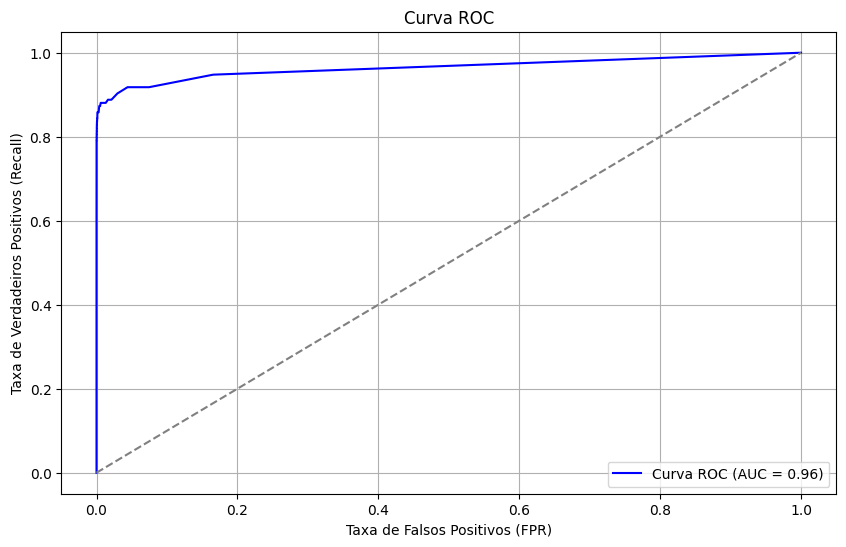

In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23, sampling_strategy = 0.5, n_neighbors=10)

# Aplicar o ADASYN aos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados
model_rf = RandomForestClassifier(random_state=23, n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, criterion='entropy',
                                  max_features='sqrt')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento ADSYN + Floresta Aleatória Ajuste no Hiperparâmetro - Grid19**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.9029
Precisão: 0.8504
Revocação: 0.8060
F1 Score: 0.8276
ROC AUC: 0.9718
PR AUC: 0.8334

Matriz de Confusão:
 [[84965    19]
 [   26   108]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.85      0.81      0.83       134

    accuracy                           1.00     85118
   macro avg       0.93      0.90      0.91     85118
weighted avg       1.00      1.00      1.00     85118



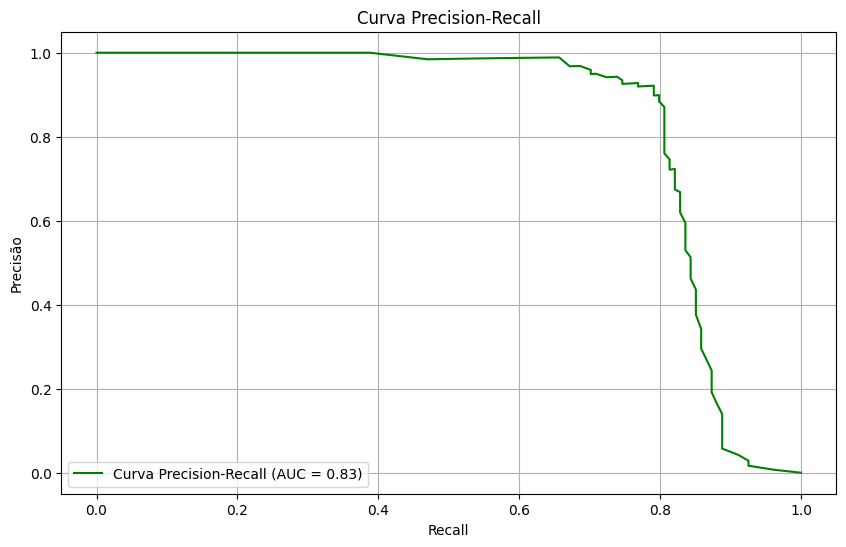

In [62]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23, sampling_strategy = 0.5, n_neighbors=10)

# Aplicar o ADASYN aos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados
model_rf = RandomForestClassifier(random_state=23, n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, criterion='entropy',
                                  max_features='log2')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento ADSYN + Floresta Aleatória Ajuste no Hiperparâmetro - Grid20**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.8992
Precisão: 0.8699
Revocação: 0.7985
F1 Score: 0.8327
ROC AUC: 0.9648
PR AUC: 0.8370

Matriz de Confusão:
 [[84968    16]
 [   27   107]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.87      0.80      0.83       134

    accuracy                           1.00     85118
   macro avg       0.93      0.90      0.92     85118
weighted avg       1.00      1.00      1.00     85118



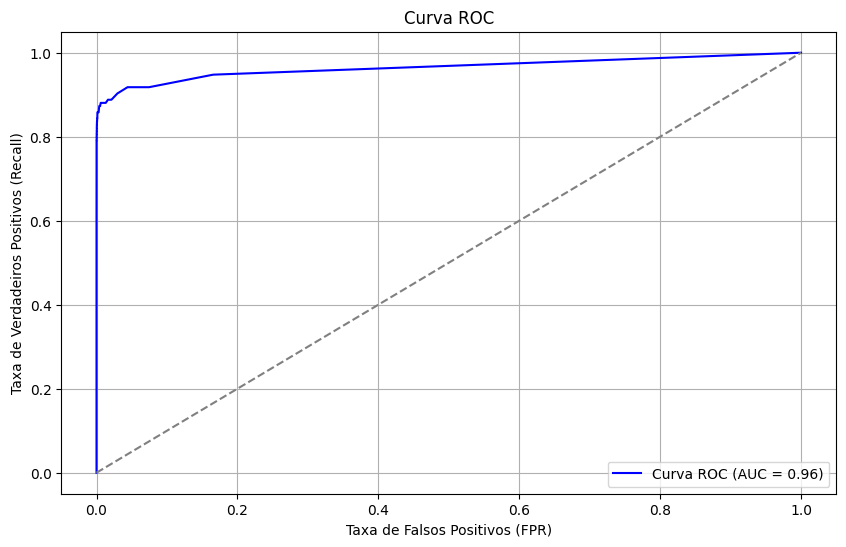

In [60]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23, sampling_strategy = 0.5, n_neighbors=10)

# Aplicar o ADASYN aos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados
model_rf = RandomForestClassifier(random_state=23, n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, criterion='log_loss',
                                  max_features='sqrt')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento ADSYN + Floresta Aleatória Ajuste no Hiperparâmetro - Grid21**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.9029
Precisão: 0.8504
Revocação: 0.8060
F1 Score: 0.8276
ROC AUC: 0.9718
PR AUC: 0.8334

Matriz de Confusão:
 [[84965    19]
 [   26   108]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.85      0.81      0.83       134

    accuracy                           1.00     85118
   macro avg       0.93      0.90      0.91     85118
weighted avg       1.00      1.00      1.00     85118



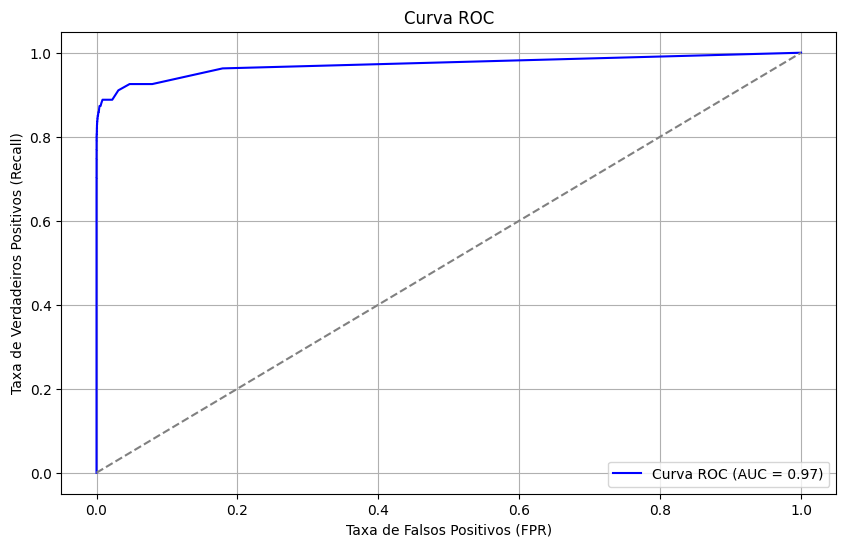

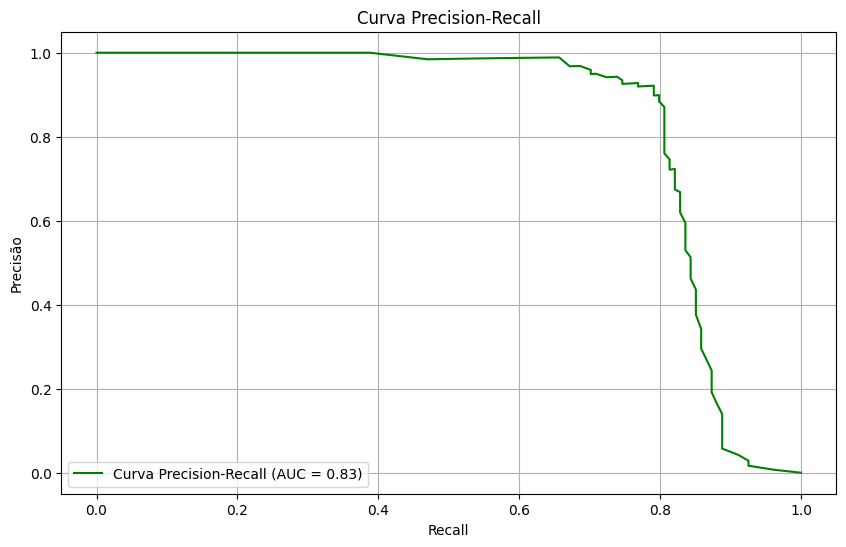

In [61]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23, sampling_strategy = 0.5, n_neighbors=10)

# Aplicar o ADASYN aos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados
model_rf = RandomForestClassifier(random_state=23, n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, criterion='log_loss',
                                  max_features='log2')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento ADSYN + Floresta Aleatória Ajuste no Hiperparâmetro - Grid22**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.9029
Precisão: 0.8640
Revocação: 0.8060
F1 Score: 0.8340
ROC AUC: 0.9651
PR AUC: 0.8350

Matriz de Confusão:
 [[84967    17]
 [   26   108]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.86      0.81      0.83       134

    accuracy                           1.00     85118
   macro avg       0.93      0.90      0.92     85118
weighted avg       1.00      1.00      1.00     85118



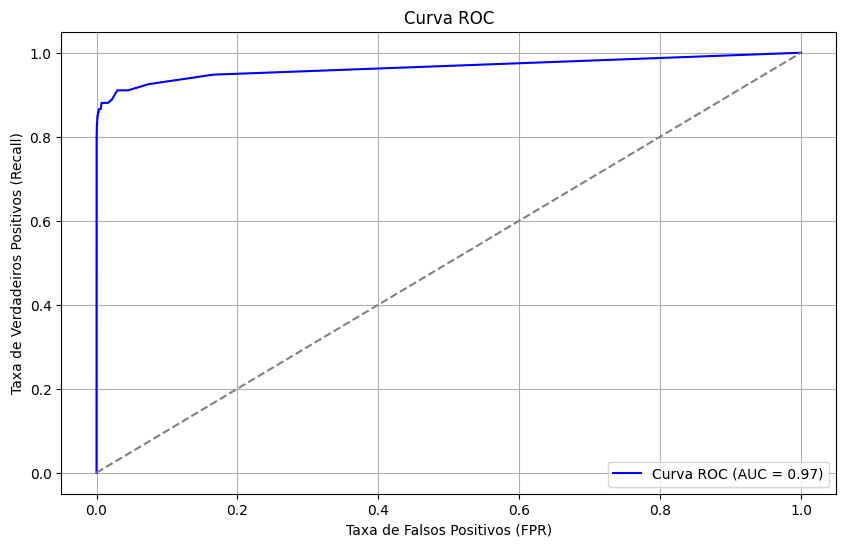

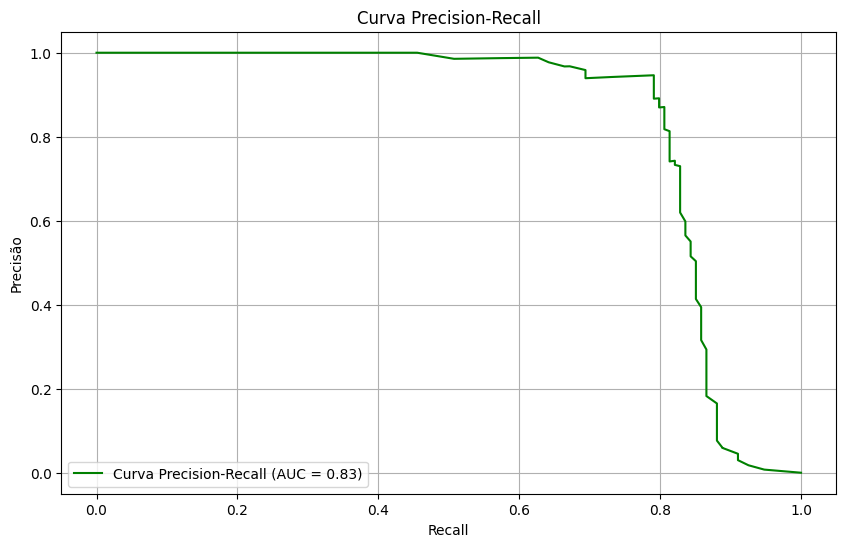

In [65]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23, sampling_strategy = 0.5, n_neighbors=10)

# Aplicar o ADASYN aos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados
model_rf = RandomForestClassifier(random_state=23, n_estimators=100, max_depth=30, min_samples_split=2, min_samples_leaf=1, criterion='entropy',
                                  max_features='sqrt')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento ADSYN + Floresta Aleatória Ajuste no Hiperparâmetro - Grid23**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.9029
Precisão: 0.8438
Revocação: 0.8060
F1 Score: 0.8244
ROC AUC: 0.9687
PR AUC: 0.8312

Matriz de Confusão:
 [[84964    20]
 [   26   108]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.84      0.81      0.82       134

    accuracy                           1.00     85118
   macro avg       0.92      0.90      0.91     85118
weighted avg       1.00      1.00      1.00     85118



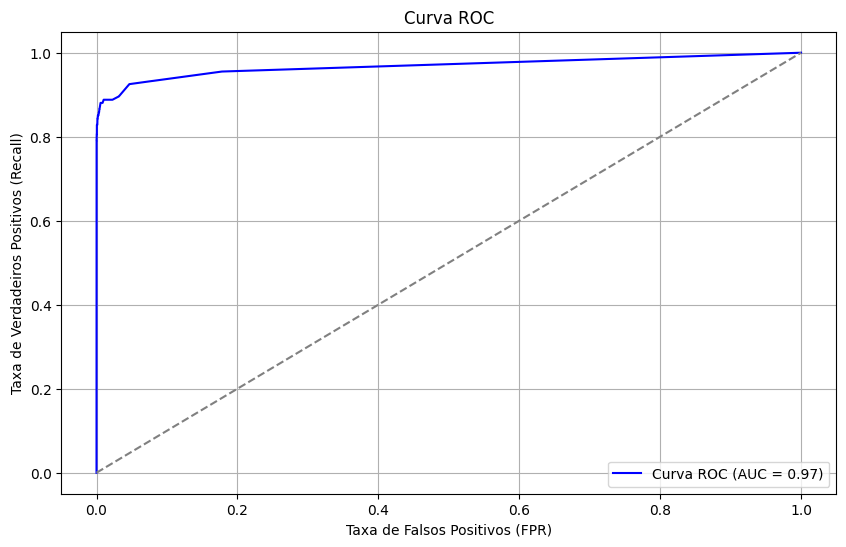

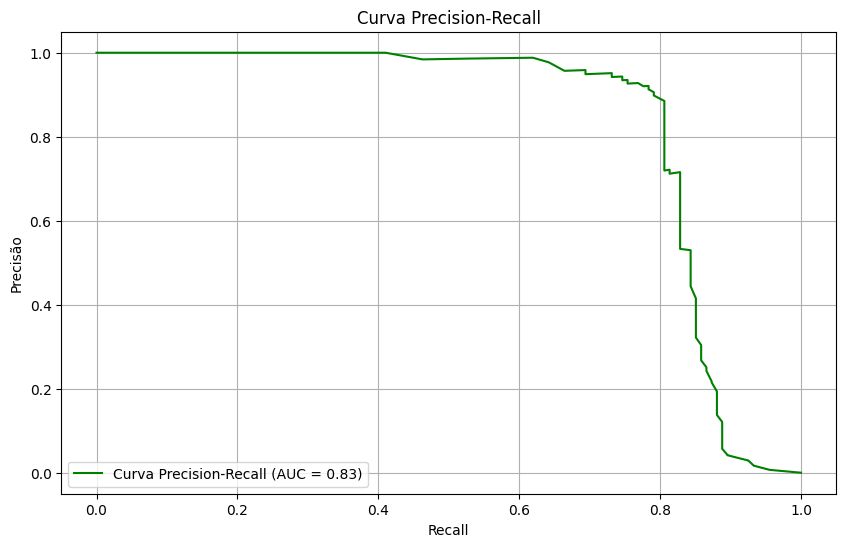

In [64]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23, sampling_strategy = 0.5, n_neighbors=10)

# Aplicar o ADASYN aos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados
model_rf = RandomForestClassifier(random_state=23, n_estimators=100, max_depth=30, min_samples_split=2, min_samples_leaf=1, criterion='entropy',
                                  max_features='log2')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento ADSYN + Floresta Aleatória Ajuste no Hiperparâmetro - Grid24**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.9029
Precisão: 0.8640
Revocação: 0.8060
F1 Score: 0.8340
ROC AUC: 0.9651
PR AUC: 0.8350

Matriz de Confusão:
 [[84967    17]
 [   26   108]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.86      0.81      0.83       134

    accuracy                           1.00     85118
   macro avg       0.93      0.90      0.92     85118
weighted avg       1.00      1.00      1.00     85118



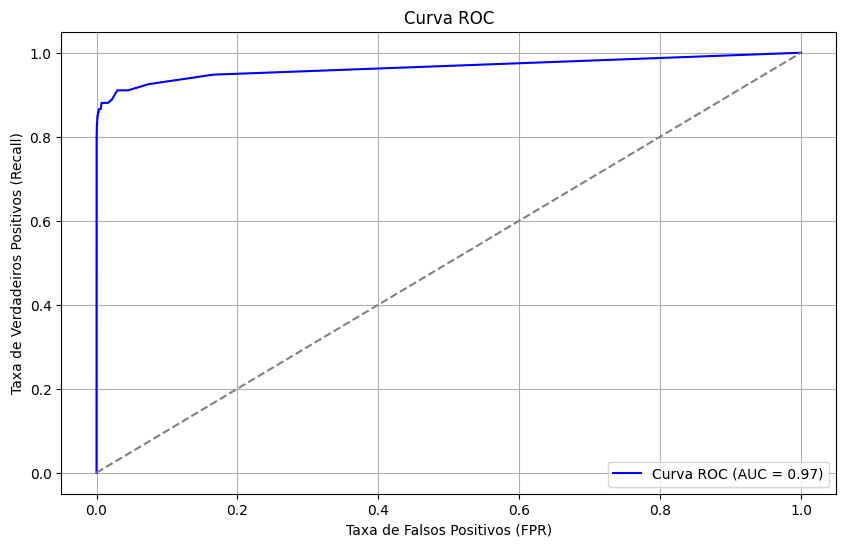

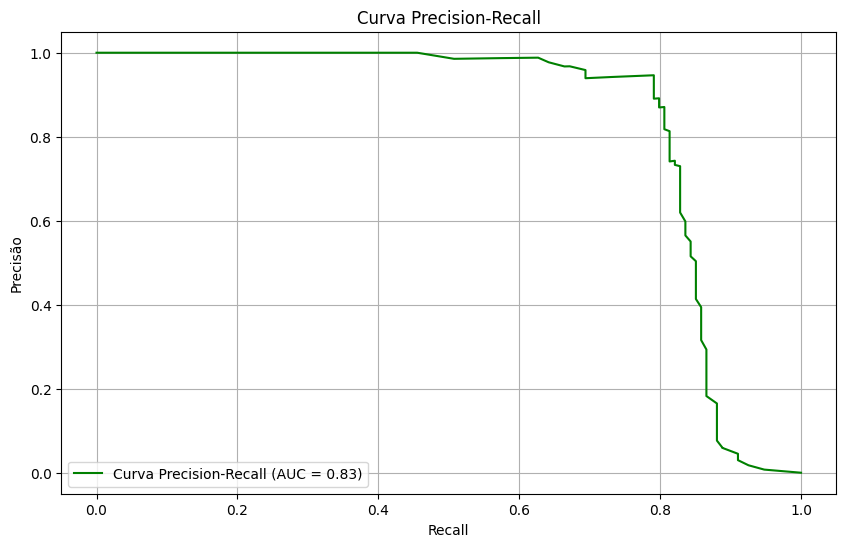

In [66]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23, sampling_strategy = 0.5, n_neighbors=10)

# Aplicar o ADASYN aos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados
model_rf = RandomForestClassifier(random_state=23, n_estimators=100, max_depth=30, min_samples_split=2, min_samples_leaf=1, criterion='log_loss',
                                  max_features='sqrt')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento ADSYN + Floresta Aleatória Ajuste no Hiperparâmetro - Grid25**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.9029
Precisão: 0.8438
Revocação: 0.8060
F1 Score: 0.8244
ROC AUC: 0.9687
PR AUC: 0.8312

Matriz de Confusão:
 [[84964    20]
 [   26   108]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.84      0.81      0.82       134

    accuracy                           1.00     85118
   macro avg       0.92      0.90      0.91     85118
weighted avg       1.00      1.00      1.00     85118



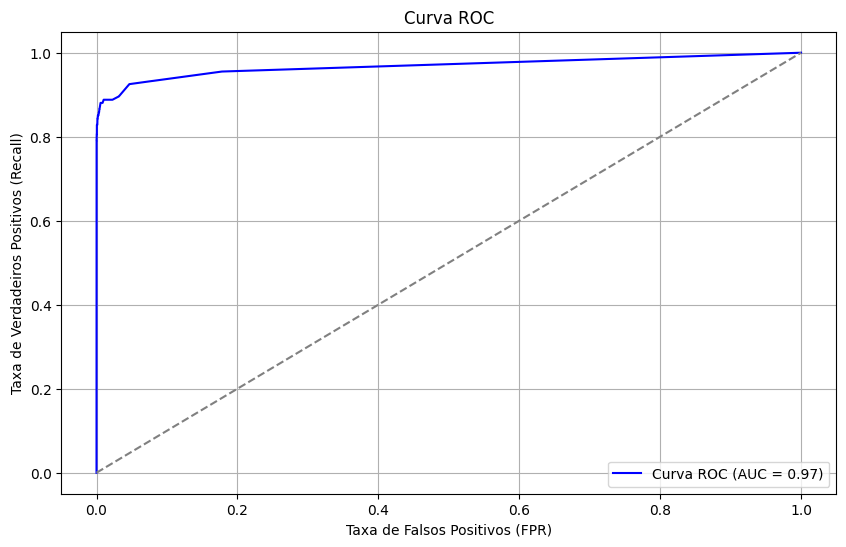

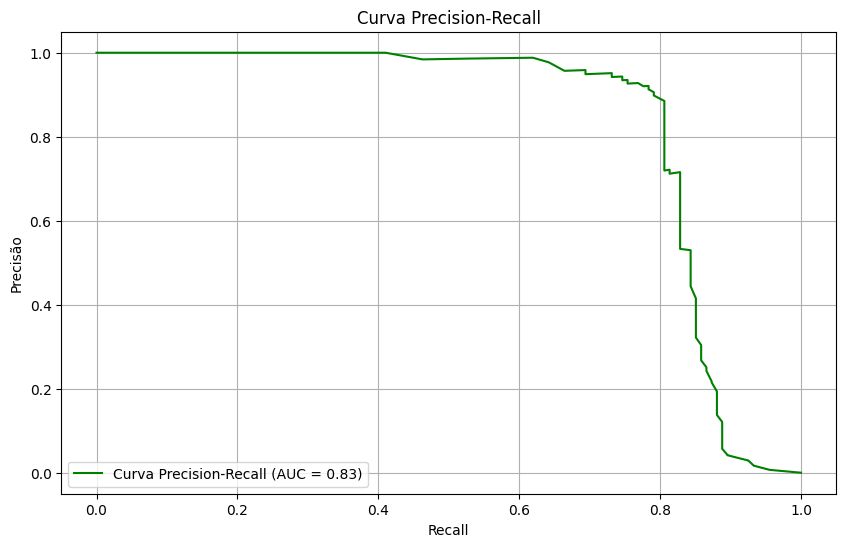

In [67]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23, sampling_strategy = 0.5, n_neighbors=10)

# Aplicar o ADASYN aos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados
model_rf = RandomForestClassifier(random_state=23, n_estimators=100, max_depth=30, min_samples_split=2, min_samples_leaf=1, criterion='log_loss',
                                  max_features='log2')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento ADSYN + Floresta Aleatória Ajuste no Hiperparâmetro - Grid26**

----------------------

----------------------

Acurácia: 0.9994
Acurácia Balanceada: 0.8991
Precisão: 0.8168
Revocação: 0.7985
F1 Score: 0.8075
ROC AUC: 0.9686
PR AUC: 0.8229

Matriz de Confusão:
 [[84960    24]
 [   27   107]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.82      0.80      0.81       134

    accuracy                           1.00     85118
   macro avg       0.91      0.90      0.90     85118
weighted avg       1.00      1.00      1.00     85118



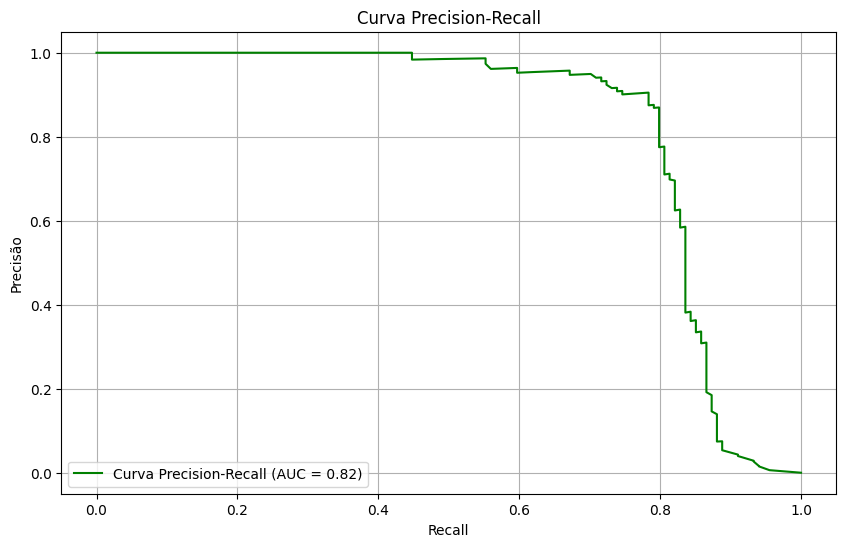

In [68]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23, sampling_strategy = 0.5, n_neighbors=10)

# Aplicar o ADASYN aos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados
model_rf = RandomForestClassifier(random_state=23, n_estimators=100, max_depth=30, min_samples_split=2, min_samples_leaf=1, criterion='gini',
                                  max_features='sqrt')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento ADSYN + Floresta Aleatória Ajuste no Hiperparâmetro - Grid27**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.9029
Precisão: 0.8571
Revocação: 0.8060
F1 Score: 0.8308
ROC AUC: 0.9754
PR AUC: 0.8282

Matriz de Confusão:
 [[84966    18]
 [   26   108]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.86      0.81      0.83       134

    accuracy                           1.00     85118
   macro avg       0.93      0.90      0.92     85118
weighted avg       1.00      1.00      1.00     85118



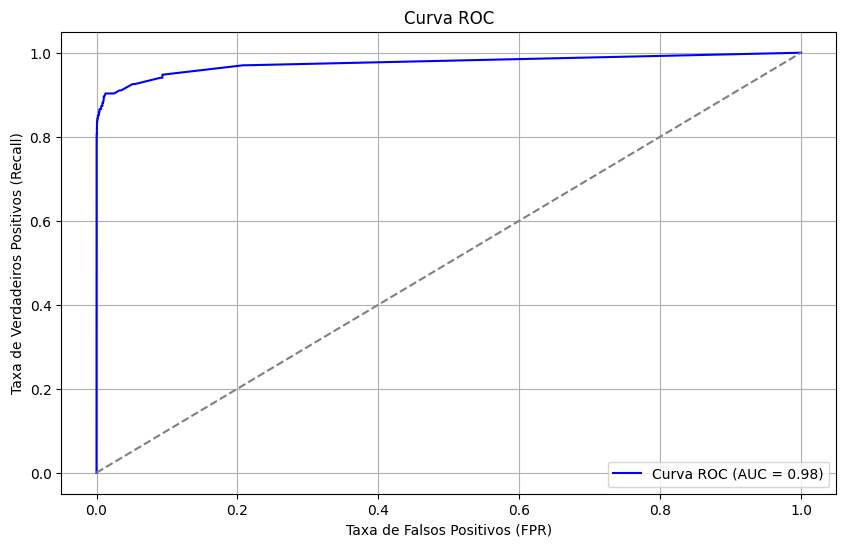

In [69]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23, sampling_strategy = 0.5, n_neighbors=10)

# Aplicar o ADASYN aos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados
model_rf = RandomForestClassifier(random_state=23, n_estimators=100, max_depth=30, min_samples_split=2, min_samples_leaf=1, criterion='gini',
                                  max_features='log2')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento ADSYN + Floresta Aleatória Ajuste no Hiperparâmetro - Grid28**

----------------------

----------------------

In [70]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23, sampling_strategy = 0.5, n_neighbors=10)

# Aplicar o ADASYN aos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados
model_rf = RandomForestClassifier(random_state=23, n_estimators=200, max_depth=50, min_samples_split=5, min_samples_leaf=2, criterion='entropy',
                                  max_features='sqrt')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

Acurácia: 0.9995
Acurácia Balanceada: 0.9029
Precisão: 0.8571
Revocação: 0.8060
F1 Score: 0.8308
ROC AUC: 0.9772
PR AUC: 0.8356

Matriz de Confusão:
 [[84966    18]
 [   26   108]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.86      0.81      0.83       134

    accuracy                           1.00     85118
   macro avg       0.93      0.90      0.92     85118
weighted avg       1.00      1.00      1.00     85118



----------------------

----------------------

**Técnica de Balanceamento ADSYN + Floresta Aleatória Ajuste no Hiperparâmetro - Grid29**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.9029
Precisão: 0.8438
Revocação: 0.8060
F1 Score: 0.8244
ROC AUC: 0.9723
PR AUC: 0.8357

Matriz de Confusão:
 [[84964    20]
 [   26   108]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.84      0.81      0.82       134

    accuracy                           1.00     85118
   macro avg       0.92      0.90      0.91     85118
weighted avg       1.00      1.00      1.00     85118



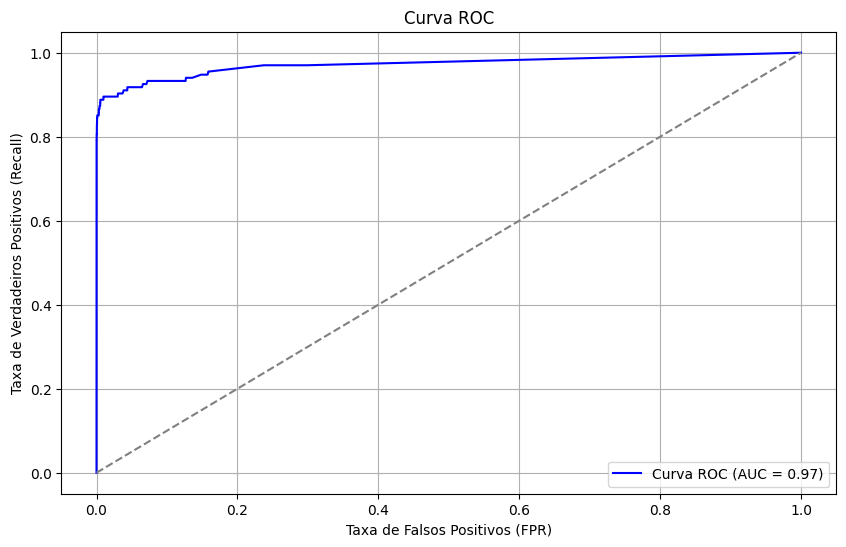

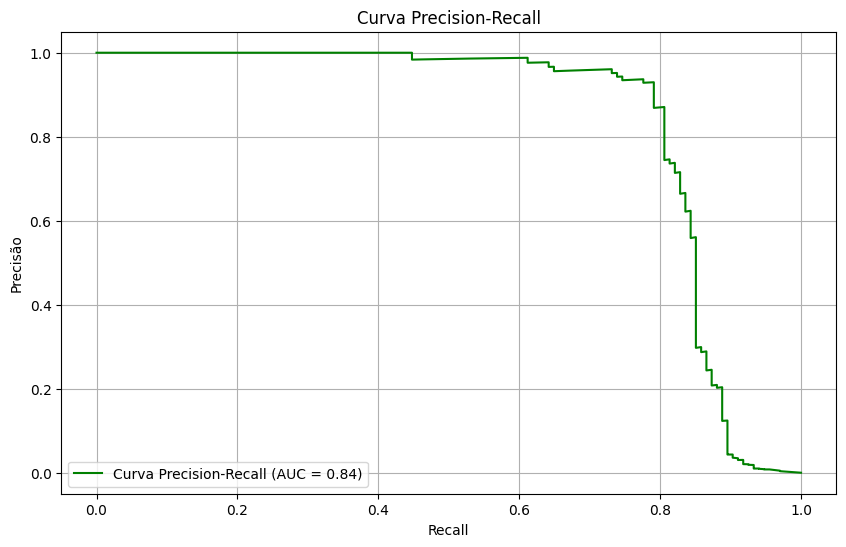

In [71]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23, sampling_strategy = 0.5, n_neighbors=10)

# Aplicar o ADASYN aos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados
model_rf = RandomForestClassifier(random_state=23, n_estimators=200, max_depth=50, min_samples_split=5, min_samples_leaf=2, criterion='entropy',
                                  max_features='log2')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento ADSYN + Floresta Aleatória Ajuste no Hiperparâmetro - Grid30**

----------------------

----------------------

In [7]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23, sampling_strategy = 0.5, n_neighbors=10)

# Aplicar o ADASYN aos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados
model_rf = RandomForestClassifier(random_state=23, n_estimators=200, max_depth=50, min_samples_split=5, min_samples_leaf=2, criterion='log_loss',
                                  max_features='sqrt')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

Acurácia: 0.9995
Acurácia Balanceada: 0.9029
Precisão: 0.8571
Revocação: 0.8060
F1 Score: 0.8308
ROC AUC: 0.9772
PR AUC: 0.8356

Matriz de Confusão:
 [[84966    18]
 [   26   108]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.86      0.81      0.83       134

    accuracy                           1.00     85118
   macro avg       0.93      0.90      0.92     85118
weighted avg       1.00      1.00      1.00     85118



----------------------

----------------------

**Técnica de Balanceamento ADSYN + Floresta Aleatória Ajuste no Hiperparâmetro - Grid31**

----------------------

----------------------

Acurácia: 0.9995
Acurácia Balanceada: 0.9029
Precisão: 0.8438
Revocação: 0.8060
F1 Score: 0.8244
ROC AUC: 0.9723
PR AUC: 0.8357

Matriz de Confusão:
 [[84964    20]
 [   26   108]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.84      0.81      0.82       134

    accuracy                           1.00     85118
   macro avg       0.92      0.90      0.91     85118
weighted avg       1.00      1.00      1.00     85118



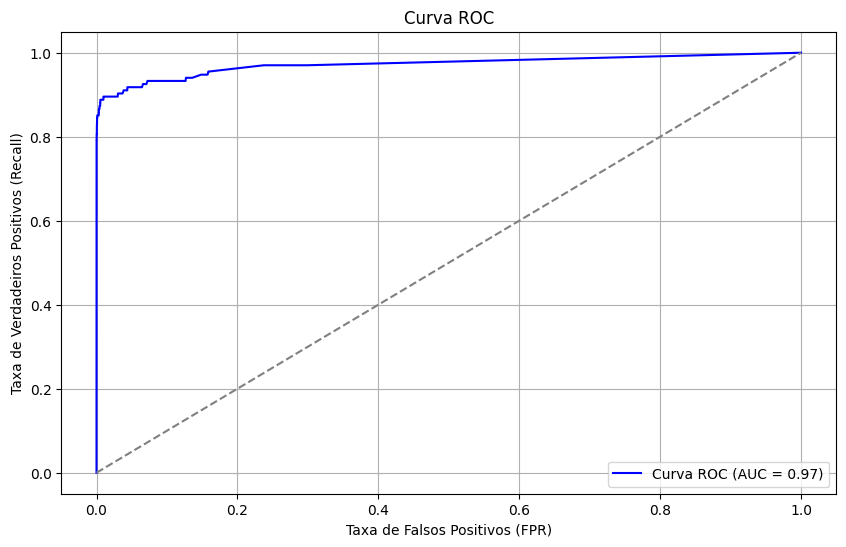

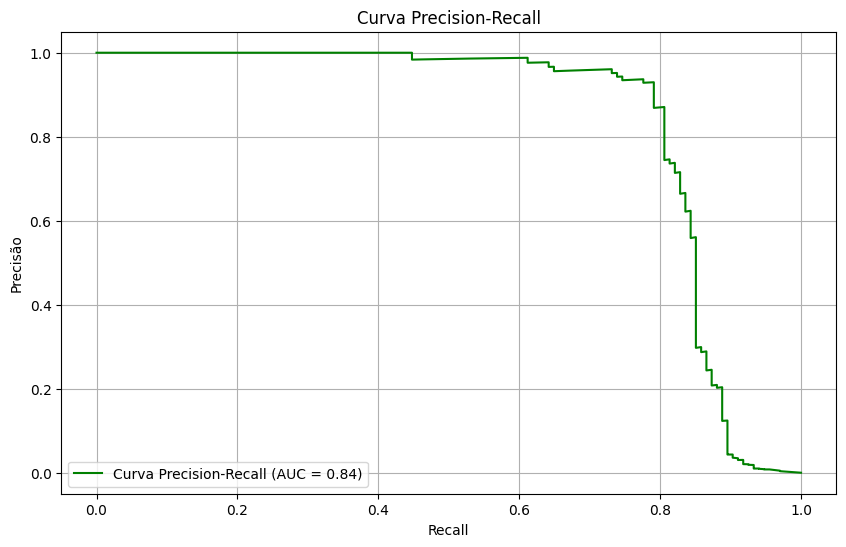

In [9]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23, sampling_strategy = 0.5, n_neighbors=10)

# Aplicar o ADASYN aos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados
model_rf = RandomForestClassifier(random_state=23, n_estimators=200, max_depth=50, min_samples_split=5, min_samples_leaf=2, criterion='log_loss',
                                  max_features='log2')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento ADSYN + Floresta Aleatória Ajuste no Hiperparâmetro - Grid32**

----------------------

----------------------

Acurácia: 0.9994
Acurácia Balanceada: 0.8991
Precisão: 0.8425
Revocação: 0.7985
F1 Score: 0.8199
ROC AUC: 0.9851
PR AUC: 0.8291

Matriz de Confusão:
 [[84964    20]
 [   27   107]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.84      0.80      0.82       134

    accuracy                           1.00     85118
   macro avg       0.92      0.90      0.91     85118
weighted avg       1.00      1.00      1.00     85118



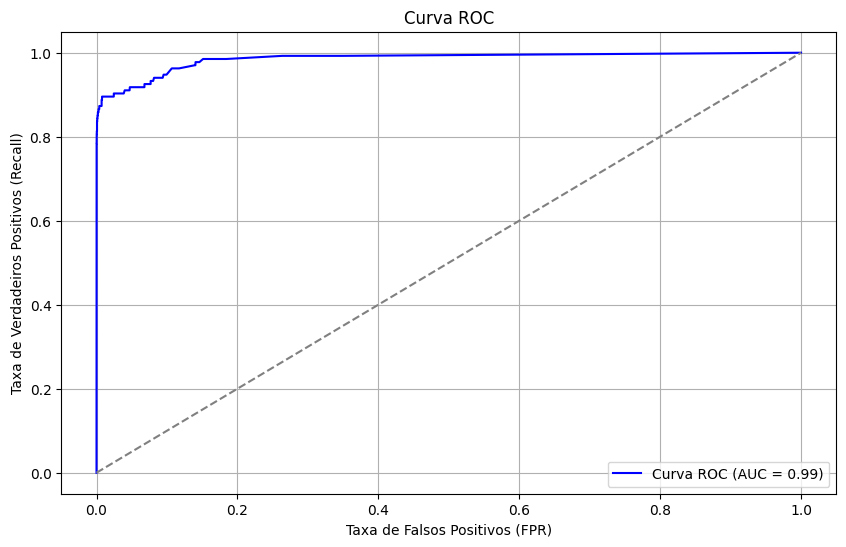

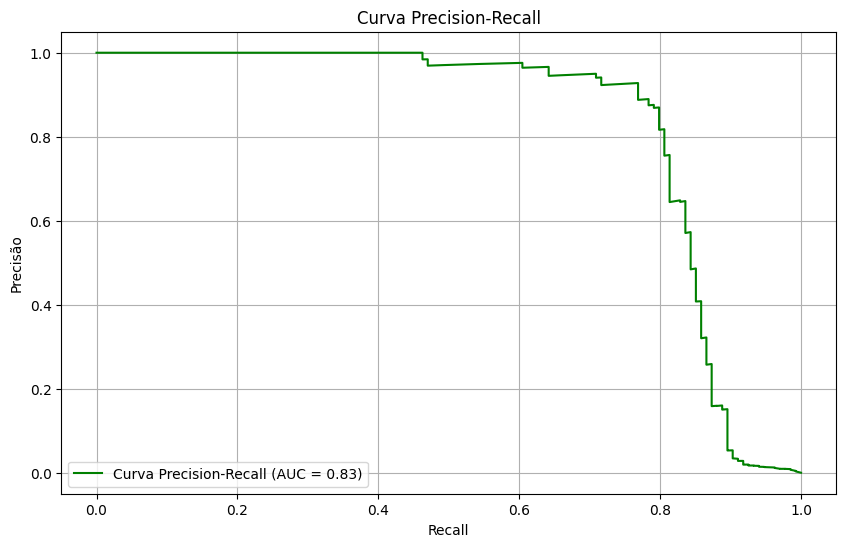

In [10]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23, sampling_strategy = 0.5, n_neighbors=10)

# Aplicar o ADASYN aos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados
model_rf = RandomForestClassifier(random_state=23, n_estimators=200, max_depth=50, min_samples_split=5, min_samples_leaf=2, criterion='gini',
                                  max_features='sqrt')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento ADSYN + Floresta Aleatória Ajuste no Hiperparâmetro - Grid33**

----------------------

----------------------

Acurácia: 0.9994
Acurácia Balanceada: 0.9029
Precisão: 0.8372
Revocação: 0.8060
F1 Score: 0.8213
ROC AUC: 0.9828
PR AUC: 0.8293

Matriz de Confusão:
 [[84963    21]
 [   26   108]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.84      0.81      0.82       134

    accuracy                           1.00     85118
   macro avg       0.92      0.90      0.91     85118
weighted avg       1.00      1.00      1.00     85118



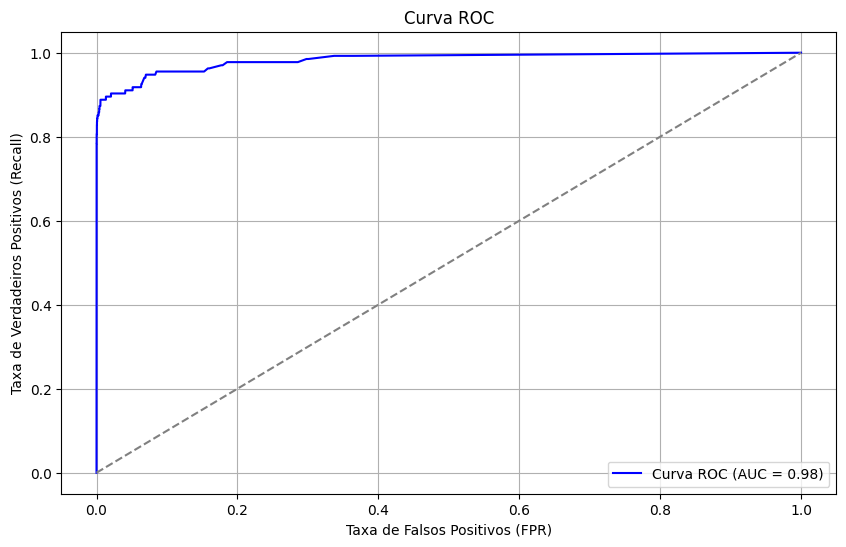

In [11]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

# Definir o ADASYN
adasyn = ADASYN(random_state=23, sampling_strategy = 0.5, n_neighbors=10)

# Aplicar o ADASYN aos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest nos dados reamostrados
model_rf = RandomForestClassifier(random_state=23, n_estimators=200, max_depth=50, min_samples_split=5, min_samples_leaf=2, criterion='gini',
                                  max_features='log2')
model_rf.fit(X_resampled, y_resampled)

# Preditos
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento ADSYN + Floresta Aleatória Ajuste no Hiperparâmetro - Grid34**

----------------------

----------------------

Balanced Accuracy CV Score (5 folds): 0.9998
Acurácia: 0.9995
Acurácia Balanceada: 0.9029
Precisão: 0.8504
Revocação: 0.8060
F1 Score: 0.8276
ROC AUC: 0.9835
PR AUC: 0.8350

Matriz de Confusão Normalizada:
 [[9.99776429e-01 2.23571496e-04]
 [1.94029851e-01 8.05970149e-01]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.85      0.81      0.83       134

    accuracy                           1.00     85118
   macro avg       0.93      0.90      0.91     85118
weighted avg       1.00      1.00      1.00     85118



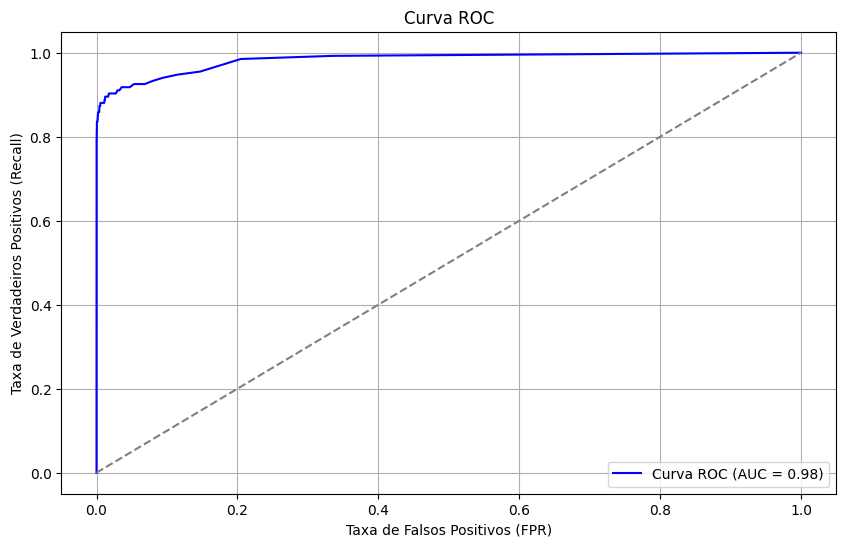

In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt
import numpy as np

# Definir o ADASYN
adasyn = ADASYN(random_state=23, sampling_strategy = 0.5, n_neighbors=10)

# Aplicar o ADASYN aos dados de treino
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Ajustar o modelo de Random Forest com class_weight='balanced' para lidar com desbalanceamento
model_rf = RandomForestClassifier(
    n_estimators=500, max_depth=100, min_samples_split=2, min_samples_leaf=1,
    criterion='entropy', max_features='sqrt', class_weight='balanced', bootstrap=True,

)

# Validação cruzada estratificada para maior robustez
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)

# Executar a validação cruzada com a métrica de balanced_accuracy
cv_scores = cross_val_score(model_rf, X_resampled, y_resampled, cv=skf, scoring='balanced_accuracy')
print(f"Balanced Accuracy CV Score (5 folds): {np.mean(cv_scores):.4f}")

# Treinar o modelo final
model_rf.fit(X_resampled, y_resampled)

# Predição no conjunto de teste
y_pred = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)[:, 1]

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Matriz de confusão normalizada
conf_matrix = confusion_matrix(y_test, y_pred, normalize='true')

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)

# Curvas ROC e Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

# Exibindo as métricas calculadas
print(f'Acurácia: {accuracy:.4f}')
print(f'Acurácia Balanceada: {balanced_accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'PR AUC: {pr_auc:.4f}')
print('\nMatriz de Confusão Normalizada:\n', conf_matrix)
print('\nRelatório de Classificação:\n', class_report)

# Plotando a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotando a Curva Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Curva Precision-Recall (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

----------------------

----------------------

**Técnica de Balanceamento SMOTE + Floresta Aleatória Ajuste com validação cuzada**

----------------------

----------------------

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve, auc, precision_recall_curve)
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

# Definir o SMOTE e o número de folds
smote = SMOTE(random_state=23)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=23)

# Inicializar as listas para armazenar as métricas de cada fold
accuracy_list = []
balanced_accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []
pr_auc_list = []

# Iniciar o processo de validação cruzada
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Aplicar o SMOTE aos dados de treino
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    # Ajustar o modelo de Random Forest nos dados reamostrados
    model_rf = RandomForestClassifier(random_state=23, n_estimators=100, max_depth=30,
                                      min_samples_split=2, min_samples_leaf=1, max_features='log2',
                                      criterion='log_loss')
    model_rf.fit(X_resampled, y_resampled)

    # Preditos
    y_pred = model_rf.predict(X_test)
    y_prob = model_rf.predict_proba(X_test)[:, 1]

    # Calculando as métricas
    accuracy_list.append(accuracy_score(y_test, y_pred))
    balanced_accuracy_list.append(balanced_accuracy_score(y_test, y_pred))
    precision_list.append(precision_score(y_test, y_pred))
    recall_list.append(recall_score(y_test, y_pred))
    f1_list.append(f1_score(y_test, y_pred))
    roc_auc_list.append(roc_auc_score(y_test, y_prob))

    # Curvas Precision-Recall e AUC
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
    pr_auc_list.append(auc(recall_vals, precision_vals))

# Cálculo das métricas médias e desvios padrão
accuracy_mean = np.mean(accuracy_list)
balanced_accuracy_mean = np.mean(balanced_accuracy_list)
precision_mean = np.mean(precision_list)
recall_mean = np.mean(recall_list)
f1_mean = np.mean(f1_list)
roc_auc_mean = np.mean(roc_auc_list)
pr_auc_mean = np.mean(pr_auc_list)

# Exibindo as métricas médias
print(f'Acurácia Média: {accuracy_mean:.4f}')
print(f'Acurácia Balanceada Média: {balanced_accuracy_mean:.4f}')
print(f'Precisão Média: {precision_mean:.4f}')
print(f'Revocação Média: {recall_mean:.4f}')
print(f'F1 Score Médio: {f1_mean:.4f}')
print(f'ROC AUC Médio: {roc_auc_mean:.4f}')
print(f'PR AUC Médio: {pr_auc_mean:.4f}')



Acurácia Média: 0.9995
Acurácia Balanceada Média: 0.9110
Precisão Média: 0.8768
Revocação Média: 0.8223
F1 Score Médio: 0.8473
ROC AUC Médio: 0.9764
PR AUC Médio: 0.8501


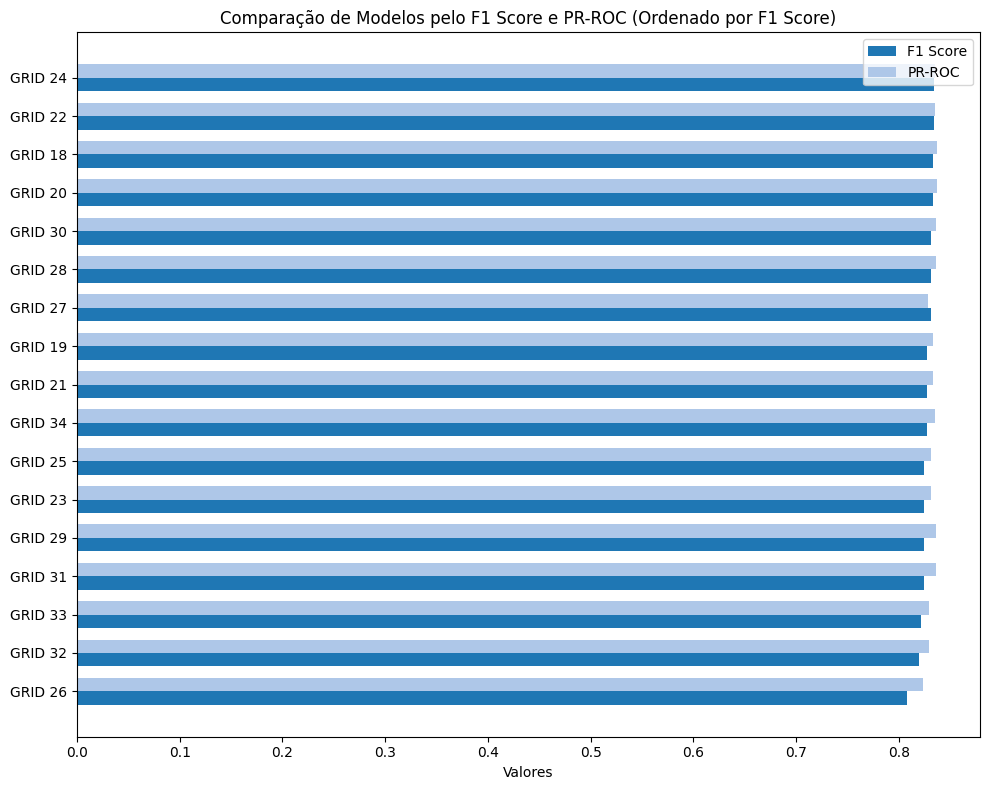

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Dados para F1 Score e PR-ROC para a nova tabela
modelos = [
    "GRID 18", "GRID 19", "GRID 20", "GRID 21", "GRID 22", "GRID 23", "GRID 24", "GRID 25",
    "GRID 26", "GRID 27", "GRID 28", "GRID 29", "GRID 30", "GRID 31", "GRID 32", "GRID 33", "GRID 34"
]

f1_scores = [
    0.8327, 0.8276, 0.8327, 0.8276, 0.8340, 0.8244, 0.8340, 0.8244,
    0.8075, 0.8308, 0.8308, 0.8244, 0.8308, 0.8244, 0.8199, 0.8213, 0.8276
]

pr_roc = [
    0.8370, 0.8334, 0.8370, 0.8334, 0.8350, 0.8312, 0.8350, 0.8312,
    0.8229, 0.8282, 0.8356, 0.8357, 0.8356, 0.8357, 0.8291, 0.8293, 0.8350
]

# Ordenar pelos valores de F1 Score
sorted_indices = np.argsort(f1_scores)

modelos_sorted = [modelos[i] for i in sorted_indices]
f1_scores_sorted = [f1_scores[i] for i in sorted_indices]
pr_roc_sorted = [pr_roc[i] for i in sorted_indices]

# Largura da barra
bar_width = 0.35
index = np.arange(len(modelos_sorted))

# Criar gráfico de barras horizontais com tons de azul
fig, ax = plt.subplots(figsize=(10, 8))
bar1 = ax.barh(index, f1_scores_sorted, bar_width, label='F1 Score', color='#1f77b4')  # Azul Escuro
bar2 = ax.barh(index + bar_width, pr_roc_sorted, bar_width, label='PR-ROC', color='#aec7e8')  # Azul Claro

# Adicionar rótulos e título
ax.set_xlabel('Valores')
ax.set_title('Comparação de Modelos pelo F1 Score e PR-ROC (Ordenado por F1 Score)')
ax.set_yticks(index + bar_width / 2)
ax.set_yticklabels(modelos_sorted)

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()
